## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["Stem_bark_t_ha", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


Stem_bark_t_ha                                                    \
                    count       mean        std  min     25%    50%     75%   
Species_ID                                                                    
0                   371.0   7.894070   4.128113  0.3   4.900   7.70  10.350   
1                     7.0  34.728571  23.382095  8.3  13.950  35.70  52.750   
2                   120.0  11.320000   7.552123  0.8   6.375   9.45  15.250   
3                   115.0  15.307826   8.294197  2.1   7.950  15.30  21.450   
4                    66.0  11.296970   6.528234  1.6   6.500   9.25  16.575   
5                    68.0  29.010294  12.702287  2.5  18.400  29.70  39.675   

                 ALL_STEM_t_ha                                              \
             max         count        mean        std   min     25%    50%   
Species_ID                                                                   
0           23.2         457.0   97.049891  61.854506   1.8  47.500   92.7   
1           65.7           7.0  123.814286  61.879895  46.3  70.650  133.9   
2           38.8         120.0   74.495000  44.523333   5.1  37.275   68.1   
3           41.1         115.0  107.607826  55.589186  11.0  62.700  106.8   
4           28.7          66.0   84.946970  58.875162   8.2  40.750   61.2   
5           48.8          90.0  173.065556  99.100647   5.0  93.075  161.3   

                            
                75%    max  
Species_ID                  
0           135.900  310.7  
1           174.550  196.1  
2           103.075  193.5  
3           145.450  251.6  
4           125.000  245.4  
5           253.375  363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_Stem_bark_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
10            5        0.0  18.2    19.6        18.3     159.0          101.8   
11            1        0.0   8.8     5.2        15.5     105.0           46.3   
12            1        0.0  10.2     6.7        16.2     122.0           54.1   
13            1        0.0  14.1    10.0        19.9     194.0           87.2   
14            1        0.0  19.4    15.9        26.8     299.0          133.9   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
10,5,0.0,18.2,19.6,18.3
11,1,0.0,8.8,5.2,15.5
12,1,0.0,10.2,6.7,16.2
13,1,0.0,14.1,10.0,19.9
14,1,0.0,19.4,15.9,26.8


In [11]:
# Columns in "y" data collections
y.head()

,LN_Stem_bark_t_ha
10,2.80
11,2.12
12,2.21
13,2.93
14,3.58


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8812509147843319, 0.7748234010137836, 0.8485428852357644]
    Mean: 0.835
    Std: 0.045

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.33457262 0.35302547 0.34326469]
    Mean: 0.344
    Std: 0.008

 --------------------
Mean absolute error (MAE): 

    Scores: [0.2009392232229432, 0.23526157199259268, 0.21924928256546158]
    Mean: 0.218
    Std: 0.014

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.8942960625751492                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.27892087021094436                # gamma
print('Gamma: ' + str(p2))

p3 = 0.11832141467878397                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 197         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7296434500976409                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8942960625751492
Gamma: 0.27892087021094436
Learning_rate: 0.11832141467878397
Max_depth: 3
N_estimators: 197
Subsample: 0.7296434500976409


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.67154	validation_1-rmse:1.67824
[1]	validation_0-rmse:1.48910	validation_1-rmse:1.49450
[2]	validation_0-rmse:1.32931	validation_1-rmse:1.33470
[3]	validation_0-rmse:1.18878	validation_1-rmse:1.19347


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06586	validation_1-rmse:1.07110
[5]	validation_0-rmse:0.96022	validation_1-rmse:0.96538
[6]	validation_0-rmse:0.86521	validation_1-rmse:0.86962
[7]	validation_0-rmse:0.77861	validation_1-rmse:0.78218
[8]	validation_0-rmse:0.70378	validation_1-rmse:0.70831
[9]	validation_0-rmse:0.64195	validation_1-rmse:0.64646
[10]	validation_0-rmse:0.58740	validation_1-rmse:0.59224
[11]	validation_0-rmse:0.54180	validation_1-rmse:0.54642
[12]	validation_0-rmse:0.50040	validation_1-rmse:0.50676
[13]	validation_0-rmse:0.46482	validation_1-rmse:0.47129
[14]	validation_0-rmse:0.43579	validation_1-rmse:0.44132
[15]	validation_0-rmse:0.40991	validation_1-rmse:0.41542
[16]	validation_0-rmse:0.38875	validation_1-rmse:0.39515
[17]	validation_0-rmse:0.37028	validation_1-rmse:0.37939
[18]	validation_0-rmse:0.35390	validation_1-rmse:0.36372
[19]	validation_0-rmse:0.34210	validation_1-rmse:0.34998
[20]	validation_0-rmse:0.33221	validation_1-rmse:0.34242
[21]	validation_0-rmse:0.32332	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67245	validation_1-rmse:1.70361
[1]	validation_0-rmse:1.48788	validation_1-rmse:1.52049
[2]	validation_0-rmse:1.32659	validation_1-rmse:1.36351
[3]	validation_0-rmse:1.18329	validation_1-rmse:1.22385
[4]	validation_0-rmse:1.06093	validation_1-rmse:1.10509
[5]	validation_0-rmse:0.95511	validation_1-rmse:1.00363
[6]	validation_0-rmse:0.85886	validation_1-rmse:0.91090
[7]	validation_0-rmse:0.77272	validation_1-rmse:0.82560
[8]	validation_0-rmse:0.69775	validation_1-rmse:0.75430
[9]	validation_0-rmse:0.63574	validation_1-rmse:0.69559
[10]	validation_0-rmse:0.58267	validation_1-rmse:0.64431
[11]	validation_0-rmse:0.53547	validation_1-rmse:0.60201
[12]	validation_0-rmse:0.49348	validation_1-rmse:0.56311
[13]	validation_0-rmse:0.45536	validation_1-rmse:0.52512
[14]	validation_0-rmse:0.42564	validation_1-rmse:0.49736
[15]	validation_0-rmse:0.39920	validation_1-rmse:0.47042
[16]	validation_0-rmse:0.37852	validation_1-rmse:0.44975
[17]	validation_0-rmse:0.35980	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67321	validation_1-rmse:1.67566
[1]	validation_0-rmse:1.49109	validation_1-rmse:1.48940
[2]	validation_0-rmse:1.33199	validation_1-rmse:1.33097
[3]	validation_0-rmse:1.18872	validation_1-rmse:1.18385
[4]	validation_0-rmse:1.06500	validation_1-rmse:1.05990
[5]	validation_0-rmse:0.95765	validation_1-rmse:0.95407
[6]	validation_0-rmse:0.86227	validation_1-rmse:0.86072
[7]	validation_0-rmse:0.77969	validation_1-rmse:0.77668
[8]	validation_0-rmse:0.70481	validation_1-rmse:0.70193
[9]	validation_0-rmse:0.64102	validation_1-rmse:0.64067


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.58490	validation_1-rmse:0.58659
[11]	validation_0-rmse:0.53767	validation_1-rmse:0.54317
[12]	validation_0-rmse:0.49323	validation_1-rmse:0.50258
[13]	validation_0-rmse:0.45818	validation_1-rmse:0.47044
[14]	validation_0-rmse:0.42917	validation_1-rmse:0.44631
[15]	validation_0-rmse:0.40442	validation_1-rmse:0.42625
[16]	validation_0-rmse:0.38108	validation_1-rmse:0.40644
[17]	validation_0-rmse:0.36288	validation_1-rmse:0.39257
[18]	validation_0-rmse:0.34637	validation_1-rmse:0.37955
[19]	validation_0-rmse:0.33236	validation_1-rmse:0.36853
[20]	validation_0-rmse:0.32138	validation_1-rmse:0.35978
[21]	validation_0-rmse:0.31079	validation_1-rmse:0.35147
[22]	validation_0-rmse:0.30308	validation_1-rmse:0.34554
[23]	validation_0-rmse:0.29722	validation_1-rmse:0.34177
[24]	validation_0-rmse:0.29112	validation_1-rmse:0.33811
[25]	validation_0-rmse:0.28612	validation_1-rmse:0.33444
[26]	validation_0-rmse:0.28196	validation_1-rmse:0.33398
[27]	validation_0-rmse:0.27875	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68874	validation_1-rmse:1.61993
[1]	validation_0-rmse:1.50099	validation_1-rmse:1.43518
[2]	validation_0-rmse:1.33647	validation_1-rmse:1.27663
[3]	validation_0-rmse:1.19168	validation_1-rmse:1.13747


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06777	validation_1-rmse:1.01575
[5]	validation_0-rmse:0.95863	validation_1-rmse:0.91225
[6]	validation_0-rmse:0.86231	validation_1-rmse:0.81994
[7]	validation_0-rmse:0.77557	validation_1-rmse:0.73831
[8]	validation_0-rmse:0.70065	validation_1-rmse:0.66961
[9]	validation_0-rmse:0.63993	validation_1-rmse:0.61347
[10]	validation_0-rmse:0.58545	validation_1-rmse:0.56378
[11]	validation_0-rmse:0.53823	validation_1-rmse:0.52126
[12]	validation_0-rmse:0.49471	validation_1-rmse:0.48103
[13]	validation_0-rmse:0.45762	validation_1-rmse:0.45003
[14]	validation_0-rmse:0.42623	validation_1-rmse:0.42467
[15]	validation_0-rmse:0.39947	validation_1-rmse:0.40380
[16]	validation_0-rmse:0.37597	validation_1-rmse:0.38622
[17]	validation_0-rmse:0.35892	validation_1-rmse:0.37390
[18]	validation_0-rmse:0.34295	validation_1-rmse:0.36425
[19]	validation_0-rmse:0.33004	validation_1-rmse:0.35777
[20]	validation_0-rmse:0.31994	validation_1-rmse:0.35059
[21]	validation_0-rmse:0.30817	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65745	validation_1-rmse:1.74549
[1]	validation_0-rmse:1.47692	validation_1-rmse:1.55902
[2]	validation_0-rmse:1.31817	validation_1-rmse:1.39334


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17554	validation_1-rmse:1.24408
[4]	validation_0-rmse:1.05294	validation_1-rmse:1.11342
[5]	validation_0-rmse:0.94709	validation_1-rmse:1.00558
[6]	validation_0-rmse:0.85276	validation_1-rmse:0.90533
[7]	validation_0-rmse:0.77143	validation_1-rmse:0.81895
[8]	validation_0-rmse:0.69746	validation_1-rmse:0.73906
[9]	validation_0-rmse:0.63572	validation_1-rmse:0.67658
[10]	validation_0-rmse:0.58230	validation_1-rmse:0.62135
[11]	validation_0-rmse:0.53898	validation_1-rmse:0.57719
[12]	validation_0-rmse:0.49659	validation_1-rmse:0.53166
[13]	validation_0-rmse:0.46187	validation_1-rmse:0.49377
[14]	validation_0-rmse:0.43280	validation_1-rmse:0.46334
[15]	validation_0-rmse:0.40758	validation_1-rmse:0.43662
[16]	validation_0-rmse:0.38477	validation_1-rmse:0.41314
[17]	validation_0-rmse:0.36798	validation_1-rmse:0.39735
[18]	validation_0-rmse:0.35209	validation_1-rmse:0.38017
[19]	validation_0-rmse:0.33912	validation_1-rmse:0.36624
[20]	validation_0-rmse:0.32950	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65638	validation_1-rmse:1.75583
[1]	validation_0-rmse:1.47760	validation_1-rmse:1.56774


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32024	validation_1-rmse:1.40244
[3]	validation_0-rmse:1.18010	validation_1-rmse:1.25785
[4]	validation_0-rmse:1.05726	validation_1-rmse:1.12724
[5]	validation_0-rmse:0.95146	validation_1-rmse:1.01709
[6]	validation_0-rmse:0.85517	validation_1-rmse:0.91945
[7]	validation_0-rmse:0.77081	validation_1-rmse:0.82922
[8]	validation_0-rmse:0.69760	validation_1-rmse:0.75395
[9]	validation_0-rmse:0.63666	validation_1-rmse:0.69185
[10]	validation_0-rmse:0.58323	validation_1-rmse:0.63482
[11]	validation_0-rmse:0.53940	validation_1-rmse:0.58742
[12]	validation_0-rmse:0.49722	validation_1-rmse:0.54039
[13]	validation_0-rmse:0.46051	validation_1-rmse:0.50270
[14]	validation_0-rmse:0.43089	validation_1-rmse:0.47073
[15]	validation_0-rmse:0.40519	validation_1-rmse:0.44333
[16]	validation_0-rmse:0.38380	validation_1-rmse:0.41841
[17]	validation_0-rmse:0.36561	validation_1-rmse:0.39962
[18]	validation_0-rmse:0.34955	validation_1-rmse:0.38273
[19]	validation_0-rmse:0.33804	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68096	validation_1-rmse:1.63366
[1]	validation_0-rmse:1.49562	validation_1-rmse:1.45583
[2]	validation_0-rmse:1.33252	validation_1-rmse:1.30009
[3]	validation_0-rmse:1.18905	validation_1-rmse:1.16814
[4]	validation_0-rmse:1.06272	validation_1-rmse:1.05112


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95354	validation_1-rmse:0.94572
[6]	validation_0-rmse:0.85640	validation_1-rmse:0.85342
[7]	validation_0-rmse:0.77326	validation_1-rmse:0.77459
[8]	validation_0-rmse:0.69711	validation_1-rmse:0.70528
[9]	validation_0-rmse:0.63239	validation_1-rmse:0.64929
[10]	validation_0-rmse:0.57676	validation_1-rmse:0.59815
[11]	validation_0-rmse:0.52988	validation_1-rmse:0.55874
[12]	validation_0-rmse:0.48701	validation_1-rmse:0.52217
[13]	validation_0-rmse:0.45024	validation_1-rmse:0.49088
[14]	validation_0-rmse:0.41910	validation_1-rmse:0.46662
[15]	validation_0-rmse:0.39322	validation_1-rmse:0.44816
[16]	validation_0-rmse:0.37003	validation_1-rmse:0.43063
[17]	validation_0-rmse:0.35153	validation_1-rmse:0.41616
[18]	validation_0-rmse:0.33503	validation_1-rmse:0.40425
[19]	validation_0-rmse:0.31995	validation_1-rmse:0.39597
[20]	validation_0-rmse:0.30889	validation_1-rmse:0.38788
[21]	validation_0-rmse:0.29964	validation_1-rmse:0.38198
[22]	validation_0-rmse:0.29178	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67035	validation_1-rmse:1.68961
[1]	validation_0-rmse:1.48594	validation_1-rmse:1.51024
[2]	validation_0-rmse:1.32713	validation_1-rmse:1.35564
[3]	validation_0-rmse:1.18678	validation_1-rmse:1.21399
[4]	validation_0-rmse:1.06507	validation_1-rmse:1.09592
[5]	validation_0-rmse:0.95872	validation_1-rmse:0.99024
[6]	validation_0-rmse:0.86159	validation_1-rmse:0.89312
[7]	validation_0-rmse:0.77639	validation_1-rmse:0.80889
[8]	validation_0-rmse:0.70323	validation_1-rmse:0.73686
[9]	validation_0-rmse:0.63899	validation_1-rmse:0.67452
[10]	validation_0-rmse:0.58502	validation_1-rmse:0.62079
[11]	validation_0-rmse:0.54035	validation_1-rmse:0.57762
[12]	validation_0-rmse:0.49613	validation_1-rmse:0.53485
[13]	validation_0-rmse:0.46167	validation_1-rmse:0.50200
[14]	validation_0-rmse:0.43425	validation_1-rmse:0.47663
[15]	validation_0-rmse:0.40754	validation_1-rmse:0.45043
[16]	validation_0-rmse:0.38342	validation_1-rmse:0.42732
[17]	validation_0-rmse:0.36546	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67884	validation_1-rmse:1.65011
[1]	validation_0-rmse:1.49693	validation_1-rmse:1.47193
[2]	validation_0-rmse:1.33475	validation_1-rmse:1.31464


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19449	validation_1-rmse:1.17782
[4]	validation_0-rmse:1.06953	validation_1-rmse:1.05612
[5]	validation_0-rmse:0.96262	validation_1-rmse:0.94971
[6]	validation_0-rmse:0.86674	validation_1-rmse:0.85672
[7]	validation_0-rmse:0.78454	validation_1-rmse:0.77474
[8]	validation_0-rmse:0.71111	validation_1-rmse:0.70349
[9]	validation_0-rmse:0.64657	validation_1-rmse:0.64071
[10]	validation_0-rmse:0.59193	validation_1-rmse:0.58598
[11]	validation_0-rmse:0.54440	validation_1-rmse:0.54039
[12]	validation_0-rmse:0.49967	validation_1-rmse:0.49791
[13]	validation_0-rmse:0.46300	validation_1-rmse:0.46365
[14]	validation_0-rmse:0.43343	validation_1-rmse:0.43679
[15]	validation_0-rmse:0.40787	validation_1-rmse:0.41486
[16]	validation_0-rmse:0.38532	validation_1-rmse:0.39414
[17]	validation_0-rmse:0.36867	validation_1-rmse:0.37887
[18]	validation_0-rmse:0.35177	validation_1-rmse:0.36708
[19]	validation_0-rmse:0.33776	validation_1-rmse:0.35721
[20]	validation_0-rmse:0.32829	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66016	validation_1-rmse:1.72933
[1]	validation_0-rmse:1.47785	validation_1-rmse:1.53908
[2]	validation_0-rmse:1.31847	validation_1-rmse:1.37590
[3]	validation_0-rmse:1.17580	validation_1-rmse:1.23115
[4]	validation_0-rmse:1.05114	validation_1-rmse:1.10383
[5]	validation_0-rmse:0.94321	validation_1-rmse:0.99239
[6]	validation_0-rmse:0.85063	validation_1-rmse:0.89700
[7]	validation_0-rmse:0.76745	validation_1-rmse:0.81054
[8]	validation_0-rmse:0.69389	validation_1-rmse:0.73473
[9]	validation_0-rmse:0.63258	validation_1-rmse:0.66908
[10]	validation_0-rmse:0.57911	validation_1-rmse:0.61572
[11]	validation_0-rmse:0.53235	validation_1-rmse:0.56890
[12]	validation_0-rmse:0.49073	validation_1-rmse:0.52748
[13]	validation_0-rmse:0.45352	validation_1-rmse:0.49100
[14]	validation_0-rmse:0.42544	validation_1-rmse:0.46119
[15]	validation_0-rmse:0.39896	validation_1-rmse:0.43419
[16]	validation_0-rmse:0.37501	validation_1-rmse:0.41055
[17]	validation_0-rmse:0.35828	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67860	validation_1-rmse:1.64249
[1]	validation_0-rmse:1.49635	validation_1-rmse:1.45750
[2]	validation_0-rmse:1.33630	validation_1-rmse:1.29744
[3]	validation_0-rmse:1.19463	validation_1-rmse:1.15625
[4]	validation_0-rmse:1.07122	validation_1-rmse:1.03487
[5]	validation_0-rmse:0.96026	validation_1-rmse:0.92690
[6]	validation_0-rmse:0.86610	validation_1-rmse:0.83432
[7]	validation_0-rmse:0.77858	validation_1-rmse:0.75131
[8]	validation_0-rmse:0.70302	validation_1-rmse:0.67964
[9]	validation_0-rmse:0.64162	validation_1-rmse:0.62219
[10]	validation_0-rmse:0.58723	validation_1-rmse:0.57152
[11]	validation_0-rmse:0.54104	validation_1-rmse:0.52937
[12]	validation_0-rmse:0.49866	validation_1-rmse:0.49136
[13]	validation_0-rmse:0.46102	validation_1-rmse:0.45801
[14]	validation_0-rmse:0.43111	validation_1-rmse:0.43196
[15]	validation_0-rmse:0.40434	validation_1-rmse:0.41054
[16]	validation_0-rmse:0.38239	validation_1-rmse:0.39413
[17]	validation_0-rmse:0.36475	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67209	validation_1-rmse:1.68952
[1]	validation_0-rmse:1.48896	validation_1-rmse:1.50645
[2]	validation_0-rmse:1.33024	validation_1-rmse:1.35168
[3]	validation_0-rmse:1.18826	validation_1-rmse:1.20862
[4]	validation_0-rmse:1.06602	validation_1-rmse:1.08786
[5]	validation_0-rmse:0.95917	validation_1-rmse:0.97800
[6]	validation_0-rmse:0.86412	validation_1-rmse:0.88821
[7]	validation_0-rmse:0.77995	validation_1-rmse:0.80756
[8]	validation_0-rmse:0.70596	validation_1-rmse:0.73461
[9]	validation_0-rmse:0.64317	validation_1-rmse:0.67271
[10]	validation_0-rmse:0.58754	validation_1-rmse:0.61811
[11]	validation_0-rmse:0.54205	validation_1-rmse:0.57649
[12]	validation_0-rmse:0.49980	validation_1-rmse:0.53631
[13]	validation_0-rmse:0.46212	validation_1-rmse:0.49813
[14]	validation_0-rmse:0.43243	validation_1-rmse:0.47235
[15]	validation_0-rmse:0.40500	validation_1-rmse:0.44414
[16]	validation_0-rmse:0.38120	validation_1-rmse:0.41977
[17]	validation_0-rmse:0.36419	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67082	validation_1-rmse:1.70011
[1]	validation_0-rmse:1.49057	validation_1-rmse:1.52121
[2]	validation_0-rmse:1.33137	validation_1-rmse:1.36368
[3]	validation_0-rmse:1.18990	validation_1-rmse:1.21698


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06773	validation_1-rmse:1.09111
[5]	validation_0-rmse:0.96067	validation_1-rmse:0.98307
[6]	validation_0-rmse:0.86521	validation_1-rmse:0.88558
[7]	validation_0-rmse:0.78082	validation_1-rmse:0.79813
[8]	validation_0-rmse:0.70758	validation_1-rmse:0.72245
[9]	validation_0-rmse:0.64471	validation_1-rmse:0.65656
[10]	validation_0-rmse:0.59118	validation_1-rmse:0.60392
[11]	validation_0-rmse:0.54344	validation_1-rmse:0.55462
[12]	validation_0-rmse:0.50108	validation_1-rmse:0.51017
[13]	validation_0-rmse:0.46494	validation_1-rmse:0.47420
[14]	validation_0-rmse:0.43588	validation_1-rmse:0.44448
[15]	validation_0-rmse:0.41049	validation_1-rmse:0.41945
[16]	validation_0-rmse:0.38759	validation_1-rmse:0.39748
[17]	validation_0-rmse:0.36861	validation_1-rmse:0.37854
[18]	validation_0-rmse:0.35106	validation_1-rmse:0.36124
[19]	validation_0-rmse:0.33856	validation_1-rmse:0.34725
[20]	validation_0-rmse:0.32890	validation_1-rmse:0.33812
[21]	validation_0-rmse:0.31971	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67456	validation_1-rmse:1.66869
[1]	validation_0-rmse:1.48938	validation_1-rmse:1.48440
[2]	validation_0-rmse:1.32821	validation_1-rmse:1.32598
[3]	validation_0-rmse:1.18559	validation_1-rmse:1.18665
[4]	validation_0-rmse:1.06272	validation_1-rmse:1.06627
[5]	validation_0-rmse:0.95469	validation_1-rmse:0.96163
[6]	validation_0-rmse:0.85704	validation_1-rmse:0.86325
[7]	validation_0-rmse:0.77383	validation_1-rmse:0.78589
[8]	validation_0-rmse:0.70355	validation_1-rmse:0.71855
[9]	validation_0-rmse:0.64202	validation_1-rmse:0.65751
[10]	validation_0-rmse:0.58796	validation_1-rmse:0.60418
[11]	validation_0-rmse:0.54049	validation_1-rmse:0.55950
[12]	validation_0-rmse:0.49646	validation_1-rmse:0.51882
[13]	validation_0-rmse:0.45997	validation_1-rmse:0.48218
[14]	validation_0-rmse:0.42997	validation_1-rmse:0.45432
[15]	validation_0-rmse:0.40296	validation_1-rmse:0.43071
[16]	validation_0-rmse:0.37960	validation_1-rmse:0.40970
[17]	validation_0-rmse:0.36048	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65514	validation_1-rmse:1.77114
[1]	validation_0-rmse:1.47473	validation_1-rmse:1.58470
[2]	validation_0-rmse:1.31466	validation_1-rmse:1.42176
[3]	validation_0-rmse:1.17504	validation_1-rmse:1.27747
[4]	validation_0-rmse:1.05223	validation_1-rmse:1.15185
[5]	validation_0-rmse:0.94675	validation_1-rmse:1.04367
[6]	validation_0-rmse:0.85452	validation_1-rmse:0.95017
[7]	validation_0-rmse:0.77057	validation_1-rmse:0.86491
[8]	validation_0-rmse:0.69757	validation_1-rmse:0.78888
[9]	validation_0-rmse:0.63738	validation_1-rmse:0.72897
[10]	validation_0-rmse:0.58247	validation_1-rmse:0.67305
[11]	validation_0-rmse:0.53812	validation_1-rmse:0.62784
[12]	validation_0-rmse:0.49793	validation_1-rmse:0.58619
[13]	validation_0-rmse:0.46149	validation_1-rmse:0.54648
[14]	validation_0-rmse:0.43430	validation_1-rmse:0.51943
[15]	validation_0-rmse:0.40856	validation_1-rmse:0.49239
[16]	validation_0-rmse:0.38640	validation_1-rmse:0.46718
[17]	validation_0-rmse:0.36829	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66287	validation_1-rmse:1.73969
[1]	validation_0-rmse:1.48112	validation_1-rmse:1.56336
[2]	validation_0-rmse:1.32088	validation_1-rmse:1.40300


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17767	validation_1-rmse:1.26112
[4]	validation_0-rmse:1.05389	validation_1-rmse:1.13702
[5]	validation_0-rmse:0.94750	validation_1-rmse:1.02491
[6]	validation_0-rmse:0.85274	validation_1-rmse:0.92951
[7]	validation_0-rmse:0.77075	validation_1-rmse:0.84629
[8]	validation_0-rmse:0.70068	validation_1-rmse:0.77525
[9]	validation_0-rmse:0.63745	validation_1-rmse:0.71209
[10]	validation_0-rmse:0.58363	validation_1-rmse:0.65486
[11]	validation_0-rmse:0.53717	validation_1-rmse:0.60969
[12]	validation_0-rmse:0.49310	validation_1-rmse:0.56545
[13]	validation_0-rmse:0.45640	validation_1-rmse:0.52675
[14]	validation_0-rmse:0.42710	validation_1-rmse:0.49791
[15]	validation_0-rmse:0.40172	validation_1-rmse:0.47243
[16]	validation_0-rmse:0.37819	validation_1-rmse:0.44845
[17]	validation_0-rmse:0.35800	validation_1-rmse:0.42609
[18]	validation_0-rmse:0.34314	validation_1-rmse:0.41118
[19]	validation_0-rmse:0.33042	validation_1-rmse:0.39866
[20]	validation_0-rmse:0.31936	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.64501	validation_1-rmse:1.80752
[1]	validation_0-rmse:1.46629	validation_1-rmse:1.61962


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.30828	validation_1-rmse:1.45373
[3]	validation_0-rmse:1.17122	validation_1-rmse:1.31099
[4]	validation_0-rmse:1.04970	validation_1-rmse:1.18383
[5]	validation_0-rmse:0.94848	validation_1-rmse:1.07583
[6]	validation_0-rmse:0.85464	validation_1-rmse:0.97531
[7]	validation_0-rmse:0.77228	validation_1-rmse:0.88685
[8]	validation_0-rmse:0.69685	validation_1-rmse:0.80240
[9]	validation_0-rmse:0.63642	validation_1-rmse:0.73660
[10]	validation_0-rmse:0.58365	validation_1-rmse:0.67750
[11]	validation_0-rmse:0.53961	validation_1-rmse:0.62888
[12]	validation_0-rmse:0.49746	validation_1-rmse:0.58017
[13]	validation_0-rmse:0.46159	validation_1-rmse:0.53805
[14]	validation_0-rmse:0.43387	validation_1-rmse:0.50528
[15]	validation_0-rmse:0.40840	validation_1-rmse:0.47473
[16]	validation_0-rmse:0.38738	validation_1-rmse:0.44762
[17]	validation_0-rmse:0.37090	validation_1-rmse:0.42789
[18]	validation_0-rmse:0.35449	validation_1-rmse:0.40663
[19]	validation_0-rmse:0.34211	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66539	validation_1-rmse:1.71013
[1]	validation_0-rmse:1.48496	validation_1-rmse:1.52592
[2]	validation_0-rmse:1.32626	validation_1-rmse:1.36549
[3]	validation_0-rmse:1.18318	validation_1-rmse:1.22121
[4]	validation_0-rmse:1.05947	validation_1-rmse:1.09290
[5]	validation_0-rmse:0.95395	validation_1-rmse:0.98748
[6]	validation_0-rmse:0.85608	validation_1-rmse:0.88747
[7]	validation_0-rmse:0.77013	validation_1-rmse:0.79812
[8]	validation_0-rmse:0.69618	validation_1-rmse:0.72112
[9]	validation_0-rmse:0.63496	validation_1-rmse:0.66111
[10]	validation_0-rmse:0.58097	validation_1-rmse:0.60482
[11]	validation_0-rmse:0.53310	validation_1-rmse:0.55899
[12]	validation_0-rmse:0.49222	validation_1-rmse:0.51939
[13]	validation_0-rmse:0.45836	validation_1-rmse:0.48821
[14]	validation_0-rmse:0.43046	validation_1-rmse:0.46288
[15]	validation_0-rmse:0.40666	validation_1-rmse:0.43936
[16]	validation_0-rmse:0.38423	validation_1-rmse:0.41851
[17]	validation_0-rmse:0.36702	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66836	validation_1-rmse:1.67442
[1]	validation_0-rmse:1.48874	validation_1-rmse:1.49221
[2]	validation_0-rmse:1.33081	validation_1-rmse:1.32765
[3]	validation_0-rmse:1.18816	validation_1-rmse:1.18114
[4]	validation_0-rmse:1.06329	validation_1-rmse:1.05011
[5]	validation_0-rmse:0.95687	validation_1-rmse:0.94044
[6]	validation_0-rmse:0.86043	validation_1-rmse:0.84160
[7]	validation_0-rmse:0.77673	validation_1-rmse:0.75616
[8]	validation_0-rmse:0.70381	validation_1-rmse:0.68028
[9]	validation_0-rmse:0.64301	validation_1-rmse:0.61977
[10]	validation_0-rmse:0.59075	validation_1-rmse:0.56651
[11]	validation_0-rmse:0.54450	validation_1-rmse:0.52420
[12]	validation_0-rmse:0.50125	validation_1-rmse:0.48155
[13]	validation_0-rmse:0.46374	validation_1-rmse:0.44423
[14]	validation_0-rmse:0.43428	validation_1-rmse:0.41861
[15]	validation_0-rmse:0.40835	validation_1-rmse:0.39450
[16]	validation_0-rmse:0.38687	validation_1-rmse:0.37380
[17]	validation_0-rmse:0.36953	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66261	validation_1-rmse:1.72734
[1]	validation_0-rmse:1.48229	validation_1-rmse:1.54318
[2]	validation_0-rmse:1.32060	validation_1-rmse:1.38175
[3]	validation_0-rmse:1.18041	validation_1-rmse:1.24311
[4]	validation_0-rmse:1.05937	validation_1-rmse:1.11961
[5]	validation_0-rmse:0.95376	validation_1-rmse:1.01306
[6]	validation_0-rmse:0.85620	validation_1-rmse:0.91641
[7]	validation_0-rmse:0.77194	validation_1-rmse:0.83183
[8]	validation_0-rmse:0.70049	validation_1-rmse:0.75941
[9]	validation_0-rmse:0.63792	validation_1-rmse:0.69718
[10]	validation_0-rmse:0.58554	validation_1-rmse:0.64496
[11]	validation_0-rmse:0.54002	validation_1-rmse:0.60009
[12]	validation_0-rmse:0.49778	validation_1-rmse:0.55902
[13]	validation_0-rmse:0.46016	validation_1-rmse:0.52034
[14]	validation_0-rmse:0.43016	validation_1-rmse:0.48958
[15]	validation_0-rmse:0.40278	validation_1-rmse:0.46132
[16]	validation_0-rmse:0.38046	validation_1-rmse:0.43763
[17]	validation_0-rmse:0.36355	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66386	validation_1-rmse:1.70930
[1]	validation_0-rmse:1.48372	validation_1-rmse:1.52413
[2]	validation_0-rmse:1.32190	validation_1-rmse:1.36005
[3]	validation_0-rmse:1.18423	validation_1-rmse:1.22148


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06065	validation_1-rmse:1.10002
[5]	validation_0-rmse:0.95295	validation_1-rmse:0.99355
[6]	validation_0-rmse:0.85594	validation_1-rmse:0.89858
[7]	validation_0-rmse:0.77112	validation_1-rmse:0.81314
[8]	validation_0-rmse:0.69830	validation_1-rmse:0.74388
[9]	validation_0-rmse:0.63847	validation_1-rmse:0.68775
[10]	validation_0-rmse:0.58437	validation_1-rmse:0.63512
[11]	validation_0-rmse:0.53720	validation_1-rmse:0.58946
[12]	validation_0-rmse:0.49532	validation_1-rmse:0.54824
[13]	validation_0-rmse:0.45854	validation_1-rmse:0.51340
[14]	validation_0-rmse:0.42834	validation_1-rmse:0.48695
[15]	validation_0-rmse:0.40086	validation_1-rmse:0.46135
[16]	validation_0-rmse:0.37979	validation_1-rmse:0.43856
[17]	validation_0-rmse:0.36302	validation_1-rmse:0.42172
[18]	validation_0-rmse:0.34690	validation_1-rmse:0.40610
[19]	validation_0-rmse:0.33356	validation_1-rmse:0.39284
[20]	validation_0-rmse:0.32225	validation_1-rmse:0.38253
[21]	validation_0-rmse:0.31150	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67332	validation_1-rmse:1.66928
[1]	validation_0-rmse:1.49131	validation_1-rmse:1.49260
[2]	validation_0-rmse:1.33043	validation_1-rmse:1.33304
[3]	validation_0-rmse:1.18582	validation_1-rmse:1.19170


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.05948	validation_1-rmse:1.06526
[5]	validation_0-rmse:0.95006	validation_1-rmse:0.96207
[6]	validation_0-rmse:0.85278	validation_1-rmse:0.86857
[7]	validation_0-rmse:0.76998	validation_1-rmse:0.78690
[8]	validation_0-rmse:0.69785	validation_1-rmse:0.72017
[9]	validation_0-rmse:0.63567	validation_1-rmse:0.66387
[10]	validation_0-rmse:0.58289	validation_1-rmse:0.61769
[11]	validation_0-rmse:0.53351	validation_1-rmse:0.57670
[12]	validation_0-rmse:0.49002	validation_1-rmse:0.53635
[13]	validation_0-rmse:0.45176	validation_1-rmse:0.50410
[14]	validation_0-rmse:0.42019	validation_1-rmse:0.48027
[15]	validation_0-rmse:0.39345	validation_1-rmse:0.45959
[16]	validation_0-rmse:0.37042	validation_1-rmse:0.44020
[17]	validation_0-rmse:0.35330	validation_1-rmse:0.42870
[18]	validation_0-rmse:0.33742	validation_1-rmse:0.41568
[19]	validation_0-rmse:0.32387	validation_1-rmse:0.40619
[20]	validation_0-rmse:0.31254	validation_1-rmse:0.40063
[21]	validation_0-rmse:0.30314	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.70400	validation_1-rmse:1.55870
[1]	validation_0-rmse:1.51864	validation_1-rmse:1.38807
[2]	validation_0-rmse:1.35692	validation_1-rmse:1.23648
[3]	validation_0-rmse:1.21030	validation_1-rmse:1.10285
[4]	validation_0-rmse:1.08307	validation_1-rmse:0.98689
[5]	validation_0-rmse:0.97186	validation_1-rmse:0.88610
[6]	validation_0-rmse:0.87174	validation_1-rmse:0.79792
[7]	validation_0-rmse:0.78483	validation_1-rmse:0.72113
[8]	validation_0-rmse:0.71054	validation_1-rmse:0.65555
[9]	validation_0-rmse:0.64719	validation_1-rmse:0.60079
[10]	validation_0-rmse:0.59218	validation_1-rmse:0.55387
[11]	validation_0-rmse:0.54559	validation_1-rmse:0.51542
[12]	validation_0-rmse:0.50237	validation_1-rmse:0.47840
[13]	validation_0-rmse:0.46798	validation_1-rmse:0.44880
[14]	validation_0-rmse:0.43896	validation_1-rmse:0.42593
[15]	validation_0-rmse:0.41309	validation_1-rmse:0.40447
[16]	validation_0-rmse:0.39042	validation_1-rmse:0.38607
[17]	validation_0-rmse:0.37233	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.69684	validation_1-rmse:1.57823
[1]	validation_0-rmse:1.51330	validation_1-rmse:1.40093
[2]	validation_0-rmse:1.34870	validation_1-rmse:1.24471
[3]	validation_0-rmse:1.20774	validation_1-rmse:1.11336
[4]	validation_0-rmse:1.08066	validation_1-rmse:0.99461
[5]	validation_0-rmse:0.96948	validation_1-rmse:0.89270
[6]	validation_0-rmse:0.87348	validation_1-rmse:0.80379
[7]	validation_0-rmse:0.78538	validation_1-rmse:0.72404
[8]	validation_0-rmse:0.70983	validation_1-rmse:0.65648
[9]	validation_0-rmse:0.64807	validation_1-rmse:0.60284
[10]	validation_0-rmse:0.59288	validation_1-rmse:0.55377
[11]	validation_0-rmse:0.54506	validation_1-rmse:0.51295
[12]	validation_0-rmse:0.50135	validation_1-rmse:0.47777
[13]	validation_0-rmse:0.46477	validation_1-rmse:0.44826
[14]	validation_0-rmse:0.43480	validation_1-rmse:0.42693
[15]	validation_0-rmse:0.40698	validation_1-rmse:0.40487
[16]	validation_0-rmse:0.38495	validation_1-rmse:0.38928
[17]	validation_0-rmse:0.36844	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66654	validation_1-rmse:1.71412
[1]	validation_0-rmse:1.48286	validation_1-rmse:1.53213
[2]	validation_0-rmse:1.32245	validation_1-rmse:1.37139
[3]	validation_0-rmse:1.18356	validation_1-rmse:1.23500
[4]	validation_0-rmse:1.05991	validation_1-rmse:1.11334
[5]	validation_0-rmse:0.95262	validation_1-rmse:1.00560
[6]	validation_0-rmse:0.85476	validation_1-rmse:0.90714
[7]	validation_0-rmse:0.77121	validation_1-rmse:0.82264
[8]	validation_0-rmse:0.69706	validation_1-rmse:0.74958
[9]	validation_0-rmse:0.63555	validation_1-rmse:0.69022
[10]	validation_0-rmse:0.58260	validation_1-rmse:0.63967
[11]	validation_0-rmse:0.53703	validation_1-rmse:0.59676
[12]	validation_0-rmse:0.49560	validation_1-rmse:0.55614
[13]	validation_0-rmse:0.45775	validation_1-rmse:0.51784
[14]	validation_0-rmse:0.42718	validation_1-rmse:0.48891
[15]	validation_0-rmse:0.40037	validation_1-rmse:0.46237
[16]	validation_0-rmse:0.37855	validation_1-rmse:0.44239
[17]	validation_0-rmse:0.36122	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67064	validation_1-rmse:1.69438
[1]	validation_0-rmse:1.48631	validation_1-rmse:1.50503
[2]	validation_0-rmse:1.32647	validation_1-rmse:1.33959
[3]	validation_0-rmse:1.18402	validation_1-rmse:1.19818
[4]	validation_0-rmse:1.06100	validation_1-rmse:1.07640
[5]	validation_0-rmse:0.95400	validation_1-rmse:0.96713
[6]	validation_0-rmse:0.85806	validation_1-rmse:0.86713
[7]	validation_0-rmse:0.77327	validation_1-rmse:0.77952
[8]	validation_0-rmse:0.70061	validation_1-rmse:0.70582
[9]	validation_0-rmse:0.64011	validation_1-rmse:0.64569
[10]	validation_0-rmse:0.58850	validation_1-rmse:0.59118
[11]	validation_0-rmse:0.54186	validation_1-rmse:0.54576
[12]	validation_0-rmse:0.49973	validation_1-rmse:0.50166
[13]	validation_0-rmse:0.46341	validation_1-rmse:0.46430
[14]	validation_0-rmse:0.43500	validation_1-rmse:0.43591
[15]	validation_0-rmse:0.41012	validation_1-rmse:0.40905
[16]	validation_0-rmse:0.38919	validation_1-rmse:0.38755
[17]	validation_0-rmse:0.37298	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67372	validation_1-rmse:1.67990
[1]	validation_0-rmse:1.48991	validation_1-rmse:1.49395
[2]	validation_0-rmse:1.32769	validation_1-rmse:1.33060
[3]	validation_0-rmse:1.18593	validation_1-rmse:1.18946
[4]	validation_0-rmse:1.06044	validation_1-rmse:1.06660
[5]	validation_0-rmse:0.95017	validation_1-rmse:0.96031
[6]	validation_0-rmse:0.85445	validation_1-rmse:0.86831
[7]	validation_0-rmse:0.77275	validation_1-rmse:0.78820
[8]	validation_0-rmse:0.69783	validation_1-rmse:0.71440
[9]	validation_0-rmse:0.63720	validation_1-rmse:0.65982
[10]	validation_0-rmse:0.58223	validation_1-rmse:0.60790
[11]	validation_0-rmse:0.53674	validation_1-rmse:0.56516
[12]	validation_0-rmse:0.49437	validation_1-rmse:0.52690
[13]	validation_0-rmse:0.45709	validation_1-rmse:0.49300
[14]	validation_0-rmse:0.42746	validation_1-rmse:0.46729
[15]	validation_0-rmse:0.40106	validation_1-rmse:0.44529
[16]	validation_0-rmse:0.37704	validation_1-rmse:0.42548
[17]	validation_0-rmse:0.35848	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66984	validation_1-rmse:1.68338
[1]	validation_0-rmse:1.48935	validation_1-rmse:1.50564
[2]	validation_0-rmse:1.32790	validation_1-rmse:1.33948
[3]	validation_0-rmse:1.18408	validation_1-rmse:1.19128
[4]	validation_0-rmse:1.06127	validation_1-rmse:1.06726
[5]	validation_0-rmse:0.95387	validation_1-rmse:0.96042
[6]	validation_0-rmse:0.85958	validation_1-rmse:0.86597
[7]	validation_0-rmse:0.77459	validation_1-rmse:0.78155
[8]	validation_0-rmse:0.69938	validation_1-rmse:0.70821
[9]	validation_0-rmse:0.63531	validation_1-rmse:0.64695
[10]	validation_0-rmse:0.58013	validation_1-rmse:0.59395
[11]	validation_0-rmse:0.53329	validation_1-rmse:0.55090
[12]	validation_0-rmse:0.49023	validation_1-rmse:0.51145
[13]	validation_0-rmse:0.45367	validation_1-rmse:0.47723
[14]	validation_0-rmse:0.42462	validation_1-rmse:0.45245
[15]	validation_0-rmse:0.39969	validation_1-rmse:0.43059
[16]	validation_0-rmse:0.37759	validation_1-rmse:0.41240
[17]	validation_0-rmse:0.36004	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66644	validation_1-rmse:1.70495
[1]	validation_0-rmse:1.48507	validation_1-rmse:1.52123
[2]	validation_0-rmse:1.32613	validation_1-rmse:1.36223
[3]	validation_0-rmse:1.18603	validation_1-rmse:1.21860
[4]	validation_0-rmse:1.06238	validation_1-rmse:1.09406


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95527	validation_1-rmse:0.98919
[6]	validation_0-rmse:0.86285	validation_1-rmse:0.89360
[7]	validation_0-rmse:0.78015	validation_1-rmse:0.81118
[8]	validation_0-rmse:0.70671	validation_1-rmse:0.73587
[9]	validation_0-rmse:0.64458	validation_1-rmse:0.67031
[10]	validation_0-rmse:0.59241	validation_1-rmse:0.61809
[11]	validation_0-rmse:0.54562	validation_1-rmse:0.57089
[12]	validation_0-rmse:0.50219	validation_1-rmse:0.52567
[13]	validation_0-rmse:0.46661	validation_1-rmse:0.48692
[14]	validation_0-rmse:0.43948	validation_1-rmse:0.45824
[15]	validation_0-rmse:0.41321	validation_1-rmse:0.42962
[16]	validation_0-rmse:0.39046	validation_1-rmse:0.40704
[17]	validation_0-rmse:0.37360	validation_1-rmse:0.38928
[18]	validation_0-rmse:0.35896	validation_1-rmse:0.37384
[19]	validation_0-rmse:0.34509	validation_1-rmse:0.35846
[20]	validation_0-rmse:0.33340	validation_1-rmse:0.34579
[21]	validation_0-rmse:0.32394	validation_1-rmse:0.33446
[22]	validation_0-rmse:0.31584	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67973	validation_1-rmse:1.65676
[1]	validation_0-rmse:1.49536	validation_1-rmse:1.47512
[2]	validation_0-rmse:1.33405	validation_1-rmse:1.31961
[3]	validation_0-rmse:1.18883	validation_1-rmse:1.17724


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06485	validation_1-rmse:1.05456
[5]	validation_0-rmse:0.95724	validation_1-rmse:0.94974
[6]	validation_0-rmse:0.86272	validation_1-rmse:0.85834
[7]	validation_0-rmse:0.77874	validation_1-rmse:0.77971
[8]	validation_0-rmse:0.70666	validation_1-rmse:0.71002
[9]	validation_0-rmse:0.64597	validation_1-rmse:0.65324
[10]	validation_0-rmse:0.59005	validation_1-rmse:0.60377
[11]	validation_0-rmse:0.54411	validation_1-rmse:0.56108
[12]	validation_0-rmse:0.50069	validation_1-rmse:0.52176
[13]	validation_0-rmse:0.46149	validation_1-rmse:0.48767
[14]	validation_0-rmse:0.43145	validation_1-rmse:0.46304
[15]	validation_0-rmse:0.40449	validation_1-rmse:0.44085
[16]	validation_0-rmse:0.38334	validation_1-rmse:0.42217
[17]	validation_0-rmse:0.36587	validation_1-rmse:0.40839
[18]	validation_0-rmse:0.34856	validation_1-rmse:0.39693
[19]	validation_0-rmse:0.33357	validation_1-rmse:0.38673
[20]	validation_0-rmse:0.32230	validation_1-rmse:0.37986
[21]	validation_0-rmse:0.31170	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67545	validation_1-rmse:1.67683
[1]	validation_0-rmse:1.49405	validation_1-rmse:1.49871
[2]	validation_0-rmse:1.33387	validation_1-rmse:1.34318
[3]	validation_0-rmse:1.19068	validation_1-rmse:1.20076


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06556	validation_1-rmse:1.07469
[5]	validation_0-rmse:0.95865	validation_1-rmse:0.96957
[6]	validation_0-rmse:0.86069	validation_1-rmse:0.87420
[7]	validation_0-rmse:0.77438	validation_1-rmse:0.79082
[8]	validation_0-rmse:0.70049	validation_1-rmse:0.72046
[9]	validation_0-rmse:0.63606	validation_1-rmse:0.65482
[10]	validation_0-rmse:0.58302	validation_1-rmse:0.60212
[11]	validation_0-rmse:0.53696	validation_1-rmse:0.55575
[12]	validation_0-rmse:0.49374	validation_1-rmse:0.51470
[13]	validation_0-rmse:0.45920	validation_1-rmse:0.48433
[14]	validation_0-rmse:0.43027	validation_1-rmse:0.45294
[15]	validation_0-rmse:0.40526	validation_1-rmse:0.42828
[16]	validation_0-rmse:0.38268	validation_1-rmse:0.40726
[17]	validation_0-rmse:0.36544	validation_1-rmse:0.38941
[18]	validation_0-rmse:0.34995	validation_1-rmse:0.37488
[19]	validation_0-rmse:0.33706	validation_1-rmse:0.36263
[20]	validation_0-rmse:0.32525	validation_1-rmse:0.35218
[21]	validation_0-rmse:0.31709	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65842	validation_1-rmse:1.73875
[1]	validation_0-rmse:1.47758	validation_1-rmse:1.55405
[2]	validation_0-rmse:1.32100	validation_1-rmse:1.39021
[3]	validation_0-rmse:1.17989	validation_1-rmse:1.24145
[4]	validation_0-rmse:1.05680	validation_1-rmse:1.10862
[5]	validation_0-rmse:0.95282	validation_1-rmse:0.99972
[6]	validation_0-rmse:0.85924	validation_1-rmse:0.89805
[7]	validation_0-rmse:0.77448	validation_1-rmse:0.81086
[8]	validation_0-rmse:0.70100	validation_1-rmse:0.73155
[9]	validation_0-rmse:0.63814	validation_1-rmse:0.66457
[10]	validation_0-rmse:0.58327	validation_1-rmse:0.60670
[11]	validation_0-rmse:0.53601	validation_1-rmse:0.55684
[12]	validation_0-rmse:0.49350	validation_1-rmse:0.51110
[13]	validation_0-rmse:0.45968	validation_1-rmse:0.47559
[14]	validation_0-rmse:0.43133	validation_1-rmse:0.44510
[15]	validation_0-rmse:0.40809	validation_1-rmse:0.42072
[16]	validation_0-rmse:0.38735	validation_1-rmse:0.39967
[17]	validation_0-rmse:0.37102	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65440	validation_1-rmse:1.76941
[1]	validation_0-rmse:1.47431	validation_1-rmse:1.58828
[2]	validation_0-rmse:1.31714	validation_1-rmse:1.43004
[3]	validation_0-rmse:1.17612	validation_1-rmse:1.28504
[4]	validation_0-rmse:1.05112	validation_1-rmse:1.15180
[5]	validation_0-rmse:0.94676	validation_1-rmse:1.05025
[6]	validation_0-rmse:0.85330	validation_1-rmse:0.95578
[7]	validation_0-rmse:0.77135	validation_1-rmse:0.87497
[8]	validation_0-rmse:0.69628	validation_1-rmse:0.79664
[9]	validation_0-rmse:0.63603	validation_1-rmse:0.73579
[10]	validation_0-rmse:0.58306	validation_1-rmse:0.68388
[11]	validation_0-rmse:0.53752	validation_1-rmse:0.63526


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.49492	validation_1-rmse:0.59004
[13]	validation_0-rmse:0.45943	validation_1-rmse:0.55212
[14]	validation_0-rmse:0.43007	validation_1-rmse:0.52031
[15]	validation_0-rmse:0.40283	validation_1-rmse:0.49183
[16]	validation_0-rmse:0.37941	validation_1-rmse:0.46549
[17]	validation_0-rmse:0.36139	validation_1-rmse:0.44543
[18]	validation_0-rmse:0.34599	validation_1-rmse:0.43119
[19]	validation_0-rmse:0.33310	validation_1-rmse:0.41804
[20]	validation_0-rmse:0.32363	validation_1-rmse:0.40778
[21]	validation_0-rmse:0.31517	validation_1-rmse:0.39666
[22]	validation_0-rmse:0.30659	validation_1-rmse:0.38607
[23]	validation_0-rmse:0.30016	validation_1-rmse:0.37929
[24]	validation_0-rmse:0.29573	validation_1-rmse:0.37465
[25]	validation_0-rmse:0.29058	validation_1-rmse:0.36994
[26]	validation_0-rmse:0.28674	validation_1-rmse:0.36661
[27]	validation_0-rmse:0.28367	validation_1-rmse:0.36373
[28]	validation_0-rmse:0.28116	validation_1-rmse:0.36180
[29]	validation_0-rmse:0.27786	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67100	validation_1-rmse:1.68146
[1]	validation_0-rmse:1.48856	validation_1-rmse:1.49800
[2]	validation_0-rmse:1.32771	validation_1-rmse:1.33642
[3]	validation_0-rmse:1.18712	validation_1-rmse:1.19472
[4]	validation_0-rmse:1.06446	validation_1-rmse:1.07270
[5]	validation_0-rmse:0.95527	validation_1-rmse:0.96354
[6]	validation_0-rmse:0.85888	validation_1-rmse:0.86652
[7]	validation_0-rmse:0.77424	validation_1-rmse:0.78363
[8]	validation_0-rmse:0.70163	validation_1-rmse:0.71614
[9]	validation_0-rmse:0.63984	validation_1-rmse:0.65445
[10]	validation_0-rmse:0.58725	validation_1-rmse:0.60328
[11]	validation_0-rmse:0.53998	validation_1-rmse:0.55428
[12]	validation_0-rmse:0.49534	validation_1-rmse:0.51289
[13]	validation_0-rmse:0.46014	validation_1-rmse:0.48183
[14]	validation_0-rmse:0.43210	validation_1-rmse:0.45506
[15]	validation_0-rmse:0.40687	validation_1-rmse:0.43188
[16]	validation_0-rmse:0.38364	validation_1-rmse:0.40985
[17]	validation_0-rmse:0.36573	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66103	validation_1-rmse:1.73121
[1]	validation_0-rmse:1.48216	validation_1-rmse:1.55273
[2]	validation_0-rmse:1.32223	validation_1-rmse:1.39125
[3]	validation_0-rmse:1.18117	validation_1-rmse:1.24740
[4]	validation_0-rmse:1.05854	validation_1-rmse:1.12025
[5]	validation_0-rmse:0.95183	validation_1-rmse:1.01125
[6]	validation_0-rmse:0.85477	validation_1-rmse:0.91117
[7]	validation_0-rmse:0.77119	validation_1-rmse:0.82691
[8]	validation_0-rmse:0.69903	validation_1-rmse:0.75496


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63846	validation_1-rmse:0.69307
[10]	validation_0-rmse:0.58681	validation_1-rmse:0.63957
[11]	validation_0-rmse:0.54042	validation_1-rmse:0.59126
[12]	validation_0-rmse:0.49709	validation_1-rmse:0.54469
[13]	validation_0-rmse:0.46158	validation_1-rmse:0.50673
[14]	validation_0-rmse:0.43232	validation_1-rmse:0.47453
[15]	validation_0-rmse:0.40592	validation_1-rmse:0.44587
[16]	validation_0-rmse:0.38498	validation_1-rmse:0.42300
[17]	validation_0-rmse:0.36800	validation_1-rmse:0.40430
[18]	validation_0-rmse:0.35255	validation_1-rmse:0.38525
[19]	validation_0-rmse:0.33942	validation_1-rmse:0.37049
[20]	validation_0-rmse:0.32904	validation_1-rmse:0.35676
[21]	validation_0-rmse:0.31888	validation_1-rmse:0.34517
[22]	validation_0-rmse:0.31047	validation_1-rmse:0.33529
[23]	validation_0-rmse:0.30493	validation_1-rmse:0.32883
[24]	validation_0-rmse:0.29949	validation_1-rmse:0.32156
[25]	validation_0-rmse:0.29558	validation_1-rmse:0.31676
[26]	validation_0-rmse:0.29323	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68862	validation_1-rmse:1.61790
[1]	validation_0-rmse:1.50518	validation_1-rmse:1.44731
[2]	validation_0-rmse:1.34053	validation_1-rmse:1.28541
[3]	validation_0-rmse:1.19652	validation_1-rmse:1.15181
[4]	validation_0-rmse:1.07126	validation_1-rmse:1.03681
[5]	validation_0-rmse:0.96198	validation_1-rmse:0.93152
[6]	validation_0-rmse:0.86563	validation_1-rmse:0.84297
[7]	validation_0-rmse:0.78290	validation_1-rmse:0.76403


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70771	validation_1-rmse:0.69409
[9]	validation_0-rmse:0.64445	validation_1-rmse:0.63442
[10]	validation_0-rmse:0.59008	validation_1-rmse:0.58432
[11]	validation_0-rmse:0.54365	validation_1-rmse:0.54210
[12]	validation_0-rmse:0.50119	validation_1-rmse:0.50379
[13]	validation_0-rmse:0.46412	validation_1-rmse:0.47042
[14]	validation_0-rmse:0.43504	validation_1-rmse:0.44535
[15]	validation_0-rmse:0.40910	validation_1-rmse:0.42096
[16]	validation_0-rmse:0.38704	validation_1-rmse:0.40376
[17]	validation_0-rmse:0.36983	validation_1-rmse:0.38810
[18]	validation_0-rmse:0.35427	validation_1-rmse:0.37260
[19]	validation_0-rmse:0.34233	validation_1-rmse:0.36148
[20]	validation_0-rmse:0.33100	validation_1-rmse:0.35135
[21]	validation_0-rmse:0.32197	validation_1-rmse:0.34287
[22]	validation_0-rmse:0.31467	validation_1-rmse:0.33743
[23]	validation_0-rmse:0.30766	validation_1-rmse:0.33421
[24]	validation_0-rmse:0.30229	validation_1-rmse:0.33016
[25]	validation_0-rmse:0.29855	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67992	validation_1-rmse:1.66827
[1]	validation_0-rmse:1.49633	validation_1-rmse:1.47985
[2]	validation_0-rmse:1.33402	validation_1-rmse:1.31258
[3]	validation_0-rmse:1.19509	validation_1-rmse:1.17662
[4]	validation_0-rmse:1.06827	validation_1-rmse:1.04954
[5]	validation_0-rmse:0.95922	validation_1-rmse:0.94029
[6]	validation_0-rmse:0.86026	validation_1-rmse:0.84400
[7]	validation_0-rmse:0.77385	validation_1-rmse:0.75829
[8]	validation_0-rmse:0.70058	validation_1-rmse:0.69096
[9]	validation_0-rmse:0.63871	validation_1-rmse:0.63075
[10]	validation_0-rmse:0.58429	validation_1-rmse:0.57670
[11]	validation_0-rmse:0.53735	validation_1-rmse:0.53251
[12]	validation_0-rmse:0.49478	validation_1-rmse:0.49392
[13]	validation_0-rmse:0.45828	validation_1-rmse:0.45904


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.42816	validation_1-rmse:0.43229
[15]	validation_0-rmse:0.40238	validation_1-rmse:0.41041
[16]	validation_0-rmse:0.38112	validation_1-rmse:0.39192
[17]	validation_0-rmse:0.36305	validation_1-rmse:0.37645
[18]	validation_0-rmse:0.34694	validation_1-rmse:0.36308
[19]	validation_0-rmse:0.33367	validation_1-rmse:0.35081
[20]	validation_0-rmse:0.32431	validation_1-rmse:0.34353
[21]	validation_0-rmse:0.31371	validation_1-rmse:0.33459
[22]	validation_0-rmse:0.30661	validation_1-rmse:0.32879
[23]	validation_0-rmse:0.30081	validation_1-rmse:0.32494
[24]	validation_0-rmse:0.29585	validation_1-rmse:0.32174
[25]	validation_0-rmse:0.29179	validation_1-rmse:0.31966
[26]	validation_0-rmse:0.28752	validation_1-rmse:0.31776
[27]	validation_0-rmse:0.28485	validation_1-rmse:0.31808
[28]	validation_0-rmse:0.28101	validation_1-rmse:0.31652
[29]	validation_0-rmse:0.27833	validation_1-rmse:0.31523
[30]	validation_0-rmse:0.27649	validation_1-rmse:0.31449
[31]	validation_0-rmse:0.27485	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67929	validation_1-rmse:1.66662
[1]	validation_0-rmse:1.49459	validation_1-rmse:1.48424
[2]	validation_0-rmse:1.33160	validation_1-rmse:1.32133
[3]	validation_0-rmse:1.19238	validation_1-rmse:1.18256
[4]	validation_0-rmse:1.06885	validation_1-rmse:1.06412
[5]	validation_0-rmse:0.96065	validation_1-rmse:0.96168
[6]	validation_0-rmse:0.86223	validation_1-rmse:0.86362
[7]	validation_0-rmse:0.77694	validation_1-rmse:0.78111
[8]	validation_0-rmse:0.70408	validation_1-rmse:0.71000
[9]	validation_0-rmse:0.64210	validation_1-rmse:0.65117
[10]	validation_0-rmse:0.58841	validation_1-rmse:0.60142
[11]	validation_0-rmse:0.54088	validation_1-rmse:0.55840
[12]	validation_0-rmse:0.49733	validation_1-rmse:0.51525


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.46080	validation_1-rmse:0.48014
[14]	validation_0-rmse:0.43101	validation_1-rmse:0.45275
[15]	validation_0-rmse:0.40547	validation_1-rmse:0.42913
[16]	validation_0-rmse:0.38367	validation_1-rmse:0.40836
[17]	validation_0-rmse:0.36619	validation_1-rmse:0.39266
[18]	validation_0-rmse:0.34989	validation_1-rmse:0.37840
[19]	validation_0-rmse:0.33561	validation_1-rmse:0.36529
[20]	validation_0-rmse:0.32579	validation_1-rmse:0.35816
[21]	validation_0-rmse:0.31583	validation_1-rmse:0.34903
[22]	validation_0-rmse:0.30815	validation_1-rmse:0.34297
[23]	validation_0-rmse:0.30199	validation_1-rmse:0.33837
[24]	validation_0-rmse:0.29583	validation_1-rmse:0.33154
[25]	validation_0-rmse:0.29141	validation_1-rmse:0.32762
[26]	validation_0-rmse:0.28731	validation_1-rmse:0.32563
[27]	validation_0-rmse:0.28524	validation_1-rmse:0.32421
[28]	validation_0-rmse:0.28185	validation_1-rmse:0.32101
[29]	validation_0-rmse:0.27942	validation_1-rmse:0.31711
[30]	validation_0-rmse:0.27669	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67771	validation_1-rmse:1.66878
[1]	validation_0-rmse:1.49442	validation_1-rmse:1.49449
[2]	validation_0-rmse:1.32940	validation_1-rmse:1.33383
[3]	validation_0-rmse:1.18700	validation_1-rmse:1.19527
[4]	validation_0-rmse:1.06236	validation_1-rmse:1.07477
[5]	validation_0-rmse:0.95405	validation_1-rmse:0.97199
[6]	validation_0-rmse:0.85636	validation_1-rmse:0.87860
[7]	validation_0-rmse:0.77267	validation_1-rmse:0.79636
[8]	validation_0-rmse:0.69715	validation_1-rmse:0.72606


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63564	validation_1-rmse:0.66909
[10]	validation_0-rmse:0.58150	validation_1-rmse:0.61788
[11]	validation_0-rmse:0.53509	validation_1-rmse:0.57513
[12]	validation_0-rmse:0.49302	validation_1-rmse:0.53875
[13]	validation_0-rmse:0.45693	validation_1-rmse:0.50585
[14]	validation_0-rmse:0.42806	validation_1-rmse:0.47900
[15]	validation_0-rmse:0.40112	validation_1-rmse:0.45369
[16]	validation_0-rmse:0.37916	validation_1-rmse:0.43514
[17]	validation_0-rmse:0.36216	validation_1-rmse:0.42176
[18]	validation_0-rmse:0.34706	validation_1-rmse:0.40771
[19]	validation_0-rmse:0.33493	validation_1-rmse:0.39832
[20]	validation_0-rmse:0.32473	validation_1-rmse:0.38830
[21]	validation_0-rmse:0.31611	validation_1-rmse:0.38127
[22]	validation_0-rmse:0.30802	validation_1-rmse:0.37333
[23]	validation_0-rmse:0.30211	validation_1-rmse:0.36813
[24]	validation_0-rmse:0.29620	validation_1-rmse:0.36220
[25]	validation_0-rmse:0.29083	validation_1-rmse:0.35795
[26]	validation_0-rmse:0.28687	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65819	validation_1-rmse:1.73837
[1]	validation_0-rmse:1.47616	validation_1-rmse:1.55359
[2]	validation_0-rmse:1.31796	validation_1-rmse:1.38702
[3]	validation_0-rmse:1.17973	validation_1-rmse:1.24763
[4]	validation_0-rmse:1.05661	validation_1-rmse:1.12255
[5]	validation_0-rmse:0.95126	validation_1-rmse:1.01074
[6]	validation_0-rmse:0.85598	validation_1-rmse:0.91333
[7]	validation_0-rmse:0.77286	validation_1-rmse:0.82838
[8]	validation_0-rmse:0.70119	validation_1-rmse:0.75571
[9]	validation_0-rmse:0.64049	validation_1-rmse:0.69448
[10]	validation_0-rmse:0.58695	validation_1-rmse:0.63878
[11]	validation_0-rmse:0.54105	validation_1-rmse:0.59002
[12]	validation_0-rmse:0.50030	validation_1-rmse:0.54854
[13]	validation_0-rmse:0.46248	validation_1-rmse:0.50973


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[14]	validation_0-rmse:0.43276	validation_1-rmse:0.47561
[15]	validation_0-rmse:0.40623	validation_1-rmse:0.44741
[16]	validation_0-rmse:0.38281	validation_1-rmse:0.42161
[17]	validation_0-rmse:0.36584	validation_1-rmse:0.40478
[18]	validation_0-rmse:0.34914	validation_1-rmse:0.38586
[19]	validation_0-rmse:0.33654	validation_1-rmse:0.37166
[20]	validation_0-rmse:0.32692	validation_1-rmse:0.36176
[21]	validation_0-rmse:0.31746	validation_1-rmse:0.35057
[22]	validation_0-rmse:0.30978	validation_1-rmse:0.34239
[23]	validation_0-rmse:0.30351	validation_1-rmse:0.33504
[24]	validation_0-rmse:0.29742	validation_1-rmse:0.32747
[25]	validation_0-rmse:0.29385	validation_1-rmse:0.32351
[26]	validation_0-rmse:0.28989	validation_1-rmse:0.32052
[27]	validation_0-rmse:0.28598	validation_1-rmse:0.31674
[28]	validation_0-rmse:0.28343	validation_1-rmse:0.31376
[29]	validation_0-rmse:0.28072	validation_1-rmse:0.30989
[30]	validation_0-rmse:0.27780	validation_1-rmse:0.30718
[31]	validation_0-rmse:0.27679	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67930	validation_1-rmse:1.65446
[1]	validation_0-rmse:1.49675	validation_1-rmse:1.47468
[2]	validation_0-rmse:1.33460	validation_1-rmse:1.32069
[3]	validation_0-rmse:1.19308	validation_1-rmse:1.18431
[4]	validation_0-rmse:1.07022	validation_1-rmse:1.06775
[5]	validation_0-rmse:0.96093	validation_1-rmse:0.96420
[6]	validation_0-rmse:0.86284	validation_1-rmse:0.87132
[7]	validation_0-rmse:0.77754	validation_1-rmse:0.79036


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70323	validation_1-rmse:0.71691
[9]	validation_0-rmse:0.64065	validation_1-rmse:0.65637
[10]	validation_0-rmse:0.58840	validation_1-rmse:0.60582
[11]	validation_0-rmse:0.54164	validation_1-rmse:0.56277
[12]	validation_0-rmse:0.49764	validation_1-rmse:0.52002
[13]	validation_0-rmse:0.45983	validation_1-rmse:0.48517
[14]	validation_0-rmse:0.43183	validation_1-rmse:0.46044
[15]	validation_0-rmse:0.40688	validation_1-rmse:0.43449
[16]	validation_0-rmse:0.38551	validation_1-rmse:0.41308
[17]	validation_0-rmse:0.36766	validation_1-rmse:0.39473
[18]	validation_0-rmse:0.35129	validation_1-rmse:0.37986
[19]	validation_0-rmse:0.33813	validation_1-rmse:0.36744
[20]	validation_0-rmse:0.32871	validation_1-rmse:0.35644
[21]	validation_0-rmse:0.31995	validation_1-rmse:0.34821
[22]	validation_0-rmse:0.31298	validation_1-rmse:0.34006
[23]	validation_0-rmse:0.30696	validation_1-rmse:0.33414
[24]	validation_0-rmse:0.30086	validation_1-rmse:0.32897
[25]	validation_0-rmse:0.29541	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.67922	validation_1-rmse:1.65326
[1]	validation_0-rmse:1.49582	validation_1-rmse:1.47173
[2]	validation_0-rmse:1.33549	validation_1-rmse:1.31283
[3]	validation_0-rmse:1.18878	validation_1-rmse:1.16962
[4]	validation_0-rmse:1.06379	validation_1-rmse:1.04924
[5]	validation_0-rmse:0.95691	validation_1-rmse:0.94650
[6]	validation_0-rmse:0.86067	validation_1-rmse:0.84976
[7]	validation_0-rmse:0.77881	validation_1-rmse:0.77315
[8]	validation_0-rmse:0.70648	validation_1-rmse:0.70337
[9]	validation_0-rmse:0.64371	validation_1-rmse:0.63959


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.59098	validation_1-rmse:0.59254
[11]	validation_0-rmse:0.54334	validation_1-rmse:0.54628
[12]	validation_0-rmse:0.50010	validation_1-rmse:0.50434
[13]	validation_0-rmse:0.46263	validation_1-rmse:0.46983
[14]	validation_0-rmse:0.43342	validation_1-rmse:0.44261
[15]	validation_0-rmse:0.40756	validation_1-rmse:0.41753
[16]	validation_0-rmse:0.38529	validation_1-rmse:0.39940
[17]	validation_0-rmse:0.36739	validation_1-rmse:0.38560
[18]	validation_0-rmse:0.35188	validation_1-rmse:0.37028
[19]	validation_0-rmse:0.33941	validation_1-rmse:0.35647
[20]	validation_0-rmse:0.32857	validation_1-rmse:0.34916
[21]	validation_0-rmse:0.31966	validation_1-rmse:0.34253
[22]	validation_0-rmse:0.31148	validation_1-rmse:0.33523
[23]	validation_0-rmse:0.30533	validation_1-rmse:0.33157
[24]	validation_0-rmse:0.29790	validation_1-rmse:0.32596
[25]	validation_0-rmse:0.29284	validation_1-rmse:0.32136
[26]	validation_0-rmse:0.28875	validation_1-rmse:0.31586
[27]	validation_0-rmse:0.28523	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66194	validation_1-rmse:1.72210
[1]	validation_0-rmse:1.47911	validation_1-rmse:1.53998
[2]	validation_0-rmse:1.32064	validation_1-rmse:1.38084
[3]	validation_0-rmse:1.17971	validation_1-rmse:1.23699
[4]	validation_0-rmse:1.05564	validation_1-rmse:1.10764
[5]	validation_0-rmse:0.94756	validation_1-rmse:0.99724
[6]	validation_0-rmse:0.85303	validation_1-rmse:0.90410
[7]	validation_0-rmse:0.76999	validation_1-rmse:0.82324
[8]	validation_0-rmse:0.69813	validation_1-rmse:0.75275
[9]	validation_0-rmse:0.63612	validation_1-rmse:0.69510
[10]	validation_0-rmse:0.58195	validation_1-rmse:0.64213
[11]	validation_0-rmse:0.53410	validation_1-rmse:0.59617


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.48963	validation_1-rmse:0.55533
[13]	validation_0-rmse:0.45292	validation_1-rmse:0.52164
[14]	validation_0-rmse:0.42573	validation_1-rmse:0.49526
[15]	validation_0-rmse:0.39666	validation_1-rmse:0.47069
[16]	validation_0-rmse:0.37239	validation_1-rmse:0.45022
[17]	validation_0-rmse:0.35330	validation_1-rmse:0.43631
[18]	validation_0-rmse:0.33726	validation_1-rmse:0.42375
[19]	validation_0-rmse:0.32306	validation_1-rmse:0.41270
[20]	validation_0-rmse:0.31242	validation_1-rmse:0.40657
[21]	validation_0-rmse:0.30322	validation_1-rmse:0.39744
[22]	validation_0-rmse:0.29506	validation_1-rmse:0.39178
[23]	validation_0-rmse:0.28893	validation_1-rmse:0.39051
[24]	validation_0-rmse:0.28281	validation_1-rmse:0.38703
[25]	validation_0-rmse:0.27712	validation_1-rmse:0.38563
[26]	validation_0-rmse:0.27381	validation_1-rmse:0.38350
[27]	validation_0-rmse:0.27082	validation_1-rmse:0.38107
[28]	validation_0-rmse:0.26640	validation_1-rmse:0.37904
[29]	validation_0-rmse:0.26335	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.66036	validation_1-rmse:1.72575
[1]	validation_0-rmse:1.47917	validation_1-rmse:1.53552
[2]	validation_0-rmse:1.32130	validation_1-rmse:1.36943
[3]	validation_0-rmse:1.18031	validation_1-rmse:1.22026
[4]	validation_0-rmse:1.05805	validation_1-rmse:1.09439
[5]	validation_0-rmse:0.95227	validation_1-rmse:0.98046
[6]	validation_0-rmse:0.85567	validation_1-rmse:0.88118
[7]	validation_0-rmse:0.77181	validation_1-rmse:0.79517
[8]	validation_0-rmse:0.69856	validation_1-rmse:0.72012
[9]	validation_0-rmse:0.63692	validation_1-rmse:0.65779
[10]	validation_0-rmse:0.58323	validation_1-rmse:0.60062
[11]	validation_0-rmse:0.53895	validation_1-rmse:0.55428
[12]	validation_0-rmse:0.49727	validation_1-rmse:0.51061
[13]	validation_0-rmse:0.46198	validation_1-rmse:0.47298
[14]	validation_0-rmse:0.43300	validation_1-rmse:0.44227
[15]	validation_0-rmse:0.40772	validation_1-rmse:0.41549
[16]	validation_0-rmse:0.38758	validation_1-rmse:0.39350
[17]	validation_0-rmse:0.37043	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70852	validation_1-rmse:1.52830
[1]	validation_0-rmse:1.52318	validation_1-rmse:1.35872
[2]	validation_0-rmse:1.35509	validation_1-rmse:1.21352
[3]	validation_0-rmse:1.20909	validation_1-rmse:1.08604
[4]	validation_0-rmse:1.08066	validation_1-rmse:0.97243
[5]	validation_0-rmse:0.97001	validation_1-rmse:0.87699
[6]	validation_0-rmse:0.86946	validation_1-rmse:0.78997
[7]	validation_0-rmse:0.78293	validation_1-rmse:0.71436
[8]	validation_0-rmse:0.70650	validation_1-rmse:0.65180


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.64195	validation_1-rmse:0.59996
[10]	validation_0-rmse:0.58671	validation_1-rmse:0.55540
[11]	validation_0-rmse:0.53844	validation_1-rmse:0.51743
[12]	validation_0-rmse:0.49704	validation_1-rmse:0.48667
[13]	validation_0-rmse:0.45970	validation_1-rmse:0.46063
[14]	validation_0-rmse:0.43021	validation_1-rmse:0.43927
[15]	validation_0-rmse:0.40219	validation_1-rmse:0.41948
[16]	validation_0-rmse:0.38201	validation_1-rmse:0.40687
[17]	validation_0-rmse:0.36450	validation_1-rmse:0.39642
[18]	validation_0-rmse:0.34754	validation_1-rmse:0.38722
[19]	validation_0-rmse:0.33315	validation_1-rmse:0.37930
[20]	validation_0-rmse:0.32200	validation_1-rmse:0.37294
[21]	validation_0-rmse:0.31280	validation_1-rmse:0.36840
[22]	validation_0-rmse:0.30476	validation_1-rmse:0.36402
[23]	validation_0-rmse:0.29877	validation_1-rmse:0.36140
[24]	validation_0-rmse:0.29268	validation_1-rmse:0.35853
[25]	validation_0-rmse:0.28831	validation_1-rmse:0.35905
[26]	validation_0-rmse:0.28344	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66605	validation_1-rmse:1.70218
[1]	validation_0-rmse:1.48494	validation_1-rmse:1.51615
[2]	validation_0-rmse:1.32881	validation_1-rmse:1.36204
[3]	validation_0-rmse:1.18580	validation_1-rmse:1.21711
[4]	validation_0-rmse:1.06461	validation_1-rmse:1.09598
[5]	validation_0-rmse:0.95485	validation_1-rmse:0.98443
[6]	validation_0-rmse:0.85792	validation_1-rmse:0.88470
[7]	validation_0-rmse:0.77506	validation_1-rmse:0.79999
[8]	validation_0-rmse:0.70369	validation_1-rmse:0.72854
[9]	validation_0-rmse:0.64292	validation_1-rmse:0.66433


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.58662	validation_1-rmse:0.60433
[11]	validation_0-rmse:0.53962	validation_1-rmse:0.55669
[12]	validation_0-rmse:0.49627	validation_1-rmse:0.51142
[13]	validation_0-rmse:0.46011	validation_1-rmse:0.47429
[14]	validation_0-rmse:0.43156	validation_1-rmse:0.44522
[15]	validation_0-rmse:0.40531	validation_1-rmse:0.42008
[16]	validation_0-rmse:0.38237	validation_1-rmse:0.39627
[17]	validation_0-rmse:0.36584	validation_1-rmse:0.37946
[18]	validation_0-rmse:0.35021	validation_1-rmse:0.36308
[19]	validation_0-rmse:0.33855	validation_1-rmse:0.35152
[20]	validation_0-rmse:0.32913	validation_1-rmse:0.34191
[21]	validation_0-rmse:0.31920	validation_1-rmse:0.33422
[22]	validation_0-rmse:0.31032	validation_1-rmse:0.32591
[23]	validation_0-rmse:0.30451	validation_1-rmse:0.32056
[24]	validation_0-rmse:0.29850	validation_1-rmse:0.31555
[25]	validation_0-rmse:0.29434	validation_1-rmse:0.31339
[26]	validation_0-rmse:0.29165	validation_1-rmse:0.31190
[27]	validation_0-rmse:0.28906	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66334	validation_1-rmse:1.72075
[1]	validation_0-rmse:1.48333	validation_1-rmse:1.53953
[2]	validation_0-rmse:1.32181	validation_1-rmse:1.37294
[3]	validation_0-rmse:1.18361	validation_1-rmse:1.23025
[4]	validation_0-rmse:1.06022	validation_1-rmse:1.10224
[5]	validation_0-rmse:0.95356	validation_1-rmse:0.99546
[6]	validation_0-rmse:0.85602	validation_1-rmse:0.89503
[7]	validation_0-rmse:0.77446	validation_1-rmse:0.81179
[8]	validation_0-rmse:0.70111	validation_1-rmse:0.73764
[9]	validation_0-rmse:0.63936	validation_1-rmse:0.67338
[10]	validation_0-rmse:0.58510	validation_1-rmse:0.61776


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.53860	validation_1-rmse:0.56990
[12]	validation_0-rmse:0.49496	validation_1-rmse:0.52327
[13]	validation_0-rmse:0.45907	validation_1-rmse:0.48687
[14]	validation_0-rmse:0.43051	validation_1-rmse:0.45794
[15]	validation_0-rmse:0.40543	validation_1-rmse:0.43293
[16]	validation_0-rmse:0.38304	validation_1-rmse:0.41083
[17]	validation_0-rmse:0.36497	validation_1-rmse:0.39118
[18]	validation_0-rmse:0.35000	validation_1-rmse:0.37545
[19]	validation_0-rmse:0.33629	validation_1-rmse:0.36035
[20]	validation_0-rmse:0.32716	validation_1-rmse:0.35046
[21]	validation_0-rmse:0.31741	validation_1-rmse:0.34119
[22]	validation_0-rmse:0.30861	validation_1-rmse:0.33392
[23]	validation_0-rmse:0.30336	validation_1-rmse:0.32857
[24]	validation_0-rmse:0.29808	validation_1-rmse:0.32450
[25]	validation_0-rmse:0.29272	validation_1-rmse:0.32071
[26]	validation_0-rmse:0.28864	validation_1-rmse:0.31593
[27]	validation_0-rmse:0.28573	validation_1-rmse:0.31214
[28]	validation_0-rmse:0.28297	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68084	validation_1-rmse:1.64463
[1]	validation_0-rmse:1.49470	validation_1-rmse:1.46808
[2]	validation_0-rmse:1.33291	validation_1-rmse:1.30982
[3]	validation_0-rmse:1.19324	validation_1-rmse:1.17800
[4]	validation_0-rmse:1.07094	validation_1-rmse:1.06024
[5]	validation_0-rmse:0.96400	validation_1-rmse:0.95923
[6]	validation_0-rmse:0.86653	validation_1-rmse:0.86723
[7]	validation_0-rmse:0.78348	validation_1-rmse:0.79108
[8]	validation_0-rmse:0.70973	validation_1-rmse:0.72008


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.64598	validation_1-rmse:0.66122
[10]	validation_0-rmse:0.59224	validation_1-rmse:0.61263
[11]	validation_0-rmse:0.54415	validation_1-rmse:0.56748
[12]	validation_0-rmse:0.49940	validation_1-rmse:0.52837
[13]	validation_0-rmse:0.46313	validation_1-rmse:0.49617
[14]	validation_0-rmse:0.43388	validation_1-rmse:0.47025
[15]	validation_0-rmse:0.40755	validation_1-rmse:0.44947
[16]	validation_0-rmse:0.38455	validation_1-rmse:0.42982
[17]	validation_0-rmse:0.36776	validation_1-rmse:0.41676
[18]	validation_0-rmse:0.35322	validation_1-rmse:0.40612
[19]	validation_0-rmse:0.33997	validation_1-rmse:0.39624
[20]	validation_0-rmse:0.32960	validation_1-rmse:0.38869
[21]	validation_0-rmse:0.32013	validation_1-rmse:0.38088
[22]	validation_0-rmse:0.31238	validation_1-rmse:0.37697
[23]	validation_0-rmse:0.30589	validation_1-rmse:0.37454
[24]	validation_0-rmse:0.29984	validation_1-rmse:0.37063
[25]	validation_0-rmse:0.29524	validation_1-rmse:0.36789
[26]	validation_0-rmse:0.29214	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67810	validation_1-rmse:1.64786
[1]	validation_0-rmse:1.49398	validation_1-rmse:1.46871
[2]	validation_0-rmse:1.33410	validation_1-rmse:1.31010
[3]	validation_0-rmse:1.18999	validation_1-rmse:1.16906
[4]	validation_0-rmse:1.06742	validation_1-rmse:1.04452
[5]	validation_0-rmse:0.96064	validation_1-rmse:0.93913
[6]	validation_0-rmse:0.86189	validation_1-rmse:0.84302
[7]	validation_0-rmse:0.77623	validation_1-rmse:0.75968


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70354	validation_1-rmse:0.68855
[9]	validation_0-rmse:0.63988	validation_1-rmse:0.63003
[10]	validation_0-rmse:0.58675	validation_1-rmse:0.57761
[11]	validation_0-rmse:0.54043	validation_1-rmse:0.53684
[12]	validation_0-rmse:0.49770	validation_1-rmse:0.49764
[13]	validation_0-rmse:0.46113	validation_1-rmse:0.46414
[14]	validation_0-rmse:0.43256	validation_1-rmse:0.43961
[15]	validation_0-rmse:0.40657	validation_1-rmse:0.41529
[16]	validation_0-rmse:0.38604	validation_1-rmse:0.39450
[17]	validation_0-rmse:0.36879	validation_1-rmse:0.37828
[18]	validation_0-rmse:0.35275	validation_1-rmse:0.36390
[19]	validation_0-rmse:0.33828	validation_1-rmse:0.35339
[20]	validation_0-rmse:0.32855	validation_1-rmse:0.34361
[21]	validation_0-rmse:0.31758	validation_1-rmse:0.33696
[22]	validation_0-rmse:0.30946	validation_1-rmse:0.33321
[23]	validation_0-rmse:0.30297	validation_1-rmse:0.32944
[24]	validation_0-rmse:0.29596	validation_1-rmse:0.32676
[25]	validation_0-rmse:0.29164	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69319	validation_1-rmse:1.58785
[1]	validation_0-rmse:1.50848	validation_1-rmse:1.41190
[2]	validation_0-rmse:1.34674	validation_1-rmse:1.25658
[3]	validation_0-rmse:1.20163	validation_1-rmse:1.12348
[4]	validation_0-rmse:1.07603	validation_1-rmse:1.00284
[5]	validation_0-rmse:0.96604	validation_1-rmse:0.89945
[6]	validation_0-rmse:0.86884	validation_1-rmse:0.80726


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.78108	validation_1-rmse:0.72964
[8]	validation_0-rmse:0.70591	validation_1-rmse:0.66224
[9]	validation_0-rmse:0.64421	validation_1-rmse:0.61091
[10]	validation_0-rmse:0.58978	validation_1-rmse:0.56486
[11]	validation_0-rmse:0.54298	validation_1-rmse:0.52785
[12]	validation_0-rmse:0.49900	validation_1-rmse:0.49077
[13]	validation_0-rmse:0.46293	validation_1-rmse:0.46482
[14]	validation_0-rmse:0.43383	validation_1-rmse:0.44266
[15]	validation_0-rmse:0.40567	validation_1-rmse:0.41871
[16]	validation_0-rmse:0.38451	validation_1-rmse:0.40427
[17]	validation_0-rmse:0.36520	validation_1-rmse:0.38840
[18]	validation_0-rmse:0.35045	validation_1-rmse:0.37702
[19]	validation_0-rmse:0.33682	validation_1-rmse:0.36824
[20]	validation_0-rmse:0.32606	validation_1-rmse:0.36061
[21]	validation_0-rmse:0.31578	validation_1-rmse:0.35490
[22]	validation_0-rmse:0.30765	validation_1-rmse:0.35179
[23]	validation_0-rmse:0.30103	validation_1-rmse:0.34693
[24]	validation_0-rmse:0.29662	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68400	validation_1-rmse:1.63165
[1]	validation_0-rmse:1.49818	validation_1-rmse:1.45287
[2]	validation_0-rmse:1.33530	validation_1-rmse:1.29679
[3]	validation_0-rmse:1.19184	validation_1-rmse:1.15595


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06522	validation_1-rmse:1.03635
[5]	validation_0-rmse:0.95595	validation_1-rmse:0.93384
[6]	validation_0-rmse:0.85963	validation_1-rmse:0.84219
[7]	validation_0-rmse:0.77398	validation_1-rmse:0.76199
[8]	validation_0-rmse:0.70095	validation_1-rmse:0.69528
[9]	validation_0-rmse:0.63804	validation_1-rmse:0.63942
[10]	validation_0-rmse:0.58185	validation_1-rmse:0.58858
[11]	validation_0-rmse:0.53265	validation_1-rmse:0.54841
[12]	validation_0-rmse:0.49144	validation_1-rmse:0.51435
[13]	validation_0-rmse:0.45488	validation_1-rmse:0.48585
[14]	validation_0-rmse:0.42499	validation_1-rmse:0.46501
[15]	validation_0-rmse:0.39815	validation_1-rmse:0.44423
[16]	validation_0-rmse:0.37493	validation_1-rmse:0.42992
[17]	validation_0-rmse:0.35737	validation_1-rmse:0.41779
[18]	validation_0-rmse:0.33985	validation_1-rmse:0.40729
[19]	validation_0-rmse:0.32660	validation_1-rmse:0.40147
[20]	validation_0-rmse:0.31464	validation_1-rmse:0.39435
[21]	validation_0-rmse:0.30528	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67482	validation_1-rmse:1.67798
[1]	validation_0-rmse:1.49006	validation_1-rmse:1.49350
[2]	validation_0-rmse:1.32945	validation_1-rmse:1.33312
[3]	validation_0-rmse:1.18754	validation_1-rmse:1.19350
[4]	validation_0-rmse:1.06210	validation_1-rmse:1.06898
[5]	validation_0-rmse:0.95539	validation_1-rmse:0.96027
[6]	validation_0-rmse:0.86180	validation_1-rmse:0.86587
[7]	validation_0-rmse:0.77947	validation_1-rmse:0.78223


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70575	validation_1-rmse:0.70988
[9]	validation_0-rmse:0.64410	validation_1-rmse:0.64970
[10]	validation_0-rmse:0.59085	validation_1-rmse:0.59690
[11]	validation_0-rmse:0.54433	validation_1-rmse:0.55239
[12]	validation_0-rmse:0.50186	validation_1-rmse:0.51293
[13]	validation_0-rmse:0.46563	validation_1-rmse:0.47797
[14]	validation_0-rmse:0.43625	validation_1-rmse:0.45074
[15]	validation_0-rmse:0.40818	validation_1-rmse:0.42386
[16]	validation_0-rmse:0.38557	validation_1-rmse:0.40243
[17]	validation_0-rmse:0.36903	validation_1-rmse:0.38687
[18]	validation_0-rmse:0.35315	validation_1-rmse:0.37163
[19]	validation_0-rmse:0.33937	validation_1-rmse:0.35783
[20]	validation_0-rmse:0.32882	validation_1-rmse:0.34705
[21]	validation_0-rmse:0.32066	validation_1-rmse:0.33972
[22]	validation_0-rmse:0.31295	validation_1-rmse:0.33205
[23]	validation_0-rmse:0.30593	validation_1-rmse:0.32777
[24]	validation_0-rmse:0.30001	validation_1-rmse:0.32351
[25]	validation_0-rmse:0.29472	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65876	validation_1-rmse:1.73731
[1]	validation_0-rmse:1.47790	validation_1-rmse:1.55046
[2]	validation_0-rmse:1.32193	validation_1-rmse:1.39058
[3]	validation_0-rmse:1.18226	validation_1-rmse:1.24379
[4]	validation_0-rmse:1.05753	validation_1-rmse:1.11442
[5]	validation_0-rmse:0.95192	validation_1-rmse:1.00518
[6]	validation_0-rmse:0.85418	validation_1-rmse:0.90270
[7]	validation_0-rmse:0.76853	validation_1-rmse:0.81537


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.69715	validation_1-rmse:0.74551
[9]	validation_0-rmse:0.63621	validation_1-rmse:0.68300
[10]	validation_0-rmse:0.58403	validation_1-rmse:0.63253
[11]	validation_0-rmse:0.53762	validation_1-rmse:0.58578
[12]	validation_0-rmse:0.49553	validation_1-rmse:0.54063
[13]	validation_0-rmse:0.45933	validation_1-rmse:0.50522
[14]	validation_0-rmse:0.43112	validation_1-rmse:0.47574
[15]	validation_0-rmse:0.40580	validation_1-rmse:0.45044
[16]	validation_0-rmse:0.38581	validation_1-rmse:0.42881
[17]	validation_0-rmse:0.36761	validation_1-rmse:0.41156
[18]	validation_0-rmse:0.35138	validation_1-rmse:0.39442
[19]	validation_0-rmse:0.33880	validation_1-rmse:0.38219
[20]	validation_0-rmse:0.32854	validation_1-rmse:0.37309
[21]	validation_0-rmse:0.31844	validation_1-rmse:0.36349
[22]	validation_0-rmse:0.30971	validation_1-rmse:0.35481
[23]	validation_0-rmse:0.30304	validation_1-rmse:0.34820
[24]	validation_0-rmse:0.29683	validation_1-rmse:0.34154
[25]	validation_0-rmse:0.29134	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65906	validation_1-rmse:1.74858
[1]	validation_0-rmse:1.48038	validation_1-rmse:1.57095
[2]	validation_0-rmse:1.31954	validation_1-rmse:1.40256
[3]	validation_0-rmse:1.17866	validation_1-rmse:1.25718
[4]	validation_0-rmse:1.05664	validation_1-rmse:1.13200
[5]	validation_0-rmse:0.95110	validation_1-rmse:1.02257
[6]	validation_0-rmse:0.85430	validation_1-rmse:0.92026
[7]	validation_0-rmse:0.77300	validation_1-rmse:0.83465
[8]	validation_0-rmse:0.70003	validation_1-rmse:0.75696
[9]	validation_0-rmse:0.63794	validation_1-rmse:0.69542
[10]	validation_0-rmse:0.58510	validation_1-rmse:0.64112
[11]	validation_0-rmse:0.53824	validation_1-rmse:0.59235
[12]	validation_0-rmse:0.49629	validation_1-rmse:0.54599
[13]	validation_0-rmse:0.45967	validation_1-rmse:0.50420
[14]	validation_0-rmse:0.43151	validation_1-rmse:0.47736
[15]	validation_0-rmse:0.40428	validation_1-rmse:0.44733
[16]	validation_0-rmse:0.38141	validation_1-rmse:0.42179
[17]	validation_0-rmse:0.36386	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67408	validation_1-rmse:1.67298
[1]	validation_0-rmse:1.49153	validation_1-rmse:1.49324
[2]	validation_0-rmse:1.33185	validation_1-rmse:1.33232
[3]	validation_0-rmse:1.19061	validation_1-rmse:1.19420


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06785	validation_1-rmse:1.07615
[5]	validation_0-rmse:0.96156	validation_1-rmse:0.97267
[6]	validation_0-rmse:0.86378	validation_1-rmse:0.87624
[7]	validation_0-rmse:0.77877	validation_1-rmse:0.79150
[8]	validation_0-rmse:0.70370	validation_1-rmse:0.71780
[9]	validation_0-rmse:0.64267	validation_1-rmse:0.65759
[10]	validation_0-rmse:0.58807	validation_1-rmse:0.60560
[11]	validation_0-rmse:0.54081	validation_1-rmse:0.56067
[12]	validation_0-rmse:0.49747	validation_1-rmse:0.51862
[13]	validation_0-rmse:0.45970	validation_1-rmse:0.48281
[14]	validation_0-rmse:0.43087	validation_1-rmse:0.45496
[15]	validation_0-rmse:0.40537	validation_1-rmse:0.43538
[16]	validation_0-rmse:0.38396	validation_1-rmse:0.41605
[17]	validation_0-rmse:0.36567	validation_1-rmse:0.39805
[18]	validation_0-rmse:0.35044	validation_1-rmse:0.38605
[19]	validation_0-rmse:0.33559	validation_1-rmse:0.37268
[20]	validation_0-rmse:0.32560	validation_1-rmse:0.36353
[21]	validation_0-rmse:0.31495	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66266	validation_1-rmse:1.72183
[1]	validation_0-rmse:1.47981	validation_1-rmse:1.53820
[2]	validation_0-rmse:1.32008	validation_1-rmse:1.37943
[3]	validation_0-rmse:1.17781	validation_1-rmse:1.23353
[4]	validation_0-rmse:1.05577	validation_1-rmse:1.10787
[5]	validation_0-rmse:0.94994	validation_1-rmse:0.99904
[6]	validation_0-rmse:0.85358	validation_1-rmse:0.90011


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77088	validation_1-rmse:0.81618
[8]	validation_0-rmse:0.69699	validation_1-rmse:0.73970
[9]	validation_0-rmse:0.63482	validation_1-rmse:0.68084
[10]	validation_0-rmse:0.58122	validation_1-rmse:0.62595
[11]	validation_0-rmse:0.53412	validation_1-rmse:0.57932
[12]	validation_0-rmse:0.49230	validation_1-rmse:0.53755
[13]	validation_0-rmse:0.45522	validation_1-rmse:0.49959
[14]	validation_0-rmse:0.42641	validation_1-rmse:0.47226
[15]	validation_0-rmse:0.40059	validation_1-rmse:0.44709
[16]	validation_0-rmse:0.37843	validation_1-rmse:0.42545
[17]	validation_0-rmse:0.36075	validation_1-rmse:0.40955
[18]	validation_0-rmse:0.34453	validation_1-rmse:0.39311
[19]	validation_0-rmse:0.32994	validation_1-rmse:0.37836
[20]	validation_0-rmse:0.32003	validation_1-rmse:0.36876
[21]	validation_0-rmse:0.31048	validation_1-rmse:0.36015
[22]	validation_0-rmse:0.30267	validation_1-rmse:0.35321
[23]	validation_0-rmse:0.29618	validation_1-rmse:0.34818
[24]	validation_0-rmse:0.29129	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67197	validation_1-rmse:1.67386
[1]	validation_0-rmse:1.49074	validation_1-rmse:1.49282
[2]	validation_0-rmse:1.32943	validation_1-rmse:1.33020
[3]	validation_0-rmse:1.18888	validation_1-rmse:1.18970
[4]	validation_0-rmse:1.06429	validation_1-rmse:1.06950
[5]	validation_0-rmse:0.95611	validation_1-rmse:0.96341
[6]	validation_0-rmse:0.85750	validation_1-rmse:0.86406
[7]	validation_0-rmse:0.77249	validation_1-rmse:0.77937
[8]	validation_0-rmse:0.69754	validation_1-rmse:0.70661


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63432	validation_1-rmse:0.64770
[10]	validation_0-rmse:0.57966	validation_1-rmse:0.59634
[11]	validation_0-rmse:0.53235	validation_1-rmse:0.55087
[12]	validation_0-rmse:0.49000	validation_1-rmse:0.51239
[13]	validation_0-rmse:0.45268	validation_1-rmse:0.47664
[14]	validation_0-rmse:0.42508	validation_1-rmse:0.45352
[15]	validation_0-rmse:0.39956	validation_1-rmse:0.42944
[16]	validation_0-rmse:0.37830	validation_1-rmse:0.41074
[17]	validation_0-rmse:0.35828	validation_1-rmse:0.39593
[18]	validation_0-rmse:0.34160	validation_1-rmse:0.38290
[19]	validation_0-rmse:0.32798	validation_1-rmse:0.37146
[20]	validation_0-rmse:0.31787	validation_1-rmse:0.36365
[21]	validation_0-rmse:0.30958	validation_1-rmse:0.35733
[22]	validation_0-rmse:0.30054	validation_1-rmse:0.35128
[23]	validation_0-rmse:0.29470	validation_1-rmse:0.34796
[24]	validation_0-rmse:0.28863	validation_1-rmse:0.34425
[25]	validation_0-rmse:0.28402	validation_1-rmse:0.34087
[26]	validation_0-rmse:0.27966	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68636	validation_1-rmse:1.61856
[1]	validation_0-rmse:1.50111	validation_1-rmse:1.43139
[2]	validation_0-rmse:1.33981	validation_1-rmse:1.27232
[3]	validation_0-rmse:1.19635	validation_1-rmse:1.13484
[4]	validation_0-rmse:1.07321	validation_1-rmse:1.01356
[5]	validation_0-rmse:0.96479	validation_1-rmse:0.90996
[6]	validation_0-rmse:0.86566	validation_1-rmse:0.81774
[7]	validation_0-rmse:0.78043	validation_1-rmse:0.73883
[8]	validation_0-rmse:0.70568	validation_1-rmse:0.67038


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.64436	validation_1-rmse:0.61329
[10]	validation_0-rmse:0.58951	validation_1-rmse:0.56504
[11]	validation_0-rmse:0.54217	validation_1-rmse:0.52316
[12]	validation_0-rmse:0.49890	validation_1-rmse:0.48685
[13]	validation_0-rmse:0.46137	validation_1-rmse:0.45626
[14]	validation_0-rmse:0.43258	validation_1-rmse:0.43257
[15]	validation_0-rmse:0.40698	validation_1-rmse:0.41311
[16]	validation_0-rmse:0.38305	validation_1-rmse:0.39497
[17]	validation_0-rmse:0.36464	validation_1-rmse:0.38124
[18]	validation_0-rmse:0.34915	validation_1-rmse:0.36881
[19]	validation_0-rmse:0.33385	validation_1-rmse:0.35804
[20]	validation_0-rmse:0.32376	validation_1-rmse:0.35299
[21]	validation_0-rmse:0.31372	validation_1-rmse:0.34743
[22]	validation_0-rmse:0.30674	validation_1-rmse:0.34300
[23]	validation_0-rmse:0.30034	validation_1-rmse:0.33955
[24]	validation_0-rmse:0.29459	validation_1-rmse:0.33665
[25]	validation_0-rmse:0.29014	validation_1-rmse:0.33471
[26]	validation_0-rmse:0.28698	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68760	validation_1-rmse:1.62907
[1]	validation_0-rmse:1.50289	validation_1-rmse:1.44790
[2]	validation_0-rmse:1.34174	validation_1-rmse:1.29412
[3]	validation_0-rmse:1.19615	validation_1-rmse:1.15551
[4]	validation_0-rmse:1.06875	validation_1-rmse:1.03269
[5]	validation_0-rmse:0.96000	validation_1-rmse:0.93057


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.86534	validation_1-rmse:0.84271
[7]	validation_0-rmse:0.77764	validation_1-rmse:0.76101
[8]	validation_0-rmse:0.70615	validation_1-rmse:0.69520
[9]	validation_0-rmse:0.64355	validation_1-rmse:0.63838
[10]	validation_0-rmse:0.58966	validation_1-rmse:0.58869
[11]	validation_0-rmse:0.54257	validation_1-rmse:0.54675
[12]	validation_0-rmse:0.49853	validation_1-rmse:0.50902
[13]	validation_0-rmse:0.45922	validation_1-rmse:0.47531
[14]	validation_0-rmse:0.43070	validation_1-rmse:0.45386
[15]	validation_0-rmse:0.40189	validation_1-rmse:0.43046
[16]	validation_0-rmse:0.37956	validation_1-rmse:0.41160
[17]	validation_0-rmse:0.36192	validation_1-rmse:0.39794
[18]	validation_0-rmse:0.34524	validation_1-rmse:0.38514
[19]	validation_0-rmse:0.33158	validation_1-rmse:0.37591
[20]	validation_0-rmse:0.32141	validation_1-rmse:0.36920
[21]	validation_0-rmse:0.31148	validation_1-rmse:0.36163
[22]	validation_0-rmse:0.30287	validation_1-rmse:0.35653
[23]	validation_0-rmse:0.29634	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67762	validation_1-rmse:1.65833
[1]	validation_0-rmse:1.49282	validation_1-rmse:1.47162
[2]	validation_0-rmse:1.33072	validation_1-rmse:1.31271


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18624	validation_1-rmse:1.17151
[4]	validation_0-rmse:1.06129	validation_1-rmse:1.05058
[5]	validation_0-rmse:0.95256	validation_1-rmse:0.94520
[6]	validation_0-rmse:0.85654	validation_1-rmse:0.85264
[7]	validation_0-rmse:0.77145	validation_1-rmse:0.77039
[8]	validation_0-rmse:0.69918	validation_1-rmse:0.70276
[9]	validation_0-rmse:0.63564	validation_1-rmse:0.64596
[10]	validation_0-rmse:0.58158	validation_1-rmse:0.59757
[11]	validation_0-rmse:0.53268	validation_1-rmse:0.55556
[12]	validation_0-rmse:0.48989	validation_1-rmse:0.51990
[13]	validation_0-rmse:0.45189	validation_1-rmse:0.49082
[14]	validation_0-rmse:0.42250	validation_1-rmse:0.46763
[15]	validation_0-rmse:0.39407	validation_1-rmse:0.44743
[16]	validation_0-rmse:0.37050	validation_1-rmse:0.43201
[17]	validation_0-rmse:0.35265	validation_1-rmse:0.42087
[18]	validation_0-rmse:0.33622	validation_1-rmse:0.41090
[19]	validation_0-rmse:0.32217	validation_1-rmse:0.40177
[20]	validation_0-rmse:0.31143	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65536	validation_1-rmse:1.74419
[1]	validation_0-rmse:1.47620	validation_1-rmse:1.55876
[2]	validation_0-rmse:1.31544	validation_1-rmse:1.38570
[3]	validation_0-rmse:1.17874	validation_1-rmse:1.24126
[4]	validation_0-rmse:1.05508	validation_1-rmse:1.10967
[5]	validation_0-rmse:0.94940	validation_1-rmse:1.00012
[6]	validation_0-rmse:0.85340	validation_1-rmse:0.90004
[7]	validation_0-rmse:0.76987	validation_1-rmse:0.81422
[8]	validation_0-rmse:0.69834	validation_1-rmse:0.73888


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.63550	validation_1-rmse:0.67680
[10]	validation_0-rmse:0.58173	validation_1-rmse:0.62182
[11]	validation_0-rmse:0.53632	validation_1-rmse:0.57665
[12]	validation_0-rmse:0.49432	validation_1-rmse:0.53085
[13]	validation_0-rmse:0.45892	validation_1-rmse:0.49269
[14]	validation_0-rmse:0.42965	validation_1-rmse:0.46289
[15]	validation_0-rmse:0.40536	validation_1-rmse:0.43821
[16]	validation_0-rmse:0.38326	validation_1-rmse:0.41377
[17]	validation_0-rmse:0.36709	validation_1-rmse:0.39751
[18]	validation_0-rmse:0.35120	validation_1-rmse:0.38024
[19]	validation_0-rmse:0.33952	validation_1-rmse:0.36781
[20]	validation_0-rmse:0.32904	validation_1-rmse:0.35668
[21]	validation_0-rmse:0.31986	validation_1-rmse:0.34708
[22]	validation_0-rmse:0.31330	validation_1-rmse:0.34192
[23]	validation_0-rmse:0.30674	validation_1-rmse:0.33537
[24]	validation_0-rmse:0.30123	validation_1-rmse:0.32832
[25]	validation_0-rmse:0.29576	validation_1-rmse:0.32200
[26]	validation_0-rmse:0.29274	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.70453	validation_1-rmse:1.54470
[1]	validation_0-rmse:1.51677	validation_1-rmse:1.37234
[2]	validation_0-rmse:1.35440	validation_1-rmse:1.22437
[3]	validation_0-rmse:1.21033	validation_1-rmse:1.09298


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.08260	validation_1-rmse:0.97547
[5]	validation_0-rmse:0.97197	validation_1-rmse:0.87303
[6]	validation_0-rmse:0.87248	validation_1-rmse:0.78319
[7]	validation_0-rmse:0.78760	validation_1-rmse:0.70872
[8]	validation_0-rmse:0.71277	validation_1-rmse:0.63802
[9]	validation_0-rmse:0.65162	validation_1-rmse:0.57947
[10]	validation_0-rmse:0.59571	validation_1-rmse:0.53251
[11]	validation_0-rmse:0.54747	validation_1-rmse:0.48917
[12]	validation_0-rmse:0.50211	validation_1-rmse:0.45086
[13]	validation_0-rmse:0.46474	validation_1-rmse:0.41959
[14]	validation_0-rmse:0.43672	validation_1-rmse:0.39630
[15]	validation_0-rmse:0.40830	validation_1-rmse:0.37360
[16]	validation_0-rmse:0.38609	validation_1-rmse:0.35659
[17]	validation_0-rmse:0.36775	validation_1-rmse:0.34318
[18]	validation_0-rmse:0.35258	validation_1-rmse:0.33324
[19]	validation_0-rmse:0.34115	validation_1-rmse:0.32751
[20]	validation_0-rmse:0.33128	validation_1-rmse:0.31995
[21]	validation_0-rmse:0.32166	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67419	validation_1-rmse:1.67010
[1]	validation_0-rmse:1.49061	validation_1-rmse:1.49332
[2]	validation_0-rmse:1.32689	validation_1-rmse:1.33792
[3]	validation_0-rmse:1.18361	validation_1-rmse:1.20070
[4]	validation_0-rmse:1.06010	validation_1-rmse:1.08305
[5]	validation_0-rmse:0.95443	validation_1-rmse:0.98076
[6]	validation_0-rmse:0.85817	validation_1-rmse:0.88563


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77403	validation_1-rmse:0.80526
[8]	validation_0-rmse:0.70116	validation_1-rmse:0.73649
[9]	validation_0-rmse:0.63783	validation_1-rmse:0.67689
[10]	validation_0-rmse:0.58211	validation_1-rmse:0.62203
[11]	validation_0-rmse:0.53617	validation_1-rmse:0.57914
[12]	validation_0-rmse:0.49392	validation_1-rmse:0.53952
[13]	validation_0-rmse:0.45764	validation_1-rmse:0.50492
[14]	validation_0-rmse:0.42919	validation_1-rmse:0.47993
[15]	validation_0-rmse:0.40327	validation_1-rmse:0.45617
[16]	validation_0-rmse:0.38066	validation_1-rmse:0.43478
[17]	validation_0-rmse:0.36134	validation_1-rmse:0.41560
[18]	validation_0-rmse:0.34457	validation_1-rmse:0.40223
[19]	validation_0-rmse:0.33193	validation_1-rmse:0.39059
[20]	validation_0-rmse:0.32261	validation_1-rmse:0.38187
[21]	validation_0-rmse:0.31350	validation_1-rmse:0.37404
[22]	validation_0-rmse:0.30635	validation_1-rmse:0.36687
[23]	validation_0-rmse:0.30005	validation_1-rmse:0.35915
[24]	validation_0-rmse:0.29464	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67388	validation_1-rmse:1.67492
[1]	validation_0-rmse:1.49119	validation_1-rmse:1.49844
[2]	validation_0-rmse:1.32696	validation_1-rmse:1.34184
[3]	validation_0-rmse:1.18644	validation_1-rmse:1.20770


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06059	validation_1-rmse:1.08832
[5]	validation_0-rmse:0.95586	validation_1-rmse:0.99117
[6]	validation_0-rmse:0.85815	validation_1-rmse:0.89525
[7]	validation_0-rmse:0.77393	validation_1-rmse:0.81522
[8]	validation_0-rmse:0.69993	validation_1-rmse:0.74271
[9]	validation_0-rmse:0.63931	validation_1-rmse:0.68630
[10]	validation_0-rmse:0.58507	validation_1-rmse:0.63372
[11]	validation_0-rmse:0.53840	validation_1-rmse:0.58902
[12]	validation_0-rmse:0.49627	validation_1-rmse:0.54837
[13]	validation_0-rmse:0.46140	validation_1-rmse:0.51226
[14]	validation_0-rmse:0.43302	validation_1-rmse:0.48422
[15]	validation_0-rmse:0.40563	validation_1-rmse:0.45716
[16]	validation_0-rmse:0.38375	validation_1-rmse:0.43592
[17]	validation_0-rmse:0.36586	validation_1-rmse:0.41739
[18]	validation_0-rmse:0.35056	validation_1-rmse:0.40231
[19]	validation_0-rmse:0.33622	validation_1-rmse:0.38990
[20]	validation_0-rmse:0.32598	validation_1-rmse:0.37851
[21]	validation_0-rmse:0.31725	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68344	validation_1-rmse:1.62971
[1]	validation_0-rmse:1.49946	validation_1-rmse:1.45076
[2]	validation_0-rmse:1.33721	validation_1-rmse:1.29118
[3]	validation_0-rmse:1.19459	validation_1-rmse:1.15446
[4]	validation_0-rmse:1.07048	validation_1-rmse:1.03358
[5]	validation_0-rmse:0.96145	validation_1-rmse:0.93141
[6]	validation_0-rmse:0.86224	validation_1-rmse:0.83836
[7]	validation_0-rmse:0.77497	validation_1-rmse:0.75771


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.69893	validation_1-rmse:0.68916
[9]	validation_0-rmse:0.63629	validation_1-rmse:0.62944
[10]	validation_0-rmse:0.58309	validation_1-rmse:0.58314
[11]	validation_0-rmse:0.53582	validation_1-rmse:0.54048
[12]	validation_0-rmse:0.49304	validation_1-rmse:0.50267
[13]	validation_0-rmse:0.45646	validation_1-rmse:0.47154
[14]	validation_0-rmse:0.42584	validation_1-rmse:0.44568
[15]	validation_0-rmse:0.39883	validation_1-rmse:0.42548
[16]	validation_0-rmse:0.37689	validation_1-rmse:0.40796
[17]	validation_0-rmse:0.35838	validation_1-rmse:0.39454
[18]	validation_0-rmse:0.34099	validation_1-rmse:0.38214
[19]	validation_0-rmse:0.32829	validation_1-rmse:0.37240
[20]	validation_0-rmse:0.31758	validation_1-rmse:0.36587
[21]	validation_0-rmse:0.30869	validation_1-rmse:0.35911
[22]	validation_0-rmse:0.30080	validation_1-rmse:0.35359
[23]	validation_0-rmse:0.29337	validation_1-rmse:0.34943
[24]	validation_0-rmse:0.28776	validation_1-rmse:0.34426
[25]	validation_0-rmse:0.28303	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67977	validation_1-rmse:1.65766
[1]	validation_0-rmse:1.49928	validation_1-rmse:1.48032
[2]	validation_0-rmse:1.33989	validation_1-rmse:1.32040
[3]	validation_0-rmse:1.19754	validation_1-rmse:1.18423
[4]	validation_0-rmse:1.07148	validation_1-rmse:1.06037
[5]	validation_0-rmse:0.96343	validation_1-rmse:0.95267
[6]	validation_0-rmse:0.86525	validation_1-rmse:0.85684


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.78140	validation_1-rmse:0.77107
[8]	validation_0-rmse:0.70775	validation_1-rmse:0.69812
[9]	validation_0-rmse:0.64487	validation_1-rmse:0.63293
[10]	validation_0-rmse:0.59334	validation_1-rmse:0.58138
[11]	validation_0-rmse:0.54654	validation_1-rmse:0.53543
[12]	validation_0-rmse:0.50364	validation_1-rmse:0.49459
[13]	validation_0-rmse:0.46905	validation_1-rmse:0.46055
[14]	validation_0-rmse:0.43907	validation_1-rmse:0.43255
[15]	validation_0-rmse:0.41129	validation_1-rmse:0.40889
[16]	validation_0-rmse:0.38927	validation_1-rmse:0.38899
[17]	validation_0-rmse:0.37225	validation_1-rmse:0.37242
[18]	validation_0-rmse:0.35584	validation_1-rmse:0.35868
[19]	validation_0-rmse:0.34296	validation_1-rmse:0.34587
[20]	validation_0-rmse:0.33214	validation_1-rmse:0.33568
[21]	validation_0-rmse:0.32218	validation_1-rmse:0.32788
[22]	validation_0-rmse:0.31252	validation_1-rmse:0.32117
[23]	validation_0-rmse:0.30667	validation_1-rmse:0.31538
[24]	validation_0-rmse:0.30149	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67392	validation_1-rmse:1.67384
[1]	validation_0-rmse:1.49214	validation_1-rmse:1.49677
[2]	validation_0-rmse:1.33140	validation_1-rmse:1.33332
[3]	validation_0-rmse:1.18698	validation_1-rmse:1.18821
[4]	validation_0-rmse:1.06310	validation_1-rmse:1.06315
[5]	validation_0-rmse:0.95488	validation_1-rmse:0.95976


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85697	validation_1-rmse:0.86264
[7]	validation_0-rmse:0.77164	validation_1-rmse:0.77880
[8]	validation_0-rmse:0.69997	validation_1-rmse:0.71261
[9]	validation_0-rmse:0.63525	validation_1-rmse:0.65145
[10]	validation_0-rmse:0.58334	validation_1-rmse:0.60312
[11]	validation_0-rmse:0.53686	validation_1-rmse:0.56257
[12]	validation_0-rmse:0.49419	validation_1-rmse:0.52402
[13]	validation_0-rmse:0.45761	validation_1-rmse:0.48930
[14]	validation_0-rmse:0.42881	validation_1-rmse:0.46479
[15]	validation_0-rmse:0.40417	validation_1-rmse:0.44247
[16]	validation_0-rmse:0.38127	validation_1-rmse:0.42283
[17]	validation_0-rmse:0.36459	validation_1-rmse:0.40932
[18]	validation_0-rmse:0.34824	validation_1-rmse:0.39551
[19]	validation_0-rmse:0.33464	validation_1-rmse:0.38335
[20]	validation_0-rmse:0.32498	validation_1-rmse:0.37469
[21]	validation_0-rmse:0.31453	validation_1-rmse:0.36776
[22]	validation_0-rmse:0.30684	validation_1-rmse:0.36252
[23]	validation_0-rmse:0.30110	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67908	validation_1-rmse:1.65746
[1]	validation_0-rmse:1.49387	validation_1-rmse:1.47517
[2]	validation_0-rmse:1.33411	validation_1-rmse:1.31402
[3]	validation_0-rmse:1.19274	validation_1-rmse:1.17800
[4]	validation_0-rmse:1.06714	validation_1-rmse:1.05613
[5]	validation_0-rmse:0.95996	validation_1-rmse:0.95129
[6]	validation_0-rmse:0.86030	validation_1-rmse:0.85699
[7]	validation_0-rmse:0.77540	validation_1-rmse:0.77726
[8]	validation_0-rmse:0.70053	validation_1-rmse:0.70747
[9]	validation_0-rmse:0.63683	validation_1-rmse:0.65055
[10]	validation_0-rmse:0.58172	validation_1-rmse:0.59864


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:0.53545	validation_1-rmse:0.55530
[12]	validation_0-rmse:0.49309	validation_1-rmse:0.51539
[13]	validation_0-rmse:0.45617	validation_1-rmse:0.48113
[14]	validation_0-rmse:0.42677	validation_1-rmse:0.45696
[15]	validation_0-rmse:0.39880	validation_1-rmse:0.43235
[16]	validation_0-rmse:0.37644	validation_1-rmse:0.41123
[17]	validation_0-rmse:0.35928	validation_1-rmse:0.39694
[18]	validation_0-rmse:0.34314	validation_1-rmse:0.38413
[19]	validation_0-rmse:0.32981	validation_1-rmse:0.37465
[20]	validation_0-rmse:0.32000	validation_1-rmse:0.36675
[21]	validation_0-rmse:0.31099	validation_1-rmse:0.36101
[22]	validation_0-rmse:0.30236	validation_1-rmse:0.35393
[23]	validation_0-rmse:0.29616	validation_1-rmse:0.35104
[24]	validation_0-rmse:0.28946	validation_1-rmse:0.34660
[25]	validation_0-rmse:0.28418	validation_1-rmse:0.34067
[26]	validation_0-rmse:0.28000	validation_1-rmse:0.33898
[27]	validation_0-rmse:0.27587	validation_1-rmse:0.33361
[28]	validation_0-rmse:0.27225	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66434	validation_1-rmse:1.70890
[1]	validation_0-rmse:1.48411	validation_1-rmse:1.53040
[2]	validation_0-rmse:1.32497	validation_1-rmse:1.37342
[3]	validation_0-rmse:1.18163	validation_1-rmse:1.23052
[4]	validation_0-rmse:1.05868	validation_1-rmse:1.10799


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95216	validation_1-rmse:1.00466
[6]	validation_0-rmse:0.85688	validation_1-rmse:0.91251
[7]	validation_0-rmse:0.77238	validation_1-rmse:0.83385
[8]	validation_0-rmse:0.69633	validation_1-rmse:0.76091
[9]	validation_0-rmse:0.63595	validation_1-rmse:0.70003
[10]	validation_0-rmse:0.58263	validation_1-rmse:0.64839
[11]	validation_0-rmse:0.53603	validation_1-rmse:0.60235
[12]	validation_0-rmse:0.49267	validation_1-rmse:0.55954
[13]	validation_0-rmse:0.45601	validation_1-rmse:0.52279
[14]	validation_0-rmse:0.42645	validation_1-rmse:0.49217
[15]	validation_0-rmse:0.39939	validation_1-rmse:0.46710
[16]	validation_0-rmse:0.37684	validation_1-rmse:0.44542
[17]	validation_0-rmse:0.35983	validation_1-rmse:0.42837
[18]	validation_0-rmse:0.34536	validation_1-rmse:0.41347
[19]	validation_0-rmse:0.33227	validation_1-rmse:0.40010
[20]	validation_0-rmse:0.32282	validation_1-rmse:0.39279
[21]	validation_0-rmse:0.31336	validation_1-rmse:0.38267
[22]	validation_0-rmse:0.30526	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65935	validation_1-rmse:1.74262
[1]	validation_0-rmse:1.47659	validation_1-rmse:1.55126
[2]	validation_0-rmse:1.31740	validation_1-rmse:1.38573
[3]	validation_0-rmse:1.17648	validation_1-rmse:1.23662
[4]	validation_0-rmse:1.05192	validation_1-rmse:1.10756
[5]	validation_0-rmse:0.94570	validation_1-rmse:0.99686


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85156	validation_1-rmse:0.89871
[7]	validation_0-rmse:0.76692	validation_1-rmse:0.81246
[8]	validation_0-rmse:0.69467	validation_1-rmse:0.73692
[9]	validation_0-rmse:0.63315	validation_1-rmse:0.67463
[10]	validation_0-rmse:0.58133	validation_1-rmse:0.62153
[11]	validation_0-rmse:0.53490	validation_1-rmse:0.57671
[12]	validation_0-rmse:0.49362	validation_1-rmse:0.53458
[13]	validation_0-rmse:0.45774	validation_1-rmse:0.49853
[14]	validation_0-rmse:0.42874	validation_1-rmse:0.46872
[15]	validation_0-rmse:0.40435	validation_1-rmse:0.44409
[16]	validation_0-rmse:0.38219	validation_1-rmse:0.42168
[17]	validation_0-rmse:0.36452	validation_1-rmse:0.40632
[18]	validation_0-rmse:0.34903	validation_1-rmse:0.39083
[19]	validation_0-rmse:0.33582	validation_1-rmse:0.37776
[20]	validation_0-rmse:0.32584	validation_1-rmse:0.36995
[21]	validation_0-rmse:0.31636	validation_1-rmse:0.36050
[22]	validation_0-rmse:0.30811	validation_1-rmse:0.34979
[23]	validation_0-rmse:0.30185	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66906	validation_1-rmse:1.69308
[1]	validation_0-rmse:1.48711	validation_1-rmse:1.51077
[2]	validation_0-rmse:1.32501	validation_1-rmse:1.34629
[3]	validation_0-rmse:1.18121	validation_1-rmse:1.20157
[4]	validation_0-rmse:1.05661	validation_1-rmse:1.07457
[5]	validation_0-rmse:0.94722	validation_1-rmse:0.96722
[6]	validation_0-rmse:0.85323	validation_1-rmse:0.87789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.76767	validation_1-rmse:0.78771
[8]	validation_0-rmse:0.69502	validation_1-rmse:0.71587
[9]	validation_0-rmse:0.63231	validation_1-rmse:0.65564
[10]	validation_0-rmse:0.57792	validation_1-rmse:0.60483
[11]	validation_0-rmse:0.53152	validation_1-rmse:0.56297
[12]	validation_0-rmse:0.48880	validation_1-rmse:0.52226
[13]	validation_0-rmse:0.45219	validation_1-rmse:0.48828
[14]	validation_0-rmse:0.42265	validation_1-rmse:0.46356
[15]	validation_0-rmse:0.39787	validation_1-rmse:0.44346
[16]	validation_0-rmse:0.37519	validation_1-rmse:0.42410
[17]	validation_0-rmse:0.35980	validation_1-rmse:0.41110
[18]	validation_0-rmse:0.34490	validation_1-rmse:0.39797
[19]	validation_0-rmse:0.33142	validation_1-rmse:0.38548
[20]	validation_0-rmse:0.32058	validation_1-rmse:0.37670
[21]	validation_0-rmse:0.31288	validation_1-rmse:0.37143
[22]	validation_0-rmse:0.30580	validation_1-rmse:0.36549
[23]	validation_0-rmse:0.29917	validation_1-rmse:0.36111
[24]	validation_0-rmse:0.29290	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65615	validation_1-rmse:1.77419
[1]	validation_0-rmse:1.47563	validation_1-rmse:1.58494
[2]	validation_0-rmse:1.31621	validation_1-rmse:1.40843
[3]	validation_0-rmse:1.17595	validation_1-rmse:1.25603
[4]	validation_0-rmse:1.05569	validation_1-rmse:1.12898


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95107	validation_1-rmse:1.02165
[6]	validation_0-rmse:0.85455	validation_1-rmse:0.91574
[7]	validation_0-rmse:0.77058	validation_1-rmse:0.82566
[8]	validation_0-rmse:0.69717	validation_1-rmse:0.74867
[9]	validation_0-rmse:0.63603	validation_1-rmse:0.68422
[10]	validation_0-rmse:0.58294	validation_1-rmse:0.62956
[11]	validation_0-rmse:0.53749	validation_1-rmse:0.58306
[12]	validation_0-rmse:0.49517	validation_1-rmse:0.53582
[13]	validation_0-rmse:0.45923	validation_1-rmse:0.49729
[14]	validation_0-rmse:0.43171	validation_1-rmse:0.46782
[15]	validation_0-rmse:0.40623	validation_1-rmse:0.44075
[16]	validation_0-rmse:0.38366	validation_1-rmse:0.41826
[17]	validation_0-rmse:0.36601	validation_1-rmse:0.40206
[18]	validation_0-rmse:0.35113	validation_1-rmse:0.38672
[19]	validation_0-rmse:0.33787	validation_1-rmse:0.37250
[20]	validation_0-rmse:0.32727	validation_1-rmse:0.36438
[21]	validation_0-rmse:0.31837	validation_1-rmse:0.35553
[22]	validation_0-rmse:0.31099	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66292	validation_1-rmse:1.71608
[1]	validation_0-rmse:1.48030	validation_1-rmse:1.53232
[2]	validation_0-rmse:1.32213	validation_1-rmse:1.36935
[3]	validation_0-rmse:1.17766	validation_1-rmse:1.22020


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.05464	validation_1-rmse:1.09554
[5]	validation_0-rmse:0.94896	validation_1-rmse:0.98727
[6]	validation_0-rmse:0.85308	validation_1-rmse:0.88742
[7]	validation_0-rmse:0.77131	validation_1-rmse:0.80347
[8]	validation_0-rmse:0.70022	validation_1-rmse:0.73335
[9]	validation_0-rmse:0.63913	validation_1-rmse:0.67253
[10]	validation_0-rmse:0.58525	validation_1-rmse:0.61799
[11]	validation_0-rmse:0.53962	validation_1-rmse:0.57305
[12]	validation_0-rmse:0.49690	validation_1-rmse:0.52790
[13]	validation_0-rmse:0.45916	validation_1-rmse:0.48650
[14]	validation_0-rmse:0.42989	validation_1-rmse:0.45716
[15]	validation_0-rmse:0.40438	validation_1-rmse:0.42982
[16]	validation_0-rmse:0.38370	validation_1-rmse:0.40785
[17]	validation_0-rmse:0.36573	validation_1-rmse:0.39027
[18]	validation_0-rmse:0.34932	validation_1-rmse:0.37264
[19]	validation_0-rmse:0.33558	validation_1-rmse:0.35935
[20]	validation_0-rmse:0.32492	validation_1-rmse:0.34995
[21]	validation_0-rmse:0.31629	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67147	validation_1-rmse:1.68389
[1]	validation_0-rmse:1.49026	validation_1-rmse:1.49425
[2]	validation_0-rmse:1.32825	validation_1-rmse:1.33582
[3]	validation_0-rmse:1.18589	validation_1-rmse:1.19319
[4]	validation_0-rmse:1.06108	validation_1-rmse:1.06593
[5]	validation_0-rmse:0.95264	validation_1-rmse:0.95898


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85506	validation_1-rmse:0.86246
[7]	validation_0-rmse:0.77315	validation_1-rmse:0.77951
[8]	validation_0-rmse:0.69917	validation_1-rmse:0.70930
[9]	validation_0-rmse:0.63784	validation_1-rmse:0.65092
[10]	validation_0-rmse:0.58225	validation_1-rmse:0.59601
[11]	validation_0-rmse:0.53723	validation_1-rmse:0.55391
[12]	validation_0-rmse:0.49475	validation_1-rmse:0.51473
[13]	validation_0-rmse:0.45906	validation_1-rmse:0.47992
[14]	validation_0-rmse:0.42962	validation_1-rmse:0.45599
[15]	validation_0-rmse:0.40507	validation_1-rmse:0.43331
[16]	validation_0-rmse:0.38202	validation_1-rmse:0.41268
[17]	validation_0-rmse:0.36551	validation_1-rmse:0.39907
[18]	validation_0-rmse:0.34984	validation_1-rmse:0.38445
[19]	validation_0-rmse:0.33590	validation_1-rmse:0.37240
[20]	validation_0-rmse:0.32587	validation_1-rmse:0.36357
[21]	validation_0-rmse:0.31534	validation_1-rmse:0.35515
[22]	validation_0-rmse:0.30734	validation_1-rmse:0.34932
[23]	validation_0-rmse:0.30067	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67338	validation_1-rmse:1.67500
[1]	validation_0-rmse:1.48880	validation_1-rmse:1.48828
[2]	validation_0-rmse:1.32923	validation_1-rmse:1.32857
[3]	validation_0-rmse:1.18598	validation_1-rmse:1.18263
[4]	validation_0-rmse:1.06338	validation_1-rmse:1.05667


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95621	validation_1-rmse:0.94937
[6]	validation_0-rmse:0.86263	validation_1-rmse:0.85714
[7]	validation_0-rmse:0.77844	validation_1-rmse:0.77103
[8]	validation_0-rmse:0.70345	validation_1-rmse:0.69574
[9]	validation_0-rmse:0.64369	validation_1-rmse:0.63564
[10]	validation_0-rmse:0.59065	validation_1-rmse:0.58315
[11]	validation_0-rmse:0.54447	validation_1-rmse:0.53802
[12]	validation_0-rmse:0.50116	validation_1-rmse:0.49312
[13]	validation_0-rmse:0.46486	validation_1-rmse:0.45455
[14]	validation_0-rmse:0.43636	validation_1-rmse:0.42806
[15]	validation_0-rmse:0.41212	validation_1-rmse:0.40226
[16]	validation_0-rmse:0.38930	validation_1-rmse:0.38161
[17]	validation_0-rmse:0.37142	validation_1-rmse:0.36564
[18]	validation_0-rmse:0.35631	validation_1-rmse:0.35156
[19]	validation_0-rmse:0.34108	validation_1-rmse:0.33954
[20]	validation_0-rmse:0.33047	validation_1-rmse:0.33162
[21]	validation_0-rmse:0.32121	validation_1-rmse:0.32401
[22]	validation_0-rmse:0.31233	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65725	validation_1-rmse:1.75149
[1]	validation_0-rmse:1.47422	validation_1-rmse:1.56192
[2]	validation_0-rmse:1.31731	validation_1-rmse:1.39302
[3]	validation_0-rmse:1.17795	validation_1-rmse:1.25156
[4]	validation_0-rmse:1.05525	validation_1-rmse:1.12761
[5]	validation_0-rmse:0.95196	validation_1-rmse:1.01703
[6]	validation_0-rmse:0.85584	validation_1-rmse:0.91799
[7]	validation_0-rmse:0.77119	validation_1-rmse:0.82957
[8]	validation_0-rmse:0.69960	validation_1-rmse:0.75523
[9]	validation_0-rmse:0.63962	validation_1-rmse:0.69034
[10]	validation_0-rmse:0.58508	validation_1-rmse:0.62997
[11]	validation_0-rmse:0.53853	validation_1-rmse:0.58174
[12]	validation_0-rmse:0.49492	validation_1-rmse:0.53645
[13]	validation_0-rmse:0.46000	validation_1-rmse:0.49811
[14]	validation_0-rmse:0.43181	validation_1-rmse:0.46581
[15]	validation_0-rmse:0.40762	validation_1-rmse:0.43811
[16]	validation_0-rmse:0.38651	validation_1-rmse:0.41477
[17]	validation_0-rmse:0.36865	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69870	validation_1-rmse:1.55843
[1]	validation_0-rmse:1.51571	validation_1-rmse:1.38057
[2]	validation_0-rmse:1.35007	validation_1-rmse:1.22630
[3]	validation_0-rmse:1.20532	validation_1-rmse:1.09335
[4]	validation_0-rmse:1.07732	validation_1-rmse:0.97332
[5]	validation_0-rmse:0.96679	validation_1-rmse:0.87026
[6]	validation_0-rmse:0.86611	validation_1-rmse:0.78227
[7]	validation_0-rmse:0.78279	validation_1-rmse:0.70671


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.70894	validation_1-rmse:0.64243
[9]	validation_0-rmse:0.64632	validation_1-rmse:0.58467
[10]	validation_0-rmse:0.59098	validation_1-rmse:0.53931
[11]	validation_0-rmse:0.54170	validation_1-rmse:0.50079
[12]	validation_0-rmse:0.49663	validation_1-rmse:0.46701
[13]	validation_0-rmse:0.45900	validation_1-rmse:0.43983
[14]	validation_0-rmse:0.42871	validation_1-rmse:0.41693
[15]	validation_0-rmse:0.40056	validation_1-rmse:0.39986
[16]	validation_0-rmse:0.37787	validation_1-rmse:0.38638
[17]	validation_0-rmse:0.35866	validation_1-rmse:0.37534
[18]	validation_0-rmse:0.34354	validation_1-rmse:0.36701
[19]	validation_0-rmse:0.33057	validation_1-rmse:0.36124
[20]	validation_0-rmse:0.31978	validation_1-rmse:0.35593
[21]	validation_0-rmse:0.30958	validation_1-rmse:0.35252
[22]	validation_0-rmse:0.30027	validation_1-rmse:0.34928
[23]	validation_0-rmse:0.29366	validation_1-rmse:0.34660
[24]	validation_0-rmse:0.28749	validation_1-rmse:0.34430
[25]	validation_0-rmse:0.28295	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.65770	validation_1-rmse:1.73533
[1]	validation_0-rmse:1.47430	validation_1-rmse:1.54443
[2]	validation_0-rmse:1.31727	validation_1-rmse:1.38265
[3]	validation_0-rmse:1.17609	validation_1-rmse:1.23707
[4]	validation_0-rmse:1.05514	validation_1-rmse:1.10916
[5]	validation_0-rmse:0.94624	validation_1-rmse:0.99733
[6]	validation_0-rmse:0.84914	validation_1-rmse:0.89358
[7]	validation_0-rmse:0.76832	validation_1-rmse:0.81289
[8]	validation_0-rmse:0.69499	validation_1-rmse:0.73589
[9]	validation_0-rmse:0.63397	validation_1-rmse:0.67641


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.57858	validation_1-rmse:0.61815
[11]	validation_0-rmse:0.53373	validation_1-rmse:0.57271
[12]	validation_0-rmse:0.49293	validation_1-rmse:0.52875
[13]	validation_0-rmse:0.45599	validation_1-rmse:0.49328
[14]	validation_0-rmse:0.42733	validation_1-rmse:0.46619
[15]	validation_0-rmse:0.40174	validation_1-rmse:0.44033
[16]	validation_0-rmse:0.37811	validation_1-rmse:0.42008
[17]	validation_0-rmse:0.36014	validation_1-rmse:0.40298
[18]	validation_0-rmse:0.34456	validation_1-rmse:0.38899
[19]	validation_0-rmse:0.33163	validation_1-rmse:0.37408
[20]	validation_0-rmse:0.32039	validation_1-rmse:0.36674
[21]	validation_0-rmse:0.31065	validation_1-rmse:0.35958
[22]	validation_0-rmse:0.30298	validation_1-rmse:0.35172
[23]	validation_0-rmse:0.29697	validation_1-rmse:0.34616
[24]	validation_0-rmse:0.29159	validation_1-rmse:0.34285
[25]	validation_0-rmse:0.28792	validation_1-rmse:0.33790
[26]	validation_0-rmse:0.28417	validation_1-rmse:0.33432
[27]	validation_0-rmse:0.28035	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65938	validation_1-rmse:1.74172
[1]	validation_0-rmse:1.47653	validation_1-rmse:1.55698
[2]	validation_0-rmse:1.31663	validation_1-rmse:1.39629
[3]	validation_0-rmse:1.17792	validation_1-rmse:1.25538
[4]	validation_0-rmse:1.05463	validation_1-rmse:1.13060
[5]	validation_0-rmse:0.94837	validation_1-rmse:1.02107
[6]	validation_0-rmse:0.85516	validation_1-rmse:0.92321


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77313	validation_1-rmse:0.83890
[8]	validation_0-rmse:0.70129	validation_1-rmse:0.76468
[9]	validation_0-rmse:0.63768	validation_1-rmse:0.69973
[10]	validation_0-rmse:0.58580	validation_1-rmse:0.64540
[11]	validation_0-rmse:0.53971	validation_1-rmse:0.59579
[12]	validation_0-rmse:0.49698	validation_1-rmse:0.55119
[13]	validation_0-rmse:0.46166	validation_1-rmse:0.51452
[14]	validation_0-rmse:0.43332	validation_1-rmse:0.48649
[15]	validation_0-rmse:0.40751	validation_1-rmse:0.45791
[16]	validation_0-rmse:0.38735	validation_1-rmse:0.43541
[17]	validation_0-rmse:0.36991	validation_1-rmse:0.41540
[18]	validation_0-rmse:0.35423	validation_1-rmse:0.39881
[19]	validation_0-rmse:0.34161	validation_1-rmse:0.38400
[20]	validation_0-rmse:0.33126	validation_1-rmse:0.37226
[21]	validation_0-rmse:0.32317	validation_1-rmse:0.36346
[22]	validation_0-rmse:0.31505	validation_1-rmse:0.35272
[23]	validation_0-rmse:0.30979	validation_1-rmse:0.34503
[24]	validation_0-rmse:0.30515	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.68505	validation_1-rmse:1.62655
[1]	validation_0-rmse:1.50089	validation_1-rmse:1.44328
[2]	validation_0-rmse:1.34024	validation_1-rmse:1.28411
[3]	validation_0-rmse:1.19520	validation_1-rmse:1.14457
[4]	validation_0-rmse:1.07113	validation_1-rmse:1.02246
[5]	validation_0-rmse:0.96174	validation_1-rmse:0.91432
[6]	validation_0-rmse:0.86460	validation_1-rmse:0.82195
[7]	validation_0-rmse:0.78104	validation_1-rmse:0.73967
[8]	validation_0-rmse:0.70759	validation_1-rmse:0.66891
[9]	validation_0-rmse:0.64327	validation_1-rmse:0.60665
[10]	validation_0-rmse:0.58963	validation_1-rmse:0.55539
[11]	validation_0-rmse:0.54216	validation_1-rmse:0.51148
[12]	validation_0-rmse:0.49943	validation_1-rmse:0.47211
[13]	validation_0-rmse:0.46267	validation_1-rmse:0.43939
[14]	validation_0-rmse:0.43252	validation_1-rmse:0.41189
[15]	validation_0-rmse:0.40574	validation_1-rmse:0.38903
[16]	validation_0-rmse:0.38429	validation_1-rmse:0.37082
[17]	validation_0-rmse:0.36665	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68137	validation_1-rmse:1.63840


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49618	validation_1-rmse:1.45702
[2]	validation_0-rmse:1.33572	validation_1-rmse:1.29776
[3]	validation_0-rmse:1.19283	validation_1-rmse:1.15859
[4]	validation_0-rmse:1.07119	validation_1-rmse:1.03473
[5]	validation_0-rmse:0.96424	validation_1-rmse:0.92795
[6]	validation_0-rmse:0.86799	validation_1-rmse:0.82945
[7]	validation_0-rmse:0.78543	validation_1-rmse:0.74926
[8]	validation_0-rmse:0.70833	validation_1-rmse:0.67640
[9]	validation_0-rmse:0.64494	validation_1-rmse:0.61470
[10]	validation_0-rmse:0.59264	validation_1-rmse:0.56560
[11]	validation_0-rmse:0.54712	validation_1-rmse:0.52054
[12]	validation_0-rmse:0.50318	validation_1-rmse:0.47795
[13]	validation_0-rmse:0.46763	validation_1-rmse:0.44466
[14]	validation_0-rmse:0.43821	validation_1-rmse:0.41626
[15]	validation_0-rmse:0.41027	validation_1-rmse:0.39461
[16]	validation_0-rmse:0.38640	validation_1-rmse:0.37636
[17]	validation_0-rmse:0.36879	validation_1-rmse:0.36243
[18]	validation_0-rmse:0.35367	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66950	validation_1-rmse:1.69759
[1]	validation_0-rmse:1.48912	validation_1-rmse:1.51020
[2]	validation_0-rmse:1.32879	validation_1-rmse:1.34032
[3]	validation_0-rmse:1.18599	validation_1-rmse:1.19627
[4]	validation_0-rmse:1.06039	validation_1-rmse:1.07140


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95333	validation_1-rmse:0.96561
[6]	validation_0-rmse:0.85736	validation_1-rmse:0.86772
[7]	validation_0-rmse:0.77275	validation_1-rmse:0.78214
[8]	validation_0-rmse:0.70084	validation_1-rmse:0.70825
[9]	validation_0-rmse:0.64051	validation_1-rmse:0.65043
[10]	validation_0-rmse:0.58694	validation_1-rmse:0.59756
[11]	validation_0-rmse:0.54067	validation_1-rmse:0.55164
[12]	validation_0-rmse:0.49775	validation_1-rmse:0.50924
[13]	validation_0-rmse:0.46042	validation_1-rmse:0.47343
[14]	validation_0-rmse:0.43095	validation_1-rmse:0.44680
[15]	validation_0-rmse:0.40399	validation_1-rmse:0.42168
[16]	validation_0-rmse:0.38013	validation_1-rmse:0.39955
[17]	validation_0-rmse:0.36187	validation_1-rmse:0.38266
[18]	validation_0-rmse:0.34574	validation_1-rmse:0.36917
[19]	validation_0-rmse:0.33240	validation_1-rmse:0.35839
[20]	validation_0-rmse:0.32212	validation_1-rmse:0.34858
[21]	validation_0-rmse:0.31149	validation_1-rmse:0.33961
[22]	validation_0-rmse:0.30454	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67403	validation_1-rmse:1.67815


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49333	validation_1-rmse:1.50325
[2]	validation_0-rmse:1.33508	validation_1-rmse:1.34867
[3]	validation_0-rmse:1.18903	validation_1-rmse:1.20740
[4]	validation_0-rmse:1.06747	validation_1-rmse:1.08713
[5]	validation_0-rmse:0.96053	validation_1-rmse:0.98256
[6]	validation_0-rmse:0.86228	validation_1-rmse:0.88686
[7]	validation_0-rmse:0.77920	validation_1-rmse:0.80771
[8]	validation_0-rmse:0.70322	validation_1-rmse:0.73648
[9]	validation_0-rmse:0.64033	validation_1-rmse:0.67492
[10]	validation_0-rmse:0.58466	validation_1-rmse:0.62184
[11]	validation_0-rmse:0.53573	validation_1-rmse:0.57635
[12]	validation_0-rmse:0.49379	validation_1-rmse:0.53849
[13]	validation_0-rmse:0.45571	validation_1-rmse:0.50454
[14]	validation_0-rmse:0.42474	validation_1-rmse:0.47595
[15]	validation_0-rmse:0.39681	validation_1-rmse:0.45226
[16]	validation_0-rmse:0.37297	validation_1-rmse:0.43251
[17]	validation_0-rmse:0.35402	validation_1-rmse:0.41527
[18]	validation_0-rmse:0.33848	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67432	validation_1-rmse:1.67862
[1]	validation_0-rmse:1.49145	validation_1-rmse:1.50264


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32739	validation_1-rmse:1.33787
[3]	validation_0-rmse:1.18659	validation_1-rmse:1.20242
[4]	validation_0-rmse:1.06172	validation_1-rmse:1.08001
[5]	validation_0-rmse:0.95308	validation_1-rmse:0.97605
[6]	validation_0-rmse:0.85757	validation_1-rmse:0.88264
[7]	validation_0-rmse:0.77219	validation_1-rmse:0.80032
[8]	validation_0-rmse:0.69937	validation_1-rmse:0.72996
[9]	validation_0-rmse:0.63615	validation_1-rmse:0.66998
[10]	validation_0-rmse:0.58375	validation_1-rmse:0.62169
[11]	validation_0-rmse:0.53580	validation_1-rmse:0.57835
[12]	validation_0-rmse:0.49177	validation_1-rmse:0.53847
[13]	validation_0-rmse:0.45428	validation_1-rmse:0.50729
[14]	validation_0-rmse:0.42706	validation_1-rmse:0.48517
[15]	validation_0-rmse:0.40212	validation_1-rmse:0.46395
[16]	validation_0-rmse:0.37809	validation_1-rmse:0.44543
[17]	validation_0-rmse:0.35986	validation_1-rmse:0.42987
[18]	validation_0-rmse:0.34385	validation_1-rmse:0.41808
[19]	validation_0-rmse:0.33208	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69236	validation_1-rmse:1.59218


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50814	validation_1-rmse:1.41502
[2]	validation_0-rmse:1.34310	validation_1-rmse:1.25711
[3]	validation_0-rmse:1.20044	validation_1-rmse:1.12588
[4]	validation_0-rmse:1.07531	validation_1-rmse:1.00900
[5]	validation_0-rmse:0.96709	validation_1-rmse:0.90416
[6]	validation_0-rmse:0.86723	validation_1-rmse:0.81437
[7]	validation_0-rmse:0.78387	validation_1-rmse:0.73705
[8]	validation_0-rmse:0.70915	validation_1-rmse:0.67024
[9]	validation_0-rmse:0.64590	validation_1-rmse:0.60902
[10]	validation_0-rmse:0.58969	validation_1-rmse:0.55895
[11]	validation_0-rmse:0.54204	validation_1-rmse:0.51539
[12]	validation_0-rmse:0.49751	validation_1-rmse:0.47797
[13]	validation_0-rmse:0.46217	validation_1-rmse:0.44749
[14]	validation_0-rmse:0.43297	validation_1-rmse:0.42254
[15]	validation_0-rmse:0.40742	validation_1-rmse:0.40093
[16]	validation_0-rmse:0.38425	validation_1-rmse:0.38394
[17]	validation_0-rmse:0.36716	validation_1-rmse:0.36833
[18]	validation_0-rmse:0.35044	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66665	validation_1-rmse:1.71422


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48440	validation_1-rmse:1.53431
[2]	validation_0-rmse:1.32486	validation_1-rmse:1.37649
[3]	validation_0-rmse:1.18450	validation_1-rmse:1.23597
[4]	validation_0-rmse:1.06032	validation_1-rmse:1.11186
[5]	validation_0-rmse:0.95211	validation_1-rmse:1.00616
[6]	validation_0-rmse:0.85778	validation_1-rmse:0.91114
[7]	validation_0-rmse:0.77631	validation_1-rmse:0.83197
[8]	validation_0-rmse:0.70086	validation_1-rmse:0.75554
[9]	validation_0-rmse:0.63898	validation_1-rmse:0.69364
[10]	validation_0-rmse:0.58603	validation_1-rmse:0.64086
[11]	validation_0-rmse:0.53736	validation_1-rmse:0.59074
[12]	validation_0-rmse:0.49428	validation_1-rmse:0.54644
[13]	validation_0-rmse:0.45831	validation_1-rmse:0.50895
[14]	validation_0-rmse:0.42973	validation_1-rmse:0.48021
[15]	validation_0-rmse:0.40285	validation_1-rmse:0.45195
[16]	validation_0-rmse:0.37995	validation_1-rmse:0.42939
[17]	validation_0-rmse:0.36263	validation_1-rmse:0.41186
[18]	validation_0-rmse:0.34613	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66730	validation_1-rmse:1.71261
[1]	validation_0-rmse:1.48383	validation_1-rmse:1.52992


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32594	validation_1-rmse:1.37500
[3]	validation_0-rmse:1.18740	validation_1-rmse:1.23821
[4]	validation_0-rmse:1.06127	validation_1-rmse:1.11471
[5]	validation_0-rmse:0.95352	validation_1-rmse:1.00848
[6]	validation_0-rmse:0.85744	validation_1-rmse:0.91464
[7]	validation_0-rmse:0.77203	validation_1-rmse:0.83385
[8]	validation_0-rmse:0.69580	validation_1-rmse:0.75965
[9]	validation_0-rmse:0.63437	validation_1-rmse:0.70209
[10]	validation_0-rmse:0.57942	validation_1-rmse:0.64812
[11]	validation_0-rmse:0.53324	validation_1-rmse:0.60580
[12]	validation_0-rmse:0.48964	validation_1-rmse:0.56478
[13]	validation_0-rmse:0.45326	validation_1-rmse:0.53019
[14]	validation_0-rmse:0.42280	validation_1-rmse:0.50356
[15]	validation_0-rmse:0.39794	validation_1-rmse:0.48140
[16]	validation_0-rmse:0.37514	validation_1-rmse:0.45933
[17]	validation_0-rmse:0.35815	validation_1-rmse:0.44274
[18]	validation_0-rmse:0.34072	validation_1-rmse:0.42661
[19]	validation_0-rmse:0.32736	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64408	validation_1-rmse:1.79442
[1]	validation_0-rmse:1.46369	validation_1-rmse:1.60414


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.30480	validation_1-rmse:1.43946
[3]	validation_0-rmse:1.16777	validation_1-rmse:1.29012
[4]	validation_0-rmse:1.04528	validation_1-rmse:1.16185
[5]	validation_0-rmse:0.93967	validation_1-rmse:1.05095
[6]	validation_0-rmse:0.84546	validation_1-rmse:0.95184
[7]	validation_0-rmse:0.76174	validation_1-rmse:0.86209
[8]	validation_0-rmse:0.68780	validation_1-rmse:0.78079
[9]	validation_0-rmse:0.62761	validation_1-rmse:0.71794
[10]	validation_0-rmse:0.57646	validation_1-rmse:0.66229
[11]	validation_0-rmse:0.53061	validation_1-rmse:0.61470
[12]	validation_0-rmse:0.48830	validation_1-rmse:0.56756
[13]	validation_0-rmse:0.45188	validation_1-rmse:0.52881
[14]	validation_0-rmse:0.42336	validation_1-rmse:0.49831
[15]	validation_0-rmse:0.39730	validation_1-rmse:0.46793
[16]	validation_0-rmse:0.37638	validation_1-rmse:0.44534
[17]	validation_0-rmse:0.35861	validation_1-rmse:0.42512
[18]	validation_0-rmse:0.34241	validation_1-rmse:0.40733
[19]	validation_0-rmse:0.33024	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66600	validation_1-rmse:1.69368
[1]	validation_0-rmse:1.48647	validation_1-rmse:1.51305


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32348	validation_1-rmse:1.34749
[3]	validation_0-rmse:1.18218	validation_1-rmse:1.20236
[4]	validation_0-rmse:1.05931	validation_1-rmse:1.07845
[5]	validation_0-rmse:0.95218	validation_1-rmse:0.97813
[6]	validation_0-rmse:0.85720	validation_1-rmse:0.88425
[7]	validation_0-rmse:0.77455	validation_1-rmse:0.80082
[8]	validation_0-rmse:0.70329	validation_1-rmse:0.73149
[9]	validation_0-rmse:0.63969	validation_1-rmse:0.67141
[10]	validation_0-rmse:0.58727	validation_1-rmse:0.61785
[11]	validation_0-rmse:0.53933	validation_1-rmse:0.57421
[12]	validation_0-rmse:0.49646	validation_1-rmse:0.53282
[13]	validation_0-rmse:0.45920	validation_1-rmse:0.49459
[14]	validation_0-rmse:0.42954	validation_1-rmse:0.47141
[15]	validation_0-rmse:0.40306	validation_1-rmse:0.44706
[16]	validation_0-rmse:0.38079	validation_1-rmse:0.42380
[17]	validation_0-rmse:0.36212	validation_1-rmse:0.40741
[18]	validation_0-rmse:0.34596	validation_1-rmse:0.39226
[19]	validation_0-rmse:0.33362	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67971	validation_1-rmse:1.64695
[1]	validation_0-rmse:1.49907	validation_1-rmse:1.46919


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33969	validation_1-rmse:1.30841
[3]	validation_0-rmse:1.19853	validation_1-rmse:1.17591
[4]	validation_0-rmse:1.07400	validation_1-rmse:1.05557
[5]	validation_0-rmse:0.96426	validation_1-rmse:0.94838
[6]	validation_0-rmse:0.86404	validation_1-rmse:0.85426
[7]	validation_0-rmse:0.78064	validation_1-rmse:0.77775
[8]	validation_0-rmse:0.70745	validation_1-rmse:0.70612
[9]	validation_0-rmse:0.64412	validation_1-rmse:0.64525
[10]	validation_0-rmse:0.58906	validation_1-rmse:0.59488
[11]	validation_0-rmse:0.54208	validation_1-rmse:0.55237
[12]	validation_0-rmse:0.49791	validation_1-rmse:0.51279
[13]	validation_0-rmse:0.46131	validation_1-rmse:0.48257
[14]	validation_0-rmse:0.43159	validation_1-rmse:0.45658
[15]	validation_0-rmse:0.40399	validation_1-rmse:0.43242
[16]	validation_0-rmse:0.38290	validation_1-rmse:0.41381
[17]	validation_0-rmse:0.36451	validation_1-rmse:0.39857
[18]	validation_0-rmse:0.34653	validation_1-rmse:0.38179
[19]	validation_0-rmse:0.33462	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66206	validation_1-rmse:1.71899
[1]	validation_0-rmse:1.47861	validation_1-rmse:1.53139


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32196	validation_1-rmse:1.37402
[3]	validation_0-rmse:1.17981	validation_1-rmse:1.22771
[4]	validation_0-rmse:1.05877	validation_1-rmse:1.10563
[5]	validation_0-rmse:0.95182	validation_1-rmse:0.99626
[6]	validation_0-rmse:0.85683	validation_1-rmse:0.89766
[7]	validation_0-rmse:0.77204	validation_1-rmse:0.81149
[8]	validation_0-rmse:0.69905	validation_1-rmse:0.73869
[9]	validation_0-rmse:0.63773	validation_1-rmse:0.67511
[10]	validation_0-rmse:0.58515	validation_1-rmse:0.62237
[11]	validation_0-rmse:0.53969	validation_1-rmse:0.57605
[12]	validation_0-rmse:0.49633	validation_1-rmse:0.53248
[13]	validation_0-rmse:0.45861	validation_1-rmse:0.49409
[14]	validation_0-rmse:0.42868	validation_1-rmse:0.46501
[15]	validation_0-rmse:0.40305	validation_1-rmse:0.43972
[16]	validation_0-rmse:0.37987	validation_1-rmse:0.41783
[17]	validation_0-rmse:0.36218	validation_1-rmse:0.40069
[18]	validation_0-rmse:0.34761	validation_1-rmse:0.38542
[19]	validation_0-rmse:0.33372	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66621	validation_1-rmse:1.70413
[1]	validation_0-rmse:1.48814	validation_1-rmse:1.52414
[2]	validation_0-rmse:1.32938	validation_1-rmse:1.36249


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18514	validation_1-rmse:1.21261
[4]	validation_0-rmse:1.06142	validation_1-rmse:1.08581
[5]	validation_0-rmse:0.95339	validation_1-rmse:0.97629
[6]	validation_0-rmse:0.85569	validation_1-rmse:0.87916
[7]	validation_0-rmse:0.77192	validation_1-rmse:0.79532
[8]	validation_0-rmse:0.69917	validation_1-rmse:0.72217
[9]	validation_0-rmse:0.63527	validation_1-rmse:0.65818
[10]	validation_0-rmse:0.58266	validation_1-rmse:0.60638
[11]	validation_0-rmse:0.53620	validation_1-rmse:0.56188
[12]	validation_0-rmse:0.49514	validation_1-rmse:0.52245
[13]	validation_0-rmse:0.45867	validation_1-rmse:0.48750
[14]	validation_0-rmse:0.42994	validation_1-rmse:0.46077
[15]	validation_0-rmse:0.40402	validation_1-rmse:0.43655
[16]	validation_0-rmse:0.37993	validation_1-rmse:0.41636
[17]	validation_0-rmse:0.36235	validation_1-rmse:0.40042
[18]	validation_0-rmse:0.34622	validation_1-rmse:0.38680
[19]	validation_0-rmse:0.33173	validation_1-rmse:0.37540
[20]	validation_0-rmse:0.32213	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67066	validation_1-rmse:1.70718


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.48923	validation_1-rmse:1.52922
[2]	validation_0-rmse:1.33206	validation_1-rmse:1.37048
[3]	validation_0-rmse:1.18825	validation_1-rmse:1.22365
[4]	validation_0-rmse:1.06164	validation_1-rmse:1.09459
[5]	validation_0-rmse:0.95437	validation_1-rmse:0.98770
[6]	validation_0-rmse:0.86074	validation_1-rmse:0.89297
[7]	validation_0-rmse:0.77835	validation_1-rmse:0.81241
[8]	validation_0-rmse:0.70318	validation_1-rmse:0.73696
[9]	validation_0-rmse:0.64077	validation_1-rmse:0.67366
[10]	validation_0-rmse:0.58736	validation_1-rmse:0.62085
[11]	validation_0-rmse:0.54166	validation_1-rmse:0.57586
[12]	validation_0-rmse:0.49832	validation_1-rmse:0.53456
[13]	validation_0-rmse:0.46279	validation_1-rmse:0.49908
[14]	validation_0-rmse:0.43312	validation_1-rmse:0.47023
[15]	validation_0-rmse:0.40811	validation_1-rmse:0.44541
[16]	validation_0-rmse:0.38490	validation_1-rmse:0.42272
[17]	validation_0-rmse:0.36752	validation_1-rmse:0.40543
[18]	validation_0-rmse:0.35191	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66428	validation_1-rmse:1.70984
[1]	validation_0-rmse:1.48223	validation_1-rmse:1.52904


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32202	validation_1-rmse:1.36891
[3]	validation_0-rmse:1.17952	validation_1-rmse:1.22812
[4]	validation_0-rmse:1.05756	validation_1-rmse:1.10577
[5]	validation_0-rmse:0.94955	validation_1-rmse:0.99606
[6]	validation_0-rmse:0.85323	validation_1-rmse:0.90338
[7]	validation_0-rmse:0.76937	validation_1-rmse:0.82193
[8]	validation_0-rmse:0.69673	validation_1-rmse:0.75226
[9]	validation_0-rmse:0.63324	validation_1-rmse:0.69289
[10]	validation_0-rmse:0.57986	validation_1-rmse:0.63981
[11]	validation_0-rmse:0.53349	validation_1-rmse:0.59723
[12]	validation_0-rmse:0.49186	validation_1-rmse:0.55886
[13]	validation_0-rmse:0.45464	validation_1-rmse:0.52319
[14]	validation_0-rmse:0.42486	validation_1-rmse:0.49631
[15]	validation_0-rmse:0.40001	validation_1-rmse:0.47221
[16]	validation_0-rmse:0.37566	validation_1-rmse:0.45059
[17]	validation_0-rmse:0.35790	validation_1-rmse:0.43342
[18]	validation_0-rmse:0.34167	validation_1-rmse:0.41943
[19]	validation_0-rmse:0.32775	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69733	validation_1-rmse:1.58073
[1]	validation_0-rmse:1.50940	validation_1-rmse:1.40444


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34497	validation_1-rmse:1.25408
[3]	validation_0-rmse:1.19873	validation_1-rmse:1.12011
[4]	validation_0-rmse:1.07064	validation_1-rmse:1.00301
[5]	validation_0-rmse:0.96107	validation_1-rmse:0.90523
[6]	validation_0-rmse:0.86258	validation_1-rmse:0.81639
[7]	validation_0-rmse:0.77642	validation_1-rmse:0.73903
[8]	validation_0-rmse:0.70061	validation_1-rmse:0.67721
[9]	validation_0-rmse:0.63723	validation_1-rmse:0.62100
[10]	validation_0-rmse:0.58115	validation_1-rmse:0.57575
[11]	validation_0-rmse:0.53360	validation_1-rmse:0.53568
[12]	validation_0-rmse:0.48924	validation_1-rmse:0.50279
[13]	validation_0-rmse:0.45179	validation_1-rmse:0.47506
[14]	validation_0-rmse:0.42250	validation_1-rmse:0.45517
[15]	validation_0-rmse:0.39726	validation_1-rmse:0.43746
[16]	validation_0-rmse:0.37299	validation_1-rmse:0.42345
[17]	validation_0-rmse:0.35576	validation_1-rmse:0.41328
[18]	validation_0-rmse:0.34196	validation_1-rmse:0.40498
[19]	validation_0-rmse:0.32871	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66877	validation_1-rmse:1.70516
[1]	validation_0-rmse:1.48748	validation_1-rmse:1.52553
[2]	validation_0-rmse:1.32430	validation_1-rmse:1.36322
[3]	validation_0-rmse:1.18360	validation_1-rmse:1.22380
[4]	validation_0-rmse:1.05945	validation_1-rmse:1.10213
[5]	validation_0-rmse:0.95459	validation_1-rmse:1.00166


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85695	validation_1-rmse:0.90337
[7]	validation_0-rmse:0.77182	validation_1-rmse:0.81795
[8]	validation_0-rmse:0.69861	validation_1-rmse:0.74550
[9]	validation_0-rmse:0.63446	validation_1-rmse:0.68574
[10]	validation_0-rmse:0.57989	validation_1-rmse:0.63707
[11]	validation_0-rmse:0.53263	validation_1-rmse:0.59307
[12]	validation_0-rmse:0.48972	validation_1-rmse:0.55470
[13]	validation_0-rmse:0.45340	validation_1-rmse:0.52469
[14]	validation_0-rmse:0.42311	validation_1-rmse:0.49985
[15]	validation_0-rmse:0.39650	validation_1-rmse:0.47687
[16]	validation_0-rmse:0.37468	validation_1-rmse:0.45771
[17]	validation_0-rmse:0.35679	validation_1-rmse:0.44011
[18]	validation_0-rmse:0.34064	validation_1-rmse:0.42697
[19]	validation_0-rmse:0.32709	validation_1-rmse:0.41648
[20]	validation_0-rmse:0.31616	validation_1-rmse:0.40880
[21]	validation_0-rmse:0.30689	validation_1-rmse:0.40099
[22]	validation_0-rmse:0.29969	validation_1-rmse:0.39536
[23]	validation_0-rmse:0.29413	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66180	validation_1-rmse:1.72595
[1]	validation_0-rmse:1.48041	validation_1-rmse:1.54125
[2]	validation_0-rmse:1.31806	validation_1-rmse:1.37459


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17420	validation_1-rmse:1.22420
[4]	validation_0-rmse:1.05235	validation_1-rmse:1.10365
[5]	validation_0-rmse:0.94637	validation_1-rmse:0.99456
[6]	validation_0-rmse:0.85175	validation_1-rmse:0.89990
[7]	validation_0-rmse:0.76978	validation_1-rmse:0.81432
[8]	validation_0-rmse:0.69540	validation_1-rmse:0.73736
[9]	validation_0-rmse:0.63327	validation_1-rmse:0.67312
[10]	validation_0-rmse:0.57948	validation_1-rmse:0.61927
[11]	validation_0-rmse:0.53339	validation_1-rmse:0.57245
[12]	validation_0-rmse:0.49342	validation_1-rmse:0.53062
[13]	validation_0-rmse:0.45697	validation_1-rmse:0.49163
[14]	validation_0-rmse:0.42767	validation_1-rmse:0.46188
[15]	validation_0-rmse:0.40141	validation_1-rmse:0.43650
[16]	validation_0-rmse:0.37855	validation_1-rmse:0.41639
[17]	validation_0-rmse:0.36213	validation_1-rmse:0.39974
[18]	validation_0-rmse:0.34630	validation_1-rmse:0.38370
[19]	validation_0-rmse:0.33414	validation_1-rmse:0.37104
[20]	validation_0-rmse:0.32439	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66800	validation_1-rmse:1.70765
[1]	validation_0-rmse:1.48711	validation_1-rmse:1.52390


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32669	validation_1-rmse:1.36350
[3]	validation_0-rmse:1.18383	validation_1-rmse:1.22238
[4]	validation_0-rmse:1.06132	validation_1-rmse:1.10084
[5]	validation_0-rmse:0.95276	validation_1-rmse:0.99041
[6]	validation_0-rmse:0.85758	validation_1-rmse:0.89575
[7]	validation_0-rmse:0.77406	validation_1-rmse:0.81300
[8]	validation_0-rmse:0.70371	validation_1-rmse:0.74135
[9]	validation_0-rmse:0.64282	validation_1-rmse:0.68000
[10]	validation_0-rmse:0.59076	validation_1-rmse:0.62629
[11]	validation_0-rmse:0.54453	validation_1-rmse:0.58092
[12]	validation_0-rmse:0.50185	validation_1-rmse:0.53915
[13]	validation_0-rmse:0.46560	validation_1-rmse:0.50197
[14]	validation_0-rmse:0.43652	validation_1-rmse:0.47163
[15]	validation_0-rmse:0.41011	validation_1-rmse:0.44492
[16]	validation_0-rmse:0.38779	validation_1-rmse:0.42130
[17]	validation_0-rmse:0.37149	validation_1-rmse:0.40343
[18]	validation_0-rmse:0.35519	validation_1-rmse:0.38801
[19]	validation_0-rmse:0.34157	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66817	validation_1-rmse:1.69726
[1]	validation_0-rmse:1.48600	validation_1-rmse:1.51128
[2]	validation_0-rmse:1.32584	validation_1-rmse:1.35090


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18602	validation_1-rmse:1.20899
[4]	validation_0-rmse:1.06244	validation_1-rmse:1.08694
[5]	validation_0-rmse:0.95566	validation_1-rmse:0.97900
[6]	validation_0-rmse:0.85923	validation_1-rmse:0.88315
[7]	validation_0-rmse:0.77399	validation_1-rmse:0.79670
[8]	validation_0-rmse:0.70200	validation_1-rmse:0.72283
[9]	validation_0-rmse:0.63895	validation_1-rmse:0.66074
[10]	validation_0-rmse:0.58699	validation_1-rmse:0.60871
[11]	validation_0-rmse:0.54012	validation_1-rmse:0.56223
[12]	validation_0-rmse:0.49646	validation_1-rmse:0.52050
[13]	validation_0-rmse:0.46039	validation_1-rmse:0.48426
[14]	validation_0-rmse:0.43091	validation_1-rmse:0.45615
[15]	validation_0-rmse:0.40469	validation_1-rmse:0.43228
[16]	validation_0-rmse:0.38293	validation_1-rmse:0.41155
[17]	validation_0-rmse:0.36431	validation_1-rmse:0.39364
[18]	validation_0-rmse:0.34942	validation_1-rmse:0.38029
[19]	validation_0-rmse:0.33689	validation_1-rmse:0.37033
[20]	validation_0-rmse:0.32805	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68165	validation_1-rmse:1.64609
[1]	validation_0-rmse:1.49780	validation_1-rmse:1.46880
[2]	validation_0-rmse:1.33641	validation_1-rmse:1.31783


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19162	validation_1-rmse:1.17899
[4]	validation_0-rmse:1.07047	validation_1-rmse:1.05918
[5]	validation_0-rmse:0.96167	validation_1-rmse:0.95436
[6]	validation_0-rmse:0.86475	validation_1-rmse:0.86519
[7]	validation_0-rmse:0.77990	validation_1-rmse:0.78848
[8]	validation_0-rmse:0.70765	validation_1-rmse:0.71718
[9]	validation_0-rmse:0.64302	validation_1-rmse:0.65601
[10]	validation_0-rmse:0.58683	validation_1-rmse:0.60446
[11]	validation_0-rmse:0.53882	validation_1-rmse:0.55980
[12]	validation_0-rmse:0.49491	validation_1-rmse:0.51981
[13]	validation_0-rmse:0.45894	validation_1-rmse:0.48800
[14]	validation_0-rmse:0.42870	validation_1-rmse:0.46116
[15]	validation_0-rmse:0.40141	validation_1-rmse:0.43718
[16]	validation_0-rmse:0.37907	validation_1-rmse:0.41773
[17]	validation_0-rmse:0.36119	validation_1-rmse:0.40062
[18]	validation_0-rmse:0.34452	validation_1-rmse:0.38863
[19]	validation_0-rmse:0.33007	validation_1-rmse:0.37894
[20]	validation_0-rmse:0.31898	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67737	validation_1-rmse:1.64891


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49502	validation_1-rmse:1.47390
[2]	validation_0-rmse:1.33169	validation_1-rmse:1.30942
[3]	validation_0-rmse:1.19171	validation_1-rmse:1.16973
[4]	validation_0-rmse:1.06534	validation_1-rmse:1.04390
[5]	validation_0-rmse:0.95499	validation_1-rmse:0.93209
[6]	validation_0-rmse:0.86097	validation_1-rmse:0.84277
[7]	validation_0-rmse:0.77695	validation_1-rmse:0.75837
[8]	validation_0-rmse:0.70336	validation_1-rmse:0.68892
[9]	validation_0-rmse:0.63982	validation_1-rmse:0.63038
[10]	validation_0-rmse:0.58717	validation_1-rmse:0.58392
[11]	validation_0-rmse:0.53998	validation_1-rmse:0.54335
[12]	validation_0-rmse:0.49691	validation_1-rmse:0.50418
[13]	validation_0-rmse:0.45836	validation_1-rmse:0.46800
[14]	validation_0-rmse:0.42936	validation_1-rmse:0.44486
[15]	validation_0-rmse:0.40170	validation_1-rmse:0.42097
[16]	validation_0-rmse:0.37909	validation_1-rmse:0.40357
[17]	validation_0-rmse:0.36059	validation_1-rmse:0.38779
[18]	validation_0-rmse:0.34396	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67003	validation_1-rmse:1.69671
[1]	validation_0-rmse:1.48616	validation_1-rmse:1.51420


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32609	validation_1-rmse:1.35444
[3]	validation_0-rmse:1.18827	validation_1-rmse:1.21711
[4]	validation_0-rmse:1.05964	validation_1-rmse:1.08938
[5]	validation_0-rmse:0.95106	validation_1-rmse:0.98245
[6]	validation_0-rmse:0.85519	validation_1-rmse:0.88807
[7]	validation_0-rmse:0.77269	validation_1-rmse:0.80708
[8]	validation_0-rmse:0.70114	validation_1-rmse:0.73784
[9]	validation_0-rmse:0.64071	validation_1-rmse:0.67896
[10]	validation_0-rmse:0.58536	validation_1-rmse:0.62557
[11]	validation_0-rmse:0.53900	validation_1-rmse:0.58009
[12]	validation_0-rmse:0.49428	validation_1-rmse:0.53691
[13]	validation_0-rmse:0.45699	validation_1-rmse:0.50226
[14]	validation_0-rmse:0.42785	validation_1-rmse:0.47496
[15]	validation_0-rmse:0.40293	validation_1-rmse:0.45183
[16]	validation_0-rmse:0.38138	validation_1-rmse:0.43184
[17]	validation_0-rmse:0.36481	validation_1-rmse:0.41754
[18]	validation_0-rmse:0.34901	validation_1-rmse:0.40281
[19]	validation_0-rmse:0.33553	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66773	validation_1-rmse:1.70498
[1]	validation_0-rmse:1.48535	validation_1-rmse:1.52185
[2]	validation_0-rmse:1.32411	validation_1-rmse:1.35591
[3]	validation_0-rmse:1.18358	validation_1-rmse:1.21238
[4]	validation_0-rmse:1.05917	validation_1-rmse:1.08619


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95334	validation_1-rmse:0.97795
[6]	validation_0-rmse:0.85657	validation_1-rmse:0.88172
[7]	validation_0-rmse:0.77493	validation_1-rmse:0.79994
[8]	validation_0-rmse:0.70186	validation_1-rmse:0.72615
[9]	validation_0-rmse:0.64148	validation_1-rmse:0.66798
[10]	validation_0-rmse:0.58588	validation_1-rmse:0.61142
[11]	validation_0-rmse:0.53963	validation_1-rmse:0.56544
[12]	validation_0-rmse:0.49724	validation_1-rmse:0.52295
[13]	validation_0-rmse:0.46287	validation_1-rmse:0.48693
[14]	validation_0-rmse:0.43366	validation_1-rmse:0.45915
[15]	validation_0-rmse:0.40794	validation_1-rmse:0.43206
[16]	validation_0-rmse:0.38725	validation_1-rmse:0.41046
[17]	validation_0-rmse:0.36929	validation_1-rmse:0.39250
[18]	validation_0-rmse:0.35274	validation_1-rmse:0.37822
[19]	validation_0-rmse:0.33790	validation_1-rmse:0.36466
[20]	validation_0-rmse:0.32743	validation_1-rmse:0.35413
[21]	validation_0-rmse:0.31826	validation_1-rmse:0.34472
[22]	validation_0-rmse:0.30953	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66827	validation_1-rmse:1.68796
[1]	validation_0-rmse:1.48753	validation_1-rmse:1.51048


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32880	validation_1-rmse:1.35381
[3]	validation_0-rmse:1.18638	validation_1-rmse:1.21581
[4]	validation_0-rmse:1.06436	validation_1-rmse:1.09427
[5]	validation_0-rmse:0.95703	validation_1-rmse:0.98800
[6]	validation_0-rmse:0.86169	validation_1-rmse:0.89508
[7]	validation_0-rmse:0.77595	validation_1-rmse:0.81262
[8]	validation_0-rmse:0.70463	validation_1-rmse:0.74094
[9]	validation_0-rmse:0.64199	validation_1-rmse:0.67766
[10]	validation_0-rmse:0.58779	validation_1-rmse:0.62378
[11]	validation_0-rmse:0.53965	validation_1-rmse:0.57605
[12]	validation_0-rmse:0.49625	validation_1-rmse:0.53610
[13]	validation_0-rmse:0.45995	validation_1-rmse:0.49791
[14]	validation_0-rmse:0.43088	validation_1-rmse:0.46842
[15]	validation_0-rmse:0.40413	validation_1-rmse:0.44432
[16]	validation_0-rmse:0.38361	validation_1-rmse:0.42350
[17]	validation_0-rmse:0.36574	validation_1-rmse:0.40361
[18]	validation_0-rmse:0.34991	validation_1-rmse:0.38980
[19]	validation_0-rmse:0.33803	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65960	validation_1-rmse:1.73205
[1]	validation_0-rmse:1.48153	validation_1-rmse:1.54898


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32169	validation_1-rmse:1.38317
[3]	validation_0-rmse:1.18089	validation_1-rmse:1.23541
[4]	validation_0-rmse:1.05882	validation_1-rmse:1.10280
[5]	validation_0-rmse:0.95375	validation_1-rmse:0.99316
[6]	validation_0-rmse:0.85528	validation_1-rmse:0.88942
[7]	validation_0-rmse:0.77042	validation_1-rmse:0.80126
[8]	validation_0-rmse:0.69576	validation_1-rmse:0.72022
[9]	validation_0-rmse:0.63265	validation_1-rmse:0.65839
[10]	validation_0-rmse:0.58000	validation_1-rmse:0.60578
[11]	validation_0-rmse:0.53442	validation_1-rmse:0.56101
[12]	validation_0-rmse:0.49218	validation_1-rmse:0.51613
[13]	validation_0-rmse:0.45675	validation_1-rmse:0.47729
[14]	validation_0-rmse:0.42772	validation_1-rmse:0.45005
[15]	validation_0-rmse:0.40295	validation_1-rmse:0.42515
[16]	validation_0-rmse:0.38156	validation_1-rmse:0.40383
[17]	validation_0-rmse:0.36436	validation_1-rmse:0.38768
[18]	validation_0-rmse:0.34833	validation_1-rmse:0.37317
[19]	validation_0-rmse:0.33582	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68455	validation_1-rmse:1.63145
[1]	validation_0-rmse:1.49923	validation_1-rmse:1.46016


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33720	validation_1-rmse:1.30418
[3]	validation_0-rmse:1.19251	validation_1-rmse:1.17192
[4]	validation_0-rmse:1.06751	validation_1-rmse:1.05108
[5]	validation_0-rmse:0.95949	validation_1-rmse:0.94650
[6]	validation_0-rmse:0.86219	validation_1-rmse:0.85820
[7]	validation_0-rmse:0.77887	validation_1-rmse:0.77874
[8]	validation_0-rmse:0.70557	validation_1-rmse:0.71214
[9]	validation_0-rmse:0.64014	validation_1-rmse:0.65043
[10]	validation_0-rmse:0.58563	validation_1-rmse:0.60027
[11]	validation_0-rmse:0.53926	validation_1-rmse:0.55782
[12]	validation_0-rmse:0.49640	validation_1-rmse:0.52301
[13]	validation_0-rmse:0.45934	validation_1-rmse:0.49138
[14]	validation_0-rmse:0.42995	validation_1-rmse:0.46507
[15]	validation_0-rmse:0.40324	validation_1-rmse:0.44137
[16]	validation_0-rmse:0.38029	validation_1-rmse:0.41984
[17]	validation_0-rmse:0.36351	validation_1-rmse:0.40338
[18]	validation_0-rmse:0.34659	validation_1-rmse:0.38885
[19]	validation_0-rmse:0.33229	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68961	validation_1-rmse:1.62399
[1]	validation_0-rmse:1.50419	validation_1-rmse:1.43698
[2]	validation_0-rmse:1.33949	validation_1-rmse:1.27099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19838	validation_1-rmse:1.13182
[4]	validation_0-rmse:1.07489	validation_1-rmse:1.01165
[5]	validation_0-rmse:0.96768	validation_1-rmse:0.90683
[6]	validation_0-rmse:0.87299	validation_1-rmse:0.81526
[7]	validation_0-rmse:0.78764	validation_1-rmse:0.72965
[8]	validation_0-rmse:0.71248	validation_1-rmse:0.65695
[9]	validation_0-rmse:0.65033	validation_1-rmse:0.59636
[10]	validation_0-rmse:0.59812	validation_1-rmse:0.54827
[11]	validation_0-rmse:0.55074	validation_1-rmse:0.50219
[12]	validation_0-rmse:0.50738	validation_1-rmse:0.46196
[13]	validation_0-rmse:0.46810	validation_1-rmse:0.42554
[14]	validation_0-rmse:0.43754	validation_1-rmse:0.39742
[15]	validation_0-rmse:0.41170	validation_1-rmse:0.37489
[16]	validation_0-rmse:0.38937	validation_1-rmse:0.35674
[17]	validation_0-rmse:0.37216	validation_1-rmse:0.34197
[18]	validation_0-rmse:0.35524	validation_1-rmse:0.32855
[19]	validation_0-rmse:0.34078	validation_1-rmse:0.31765
[20]	validation_0-rmse:0.33106	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68190	validation_1-rmse:1.64449
[1]	validation_0-rmse:1.49932	validation_1-rmse:1.46155
[2]	validation_0-rmse:1.33866	validation_1-rmse:1.30448


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19493	validation_1-rmse:1.16319
[4]	validation_0-rmse:1.07091	validation_1-rmse:1.03771
[5]	validation_0-rmse:0.96216	validation_1-rmse:0.93236
[6]	validation_0-rmse:0.86375	validation_1-rmse:0.83678
[7]	validation_0-rmse:0.77972	validation_1-rmse:0.75416
[8]	validation_0-rmse:0.70947	validation_1-rmse:0.68473
[9]	validation_0-rmse:0.64777	validation_1-rmse:0.62613
[10]	validation_0-rmse:0.59470	validation_1-rmse:0.57429
[11]	validation_0-rmse:0.54633	validation_1-rmse:0.53093
[12]	validation_0-rmse:0.50178	validation_1-rmse:0.48670
[13]	validation_0-rmse:0.46684	validation_1-rmse:0.45310
[14]	validation_0-rmse:0.43671	validation_1-rmse:0.42780
[15]	validation_0-rmse:0.41069	validation_1-rmse:0.40261
[16]	validation_0-rmse:0.38834	validation_1-rmse:0.38190
[17]	validation_0-rmse:0.37009	validation_1-rmse:0.36574
[18]	validation_0-rmse:0.35478	validation_1-rmse:0.35272
[19]	validation_0-rmse:0.34063	validation_1-rmse:0.34251
[20]	validation_0-rmse:0.32934	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67462	validation_1-rmse:1.67815
[1]	validation_0-rmse:1.48963	validation_1-rmse:1.49639
[2]	validation_0-rmse:1.33170	validation_1-rmse:1.33962


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19068	validation_1-rmse:1.20047
[4]	validation_0-rmse:1.06475	validation_1-rmse:1.07663
[5]	validation_0-rmse:0.95659	validation_1-rmse:0.96879
[6]	validation_0-rmse:0.85889	validation_1-rmse:0.87399
[7]	validation_0-rmse:0.77645	validation_1-rmse:0.79572
[8]	validation_0-rmse:0.70287	validation_1-rmse:0.72741
[9]	validation_0-rmse:0.64052	validation_1-rmse:0.66795
[10]	validation_0-rmse:0.58597	validation_1-rmse:0.61839
[11]	validation_0-rmse:0.53774	validation_1-rmse:0.57324
[12]	validation_0-rmse:0.49454	validation_1-rmse:0.53524
[13]	validation_0-rmse:0.45644	validation_1-rmse:0.50028
[14]	validation_0-rmse:0.42564	validation_1-rmse:0.47441
[15]	validation_0-rmse:0.39819	validation_1-rmse:0.45057
[16]	validation_0-rmse:0.37499	validation_1-rmse:0.43284
[17]	validation_0-rmse:0.35680	validation_1-rmse:0.41792
[18]	validation_0-rmse:0.34156	validation_1-rmse:0.40599
[19]	validation_0-rmse:0.32823	validation_1-rmse:0.39582
[20]	validation_0-rmse:0.31782	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67738	validation_1-rmse:1.66589
[1]	validation_0-rmse:1.49486	validation_1-rmse:1.48095


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33488	validation_1-rmse:1.31693
[3]	validation_0-rmse:1.18907	validation_1-rmse:1.17045
[4]	validation_0-rmse:1.06413	validation_1-rmse:1.04678
[5]	validation_0-rmse:0.95843	validation_1-rmse:0.94017
[6]	validation_0-rmse:0.86201	validation_1-rmse:0.84719
[7]	validation_0-rmse:0.78110	validation_1-rmse:0.76657
[8]	validation_0-rmse:0.70842	validation_1-rmse:0.69293
[9]	validation_0-rmse:0.64640	validation_1-rmse:0.63032
[10]	validation_0-rmse:0.59129	validation_1-rmse:0.57680
[11]	validation_0-rmse:0.54541	validation_1-rmse:0.53009
[12]	validation_0-rmse:0.50279	validation_1-rmse:0.48966
[13]	validation_0-rmse:0.46453	validation_1-rmse:0.45332
[14]	validation_0-rmse:0.43400	validation_1-rmse:0.42540
[15]	validation_0-rmse:0.40534	validation_1-rmse:0.39911
[16]	validation_0-rmse:0.38230	validation_1-rmse:0.37925
[17]	validation_0-rmse:0.36470	validation_1-rmse:0.36265
[18]	validation_0-rmse:0.34946	validation_1-rmse:0.34908
[19]	validation_0-rmse:0.33546	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67645	validation_1-rmse:1.66105


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49408	validation_1-rmse:1.48955
[2]	validation_0-rmse:1.33429	validation_1-rmse:1.33461
[3]	validation_0-rmse:1.19152	validation_1-rmse:1.19514
[4]	validation_0-rmse:1.06730	validation_1-rmse:1.08072
[5]	validation_0-rmse:0.95961	validation_1-rmse:0.98227
[6]	validation_0-rmse:0.85983	validation_1-rmse:0.88683
[7]	validation_0-rmse:0.77269	validation_1-rmse:0.80431
[8]	validation_0-rmse:0.69909	validation_1-rmse:0.73538
[9]	validation_0-rmse:0.63775	validation_1-rmse:0.67840
[10]	validation_0-rmse:0.58479	validation_1-rmse:0.63269
[11]	validation_0-rmse:0.53804	validation_1-rmse:0.59029
[12]	validation_0-rmse:0.49556	validation_1-rmse:0.55590
[13]	validation_0-rmse:0.45805	validation_1-rmse:0.52255
[14]	validation_0-rmse:0.42925	validation_1-rmse:0.49878
[15]	validation_0-rmse:0.40083	validation_1-rmse:0.47251
[16]	validation_0-rmse:0.37751	validation_1-rmse:0.45337
[17]	validation_0-rmse:0.36095	validation_1-rmse:0.44005
[18]	validation_0-rmse:0.34401	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68085	validation_1-rmse:1.64112
[1]	validation_0-rmse:1.49644	validation_1-rmse:1.46068
[2]	validation_0-rmse:1.33226	validation_1-rmse:1.29462
[3]	validation_0-rmse:1.19220	validation_1-rmse:1.15359
[4]	validation_0-rmse:1.06640	validation_1-rmse:1.03320


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95886	validation_1-rmse:0.92756
[6]	validation_0-rmse:0.86190	validation_1-rmse:0.83535
[7]	validation_0-rmse:0.77697	validation_1-rmse:0.75198
[8]	validation_0-rmse:0.70262	validation_1-rmse:0.67879
[9]	validation_0-rmse:0.64024	validation_1-rmse:0.61778
[10]	validation_0-rmse:0.58654	validation_1-rmse:0.56724
[11]	validation_0-rmse:0.54022	validation_1-rmse:0.52499
[12]	validation_0-rmse:0.50027	validation_1-rmse:0.48936
[13]	validation_0-rmse:0.46417	validation_1-rmse:0.45494
[14]	validation_0-rmse:0.43577	validation_1-rmse:0.43025
[15]	validation_0-rmse:0.40838	validation_1-rmse:0.40384
[16]	validation_0-rmse:0.38705	validation_1-rmse:0.38664
[17]	validation_0-rmse:0.36846	validation_1-rmse:0.36777
[18]	validation_0-rmse:0.35321	validation_1-rmse:0.35546
[19]	validation_0-rmse:0.34051	validation_1-rmse:0.34400
[20]	validation_0-rmse:0.33057	validation_1-rmse:0.33282
[21]	validation_0-rmse:0.32094	validation_1-rmse:0.32528
[22]	validation_0-rmse:0.31441	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68860	validation_1-rmse:1.63403
[1]	validation_0-rmse:1.50383	validation_1-rmse:1.45917


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34130	validation_1-rmse:1.30255
[3]	validation_0-rmse:1.19790	validation_1-rmse:1.16408
[4]	validation_0-rmse:1.06889	validation_1-rmse:1.03895
[5]	validation_0-rmse:0.96093	validation_1-rmse:0.93391
[6]	validation_0-rmse:0.86293	validation_1-rmse:0.83654
[7]	validation_0-rmse:0.77985	validation_1-rmse:0.75394
[8]	validation_0-rmse:0.70662	validation_1-rmse:0.68128
[9]	validation_0-rmse:0.64342	validation_1-rmse:0.62142
[10]	validation_0-rmse:0.58890	validation_1-rmse:0.57061
[11]	validation_0-rmse:0.54182	validation_1-rmse:0.52883
[12]	validation_0-rmse:0.49724	validation_1-rmse:0.48725
[13]	validation_0-rmse:0.45935	validation_1-rmse:0.45336
[14]	validation_0-rmse:0.43038	validation_1-rmse:0.42896
[15]	validation_0-rmse:0.40477	validation_1-rmse:0.40555
[16]	validation_0-rmse:0.38170	validation_1-rmse:0.38610
[17]	validation_0-rmse:0.36392	validation_1-rmse:0.37022
[18]	validation_0-rmse:0.34672	validation_1-rmse:0.35613
[19]	validation_0-rmse:0.33429	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68165	validation_1-rmse:1.63822
[1]	validation_0-rmse:1.49832	validation_1-rmse:1.46271
[2]	validation_0-rmse:1.33676	validation_1-rmse:1.31025
[3]	validation_0-rmse:1.19215	validation_1-rmse:1.17016
[4]	validation_0-rmse:1.06453	validation_1-rmse:1.04744


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95491	validation_1-rmse:0.94486
[6]	validation_0-rmse:0.85846	validation_1-rmse:0.85380
[7]	validation_0-rmse:0.77372	validation_1-rmse:0.77794
[8]	validation_0-rmse:0.69976	validation_1-rmse:0.71010
[9]	validation_0-rmse:0.63645	validation_1-rmse:0.65142
[10]	validation_0-rmse:0.58100	validation_1-rmse:0.60298
[11]	validation_0-rmse:0.53516	validation_1-rmse:0.56502
[12]	validation_0-rmse:0.49311	validation_1-rmse:0.53029
[13]	validation_0-rmse:0.45509	validation_1-rmse:0.50106
[14]	validation_0-rmse:0.42646	validation_1-rmse:0.47718
[15]	validation_0-rmse:0.39970	validation_1-rmse:0.45614
[16]	validation_0-rmse:0.37609	validation_1-rmse:0.43750
[17]	validation_0-rmse:0.35835	validation_1-rmse:0.42539
[18]	validation_0-rmse:0.34317	validation_1-rmse:0.41618
[19]	validation_0-rmse:0.32961	validation_1-rmse:0.40745
[20]	validation_0-rmse:0.31840	validation_1-rmse:0.39921
[21]	validation_0-rmse:0.30849	validation_1-rmse:0.39080
[22]	validation_0-rmse:0.30096	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68633	validation_1-rmse:1.62668


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50455	validation_1-rmse:1.44483
[2]	validation_0-rmse:1.33911	validation_1-rmse:1.29042
[3]	validation_0-rmse:1.19624	validation_1-rmse:1.15484
[4]	validation_0-rmse:1.06940	validation_1-rmse:1.03468
[5]	validation_0-rmse:0.96158	validation_1-rmse:0.93208
[6]	validation_0-rmse:0.86295	validation_1-rmse:0.84105
[7]	validation_0-rmse:0.77934	validation_1-rmse:0.75645
[8]	validation_0-rmse:0.70639	validation_1-rmse:0.68669
[9]	validation_0-rmse:0.64398	validation_1-rmse:0.62590
[10]	validation_0-rmse:0.59030	validation_1-rmse:0.57391
[11]	validation_0-rmse:0.54308	validation_1-rmse:0.52960
[12]	validation_0-rmse:0.49899	validation_1-rmse:0.49173
[13]	validation_0-rmse:0.46213	validation_1-rmse:0.46043
[14]	validation_0-rmse:0.43232	validation_1-rmse:0.43382
[15]	validation_0-rmse:0.40497	validation_1-rmse:0.41296
[16]	validation_0-rmse:0.38020	validation_1-rmse:0.39461
[17]	validation_0-rmse:0.36199	validation_1-rmse:0.38076
[18]	validation_0-rmse:0.34515	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67150	validation_1-rmse:1.68384
[1]	validation_0-rmse:1.48974	validation_1-rmse:1.50598


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33173	validation_1-rmse:1.35042
[3]	validation_0-rmse:1.19030	validation_1-rmse:1.21259
[4]	validation_0-rmse:1.06759	validation_1-rmse:1.09558
[5]	validation_0-rmse:0.95706	validation_1-rmse:0.98517
[6]	validation_0-rmse:0.85887	validation_1-rmse:0.89149
[7]	validation_0-rmse:0.77604	validation_1-rmse:0.81544
[8]	validation_0-rmse:0.70031	validation_1-rmse:0.74269
[9]	validation_0-rmse:0.63731	validation_1-rmse:0.67958
[10]	validation_0-rmse:0.58391	validation_1-rmse:0.62959
[11]	validation_0-rmse:0.53824	validation_1-rmse:0.58497
[12]	validation_0-rmse:0.49519	validation_1-rmse:0.54498
[13]	validation_0-rmse:0.45791	validation_1-rmse:0.50915
[14]	validation_0-rmse:0.42938	validation_1-rmse:0.47915
[15]	validation_0-rmse:0.40197	validation_1-rmse:0.45334
[16]	validation_0-rmse:0.38088	validation_1-rmse:0.43448
[17]	validation_0-rmse:0.36321	validation_1-rmse:0.42065
[18]	validation_0-rmse:0.34750	validation_1-rmse:0.40864
[19]	validation_0-rmse:0.33296	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68410	validation_1-rmse:1.62289
[1]	validation_0-rmse:1.50058	validation_1-rmse:1.44378


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33879	validation_1-rmse:1.28720
[3]	validation_0-rmse:1.19685	validation_1-rmse:1.14935
[4]	validation_0-rmse:1.07135	validation_1-rmse:1.02849
[5]	validation_0-rmse:0.96234	validation_1-rmse:0.92466
[6]	validation_0-rmse:0.86722	validation_1-rmse:0.83448
[7]	validation_0-rmse:0.78361	validation_1-rmse:0.75568
[8]	validation_0-rmse:0.70940	validation_1-rmse:0.68596
[9]	validation_0-rmse:0.64790	validation_1-rmse:0.62672
[10]	validation_0-rmse:0.59265	validation_1-rmse:0.57700
[11]	validation_0-rmse:0.54662	validation_1-rmse:0.53560
[12]	validation_0-rmse:0.50235	validation_1-rmse:0.49607
[13]	validation_0-rmse:0.46582	validation_1-rmse:0.46302
[14]	validation_0-rmse:0.43828	validation_1-rmse:0.43988
[15]	validation_0-rmse:0.41147	validation_1-rmse:0.41647
[16]	validation_0-rmse:0.38922	validation_1-rmse:0.39700
[17]	validation_0-rmse:0.37150	validation_1-rmse:0.38198
[18]	validation_0-rmse:0.35446	validation_1-rmse:0.36812
[19]	validation_0-rmse:0.34016	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67100	validation_1-rmse:1.70971
[1]	validation_0-rmse:1.48881	validation_1-rmse:1.53386


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32648	validation_1-rmse:1.37311
[3]	validation_0-rmse:1.18944	validation_1-rmse:1.23745
[4]	validation_0-rmse:1.06830	validation_1-rmse:1.12185
[5]	validation_0-rmse:0.95788	validation_1-rmse:1.01243
[6]	validation_0-rmse:0.86176	validation_1-rmse:0.91727
[7]	validation_0-rmse:0.77848	validation_1-rmse:0.83480
[8]	validation_0-rmse:0.70458	validation_1-rmse:0.76056
[9]	validation_0-rmse:0.64285	validation_1-rmse:0.69877
[10]	validation_0-rmse:0.58891	validation_1-rmse:0.64334
[11]	validation_0-rmse:0.54175	validation_1-rmse:0.59399
[12]	validation_0-rmse:0.49839	validation_1-rmse:0.55071
[13]	validation_0-rmse:0.46222	validation_1-rmse:0.51387
[14]	validation_0-rmse:0.43455	validation_1-rmse:0.48521
[15]	validation_0-rmse:0.40785	validation_1-rmse:0.45700
[16]	validation_0-rmse:0.38477	validation_1-rmse:0.43071
[17]	validation_0-rmse:0.36791	validation_1-rmse:0.41164
[18]	validation_0-rmse:0.35253	validation_1-rmse:0.39254
[19]	validation_0-rmse:0.34086	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66460	validation_1-rmse:1.71152
[1]	validation_0-rmse:1.48430	validation_1-rmse:1.53099


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32292	validation_1-rmse:1.36567
[3]	validation_0-rmse:1.18286	validation_1-rmse:1.22317
[4]	validation_0-rmse:1.05957	validation_1-rmse:1.09506
[5]	validation_0-rmse:0.95301	validation_1-rmse:0.98946
[6]	validation_0-rmse:0.85802	validation_1-rmse:0.89226
[7]	validation_0-rmse:0.77816	validation_1-rmse:0.80819
[8]	validation_0-rmse:0.70655	validation_1-rmse:0.73378
[9]	validation_0-rmse:0.64610	validation_1-rmse:0.67362
[10]	validation_0-rmse:0.59172	validation_1-rmse:0.61800
[11]	validation_0-rmse:0.54624	validation_1-rmse:0.57159
[12]	validation_0-rmse:0.50285	validation_1-rmse:0.52482
[13]	validation_0-rmse:0.46597	validation_1-rmse:0.48641
[14]	validation_0-rmse:0.43833	validation_1-rmse:0.45677
[15]	validation_0-rmse:0.40998	validation_1-rmse:0.42658
[16]	validation_0-rmse:0.38695	validation_1-rmse:0.40358
[17]	validation_0-rmse:0.37024	validation_1-rmse:0.38642
[18]	validation_0-rmse:0.35380	validation_1-rmse:0.37184
[19]	validation_0-rmse:0.33969	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66313	validation_1-rmse:1.71036
[1]	validation_0-rmse:1.48134	validation_1-rmse:1.52297


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32159	validation_1-rmse:1.35865
[3]	validation_0-rmse:1.17917	validation_1-rmse:1.21300
[4]	validation_0-rmse:1.05633	validation_1-rmse:1.08802
[5]	validation_0-rmse:0.94843	validation_1-rmse:0.97484
[6]	validation_0-rmse:0.85392	validation_1-rmse:0.87733
[7]	validation_0-rmse:0.76856	validation_1-rmse:0.79207
[8]	validation_0-rmse:0.69425	validation_1-rmse:0.71818
[9]	validation_0-rmse:0.63080	validation_1-rmse:0.65474
[10]	validation_0-rmse:0.57669	validation_1-rmse:0.59953
[11]	validation_0-rmse:0.53007	validation_1-rmse:0.55534
[12]	validation_0-rmse:0.48741	validation_1-rmse:0.51573
[13]	validation_0-rmse:0.45056	validation_1-rmse:0.48070
[14]	validation_0-rmse:0.42143	validation_1-rmse:0.45640
[15]	validation_0-rmse:0.39471	validation_1-rmse:0.43259
[16]	validation_0-rmse:0.37230	validation_1-rmse:0.41449
[17]	validation_0-rmse:0.35569	validation_1-rmse:0.39937
[18]	validation_0-rmse:0.34002	validation_1-rmse:0.38852
[19]	validation_0-rmse:0.32686	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66814	validation_1-rmse:1.69994
[1]	validation_0-rmse:1.48858	validation_1-rmse:1.52230


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32735	validation_1-rmse:1.35924
[3]	validation_0-rmse:1.18644	validation_1-rmse:1.21843
[4]	validation_0-rmse:1.06168	validation_1-rmse:1.08982
[5]	validation_0-rmse:0.95563	validation_1-rmse:0.98636
[6]	validation_0-rmse:0.86134	validation_1-rmse:0.89085
[7]	validation_0-rmse:0.77503	validation_1-rmse:0.80184
[8]	validation_0-rmse:0.69999	validation_1-rmse:0.72361
[9]	validation_0-rmse:0.63654	validation_1-rmse:0.66028
[10]	validation_0-rmse:0.58296	validation_1-rmse:0.60827
[11]	validation_0-rmse:0.53729	validation_1-rmse:0.56327
[12]	validation_0-rmse:0.49569	validation_1-rmse:0.52082
[13]	validation_0-rmse:0.45858	validation_1-rmse:0.48414
[14]	validation_0-rmse:0.42942	validation_1-rmse:0.45489
[15]	validation_0-rmse:0.40250	validation_1-rmse:0.42779
[16]	validation_0-rmse:0.38115	validation_1-rmse:0.40729
[17]	validation_0-rmse:0.36377	validation_1-rmse:0.39069
[18]	validation_0-rmse:0.34748	validation_1-rmse:0.37485
[19]	validation_0-rmse:0.33605	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67534	validation_1-rmse:1.67856
[1]	validation_0-rmse:1.49135	validation_1-rmse:1.50133
[2]	validation_0-rmse:1.33182	validation_1-rmse:1.34796


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18739	validation_1-rmse:1.20332
[4]	validation_0-rmse:1.06325	validation_1-rmse:1.08153
[5]	validation_0-rmse:0.95486	validation_1-rmse:0.97875
[6]	validation_0-rmse:0.85870	validation_1-rmse:0.88235
[7]	validation_0-rmse:0.77376	validation_1-rmse:0.79650
[8]	validation_0-rmse:0.69949	validation_1-rmse:0.72276
[9]	validation_0-rmse:0.63834	validation_1-rmse:0.66514
[10]	validation_0-rmse:0.58227	validation_1-rmse:0.61278
[11]	validation_0-rmse:0.53740	validation_1-rmse:0.56918
[12]	validation_0-rmse:0.49578	validation_1-rmse:0.52854
[13]	validation_0-rmse:0.46010	validation_1-rmse:0.49400
[14]	validation_0-rmse:0.43197	validation_1-rmse:0.46626
[15]	validation_0-rmse:0.40612	validation_1-rmse:0.44130
[16]	validation_0-rmse:0.38418	validation_1-rmse:0.42144
[17]	validation_0-rmse:0.36794	validation_1-rmse:0.40767
[18]	validation_0-rmse:0.35195	validation_1-rmse:0.39207
[19]	validation_0-rmse:0.33916	validation_1-rmse:0.37953
[20]	validation_0-rmse:0.32845	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68099	validation_1-rmse:1.63628


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49973	validation_1-rmse:1.45814
[2]	validation_0-rmse:1.33807	validation_1-rmse:1.29551
[3]	validation_0-rmse:1.19197	validation_1-rmse:1.15146
[4]	validation_0-rmse:1.06547	validation_1-rmse:1.03298
[5]	validation_0-rmse:0.95632	validation_1-rmse:0.92922
[6]	validation_0-rmse:0.86008	validation_1-rmse:0.83741
[7]	validation_0-rmse:0.77327	validation_1-rmse:0.75407
[8]	validation_0-rmse:0.69870	validation_1-rmse:0.68636
[9]	validation_0-rmse:0.63585	validation_1-rmse:0.62780
[10]	validation_0-rmse:0.58159	validation_1-rmse:0.57884
[11]	validation_0-rmse:0.53566	validation_1-rmse:0.54072
[12]	validation_0-rmse:0.49261	validation_1-rmse:0.50425
[13]	validation_0-rmse:0.45705	validation_1-rmse:0.47438
[14]	validation_0-rmse:0.42697	validation_1-rmse:0.45135
[15]	validation_0-rmse:0.40165	validation_1-rmse:0.43224
[16]	validation_0-rmse:0.37848	validation_1-rmse:0.41410
[17]	validation_0-rmse:0.35945	validation_1-rmse:0.39944
[18]	validation_0-rmse:0.34346	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66934	validation_1-rmse:1.70271
[1]	validation_0-rmse:1.48937	validation_1-rmse:1.53032
[2]	validation_0-rmse:1.32976	validation_1-rmse:1.37583


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18438	validation_1-rmse:1.23392
[4]	validation_0-rmse:1.06053	validation_1-rmse:1.11141
[5]	validation_0-rmse:0.95431	validation_1-rmse:1.00623
[6]	validation_0-rmse:0.85631	validation_1-rmse:0.90608
[7]	validation_0-rmse:0.77193	validation_1-rmse:0.82022
[8]	validation_0-rmse:0.69976	validation_1-rmse:0.75169
[9]	validation_0-rmse:0.63764	validation_1-rmse:0.68838
[10]	validation_0-rmse:0.58422	validation_1-rmse:0.63710
[11]	validation_0-rmse:0.53753	validation_1-rmse:0.58897
[12]	validation_0-rmse:0.49578	validation_1-rmse:0.54700
[13]	validation_0-rmse:0.46093	validation_1-rmse:0.51303
[14]	validation_0-rmse:0.43306	validation_1-rmse:0.48310
[15]	validation_0-rmse:0.40386	validation_1-rmse:0.45433
[16]	validation_0-rmse:0.38082	validation_1-rmse:0.43119
[17]	validation_0-rmse:0.36212	validation_1-rmse:0.41292
[18]	validation_0-rmse:0.34703	validation_1-rmse:0.39876
[19]	validation_0-rmse:0.33500	validation_1-rmse:0.38742
[20]	validation_0-rmse:0.32405	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68890	validation_1-rmse:1.61086
[1]	validation_0-rmse:1.50469	validation_1-rmse:1.43288
[2]	validation_0-rmse:1.33950	validation_1-rmse:1.27255


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19581	validation_1-rmse:1.13594
[4]	validation_0-rmse:1.07080	validation_1-rmse:1.01615
[5]	validation_0-rmse:0.96251	validation_1-rmse:0.91065
[6]	validation_0-rmse:0.86402	validation_1-rmse:0.81772
[7]	validation_0-rmse:0.78026	validation_1-rmse:0.73897
[8]	validation_0-rmse:0.70413	validation_1-rmse:0.66939
[9]	validation_0-rmse:0.64254	validation_1-rmse:0.61084
[10]	validation_0-rmse:0.58811	validation_1-rmse:0.55884
[11]	validation_0-rmse:0.54120	validation_1-rmse:0.51463
[12]	validation_0-rmse:0.49811	validation_1-rmse:0.47975
[13]	validation_0-rmse:0.46131	validation_1-rmse:0.44838
[14]	validation_0-rmse:0.43157	validation_1-rmse:0.42367
[15]	validation_0-rmse:0.40437	validation_1-rmse:0.40210
[16]	validation_0-rmse:0.38294	validation_1-rmse:0.38608
[17]	validation_0-rmse:0.36549	validation_1-rmse:0.37282
[18]	validation_0-rmse:0.35042	validation_1-rmse:0.36038
[19]	validation_0-rmse:0.33648	validation_1-rmse:0.34982
[20]	validation_0-rmse:0.32615	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68329	validation_1-rmse:1.64978
[1]	validation_0-rmse:1.49897	validation_1-rmse:1.47088


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33601	validation_1-rmse:1.31417
[3]	validation_0-rmse:1.19399	validation_1-rmse:1.18199
[4]	validation_0-rmse:1.07122	validation_1-rmse:1.06625
[5]	validation_0-rmse:0.96196	validation_1-rmse:0.96205
[6]	validation_0-rmse:0.86454	validation_1-rmse:0.86797
[7]	validation_0-rmse:0.77970	validation_1-rmse:0.78784
[8]	validation_0-rmse:0.70498	validation_1-rmse:0.72135
[9]	validation_0-rmse:0.64063	validation_1-rmse:0.66323
[10]	validation_0-rmse:0.58698	validation_1-rmse:0.61648
[11]	validation_0-rmse:0.53811	validation_1-rmse:0.57457
[12]	validation_0-rmse:0.49488	validation_1-rmse:0.54074
[13]	validation_0-rmse:0.45787	validation_1-rmse:0.51072
[14]	validation_0-rmse:0.42713	validation_1-rmse:0.48487
[15]	validation_0-rmse:0.39979	validation_1-rmse:0.46265
[16]	validation_0-rmse:0.37510	validation_1-rmse:0.44274
[17]	validation_0-rmse:0.35861	validation_1-rmse:0.42919
[18]	validation_0-rmse:0.34126	validation_1-rmse:0.41700
[19]	validation_0-rmse:0.32702	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65867	validation_1-rmse:1.72701
[1]	validation_0-rmse:1.48115	validation_1-rmse:1.54146
[2]	validation_0-rmse:1.32479	validation_1-rmse:1.37851


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18117	validation_1-rmse:1.23000
[4]	validation_0-rmse:1.05913	validation_1-rmse:1.10258
[5]	validation_0-rmse:0.95243	validation_1-rmse:0.99179
[6]	validation_0-rmse:0.85686	validation_1-rmse:0.89404
[7]	validation_0-rmse:0.77364	validation_1-rmse:0.80800
[8]	validation_0-rmse:0.70098	validation_1-rmse:0.73392
[9]	validation_0-rmse:0.63718	validation_1-rmse:0.66957
[10]	validation_0-rmse:0.58190	validation_1-rmse:0.61321
[11]	validation_0-rmse:0.53581	validation_1-rmse:0.56712
[12]	validation_0-rmse:0.49221	validation_1-rmse:0.52475
[13]	validation_0-rmse:0.45716	validation_1-rmse:0.48851
[14]	validation_0-rmse:0.42842	validation_1-rmse:0.46342
[15]	validation_0-rmse:0.40310	validation_1-rmse:0.44197
[16]	validation_0-rmse:0.37890	validation_1-rmse:0.42050
[17]	validation_0-rmse:0.36203	validation_1-rmse:0.40515
[18]	validation_0-rmse:0.34640	validation_1-rmse:0.39345
[19]	validation_0-rmse:0.33389	validation_1-rmse:0.38287
[20]	validation_0-rmse:0.32359	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67495	validation_1-rmse:1.67202
[1]	validation_0-rmse:1.49264	validation_1-rmse:1.49118
[2]	validation_0-rmse:1.33379	validation_1-rmse:1.33365


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19183	validation_1-rmse:1.19161
[4]	validation_0-rmse:1.06674	validation_1-rmse:1.06667
[5]	validation_0-rmse:0.95991	validation_1-rmse:0.95955
[6]	validation_0-rmse:0.86132	validation_1-rmse:0.86145
[7]	validation_0-rmse:0.77645	validation_1-rmse:0.77879
[8]	validation_0-rmse:0.70347	validation_1-rmse:0.70596
[9]	validation_0-rmse:0.64100	validation_1-rmse:0.64921
[10]	validation_0-rmse:0.58654	validation_1-rmse:0.59479
[11]	validation_0-rmse:0.53956	validation_1-rmse:0.55260
[12]	validation_0-rmse:0.49712	validation_1-rmse:0.51042
[13]	validation_0-rmse:0.46104	validation_1-rmse:0.47458
[14]	validation_0-rmse:0.43251	validation_1-rmse:0.44848
[15]	validation_0-rmse:0.40489	validation_1-rmse:0.42300
[16]	validation_0-rmse:0.38205	validation_1-rmse:0.40189
[17]	validation_0-rmse:0.36494	validation_1-rmse:0.38761
[18]	validation_0-rmse:0.34914	validation_1-rmse:0.37379
[19]	validation_0-rmse:0.33453	validation_1-rmse:0.36055
[20]	validation_0-rmse:0.32465	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66325	validation_1-rmse:1.73642
[1]	validation_0-rmse:1.48220	validation_1-rmse:1.54669


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32503	validation_1-rmse:1.38642
[3]	validation_0-rmse:1.18536	validation_1-rmse:1.23844
[4]	validation_0-rmse:1.06168	validation_1-rmse:1.10866
[5]	validation_0-rmse:0.95533	validation_1-rmse:0.99899
[6]	validation_0-rmse:0.85887	validation_1-rmse:0.89788
[7]	validation_0-rmse:0.77573	validation_1-rmse:0.81172
[8]	validation_0-rmse:0.70222	validation_1-rmse:0.73610
[9]	validation_0-rmse:0.64035	validation_1-rmse:0.67049
[10]	validation_0-rmse:0.58733	validation_1-rmse:0.61548
[11]	validation_0-rmse:0.53992	validation_1-rmse:0.56449
[12]	validation_0-rmse:0.49733	validation_1-rmse:0.51925
[13]	validation_0-rmse:0.46077	validation_1-rmse:0.48003
[14]	validation_0-rmse:0.43242	validation_1-rmse:0.44926
[15]	validation_0-rmse:0.40673	validation_1-rmse:0.42101
[16]	validation_0-rmse:0.38378	validation_1-rmse:0.39787
[17]	validation_0-rmse:0.36603	validation_1-rmse:0.37906
[18]	validation_0-rmse:0.35137	validation_1-rmse:0.36418
[19]	validation_0-rmse:0.33883	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67385	validation_1-rmse:1.68436
[1]	validation_0-rmse:1.49087	validation_1-rmse:1.50801
[2]	validation_0-rmse:1.33352	validation_1-rmse:1.35268
[3]	validation_0-rmse:1.19042	validation_1-rmse:1.21639
[4]	validation_0-rmse:1.06276	validation_1-rmse:1.09359
[5]	validation_0-rmse:0.95583	validation_1-rmse:0.99187
[6]	validation_0-rmse:0.85861	validation_1-rmse:0.89894
[7]	validation_0-rmse:0.77463	validation_1-rmse:0.81662
[8]	validation_0-rmse:0.70116	validation_1-rmse:0.74570
[9]	validation_0-rmse:0.63900	validation_1-rmse:0.68322
[10]	validation_0-rmse:0.58466	validation_1-rmse:0.63345
[11]	validation_0-rmse:0.53880	validation_1-rmse:0.58823
[12]	validation_0-rmse:0.49599	validation_1-rmse:0.54813
[13]	validation_0-rmse:0.46165	validation_1-rmse:0.51671
[14]	validation_0-rmse:0.43272	validation_1-rmse:0.48786
[15]	validation_0-rmse:0.40538	validation_1-rmse:0.46188
[16]	validation_0-rmse:0.38241	validation_1-rmse:0.44115
[17]	validation_0-rmse:0.36468	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67478	validation_1-rmse:1.67688
[1]	validation_0-rmse:1.49357	validation_1-rmse:1.49701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33484	validation_1-rmse:1.34114
[3]	validation_0-rmse:1.19252	validation_1-rmse:1.20169
[4]	validation_0-rmse:1.07115	validation_1-rmse:1.08200
[5]	validation_0-rmse:0.96428	validation_1-rmse:0.97669
[6]	validation_0-rmse:0.86600	validation_1-rmse:0.87616
[7]	validation_0-rmse:0.77974	validation_1-rmse:0.78962
[8]	validation_0-rmse:0.70667	validation_1-rmse:0.71830
[9]	validation_0-rmse:0.64430	validation_1-rmse:0.65752
[10]	validation_0-rmse:0.58967	validation_1-rmse:0.60304
[11]	validation_0-rmse:0.54371	validation_1-rmse:0.55629
[12]	validation_0-rmse:0.50077	validation_1-rmse:0.51123
[13]	validation_0-rmse:0.46446	validation_1-rmse:0.47343
[14]	validation_0-rmse:0.43554	validation_1-rmse:0.44516
[15]	validation_0-rmse:0.40818	validation_1-rmse:0.41742
[16]	validation_0-rmse:0.38631	validation_1-rmse:0.39440
[17]	validation_0-rmse:0.36821	validation_1-rmse:0.37667
[18]	validation_0-rmse:0.35146	validation_1-rmse:0.36051
[19]	validation_0-rmse:0.33873	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69235	validation_1-rmse:1.59100


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50508	validation_1-rmse:1.41465
[2]	validation_0-rmse:1.34313	validation_1-rmse:1.26260
[3]	validation_0-rmse:1.19602	validation_1-rmse:1.12398
[4]	validation_0-rmse:1.07130	validation_1-rmse:1.00996
[5]	validation_0-rmse:0.96323	validation_1-rmse:0.91139
[6]	validation_0-rmse:0.86591	validation_1-rmse:0.82428
[7]	validation_0-rmse:0.78205	validation_1-rmse:0.74949
[8]	validation_0-rmse:0.70702	validation_1-rmse:0.68300
[9]	validation_0-rmse:0.64315	validation_1-rmse:0.62643
[10]	validation_0-rmse:0.58772	validation_1-rmse:0.57766
[11]	validation_0-rmse:0.54033	validation_1-rmse:0.53657
[12]	validation_0-rmse:0.49855	validation_1-rmse:0.50326
[13]	validation_0-rmse:0.46122	validation_1-rmse:0.47255
[14]	validation_0-rmse:0.43185	validation_1-rmse:0.44854
[15]	validation_0-rmse:0.40465	validation_1-rmse:0.42612
[16]	validation_0-rmse:0.38253	validation_1-rmse:0.40920
[17]	validation_0-rmse:0.36485	validation_1-rmse:0.39899
[18]	validation_0-rmse:0.34725	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68284	validation_1-rmse:1.63424
[1]	validation_0-rmse:1.50333	validation_1-rmse:1.45912
[2]	validation_0-rmse:1.34327	validation_1-rmse:1.30484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19753	validation_1-rmse:1.16509
[4]	validation_0-rmse:1.07241	validation_1-rmse:1.04708
[5]	validation_0-rmse:0.96157	validation_1-rmse:0.94014
[6]	validation_0-rmse:0.86156	validation_1-rmse:0.84418
[7]	validation_0-rmse:0.77660	validation_1-rmse:0.76572
[8]	validation_0-rmse:0.70222	validation_1-rmse:0.69857
[9]	validation_0-rmse:0.63824	validation_1-rmse:0.64153
[10]	validation_0-rmse:0.58296	validation_1-rmse:0.59176
[11]	validation_0-rmse:0.53584	validation_1-rmse:0.55128
[12]	validation_0-rmse:0.49337	validation_1-rmse:0.51359
[13]	validation_0-rmse:0.45824	validation_1-rmse:0.48423
[14]	validation_0-rmse:0.42892	validation_1-rmse:0.46108
[15]	validation_0-rmse:0.40348	validation_1-rmse:0.43886
[16]	validation_0-rmse:0.38046	validation_1-rmse:0.42143
[17]	validation_0-rmse:0.36104	validation_1-rmse:0.40335
[18]	validation_0-rmse:0.34696	validation_1-rmse:0.39270
[19]	validation_0-rmse:0.33265	validation_1-rmse:0.38006
[20]	validation_0-rmse:0.32317	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65708	validation_1-rmse:1.76867
[1]	validation_0-rmse:1.47674	validation_1-rmse:1.58567


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31921	validation_1-rmse:1.42557
[3]	validation_0-rmse:1.17808	validation_1-rmse:1.28055
[4]	validation_0-rmse:1.05546	validation_1-rmse:1.15206
[5]	validation_0-rmse:0.94853	validation_1-rmse:1.04090
[6]	validation_0-rmse:0.85440	validation_1-rmse:0.94408
[7]	validation_0-rmse:0.77297	validation_1-rmse:0.86246
[8]	validation_0-rmse:0.69922	validation_1-rmse:0.78510
[9]	validation_0-rmse:0.63619	validation_1-rmse:0.72231
[10]	validation_0-rmse:0.58219	validation_1-rmse:0.66667
[11]	validation_0-rmse:0.53728	validation_1-rmse:0.62201
[12]	validation_0-rmse:0.49568	validation_1-rmse:0.57749
[13]	validation_0-rmse:0.45839	validation_1-rmse:0.53803
[14]	validation_0-rmse:0.43005	validation_1-rmse:0.51091
[15]	validation_0-rmse:0.40401	validation_1-rmse:0.48642
[16]	validation_0-rmse:0.38138	validation_1-rmse:0.46279
[17]	validation_0-rmse:0.36335	validation_1-rmse:0.44379
[18]	validation_0-rmse:0.34702	validation_1-rmse:0.42635
[19]	validation_0-rmse:0.33490	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.66915	validation_1-rmse:1.69418
[1]	validation_0-rmse:1.48798	validation_1-rmse:1.50807
[2]	validation_0-rmse:1.32850	validation_1-rmse:1.34626
[3]	validation_0-rmse:1.18689	validation_1-rmse:1.20460
[4]	validation_0-rmse:1.06259	validation_1-rmse:1.07881
[5]	validation_0-rmse:0.95562	validation_1-rmse:0.96952
[6]	validation_0-rmse:0.85976	validation_1-rmse:0.87165


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.77558	validation_1-rmse:0.78499
[8]	validation_0-rmse:0.70406	validation_1-rmse:0.71162
[9]	validation_0-rmse:0.63926	validation_1-rmse:0.64957
[10]	validation_0-rmse:0.58827	validation_1-rmse:0.59544
[11]	validation_0-rmse:0.54222	validation_1-rmse:0.54995
[12]	validation_0-rmse:0.50029	validation_1-rmse:0.50386
[13]	validation_0-rmse:0.46622	validation_1-rmse:0.46751
[14]	validation_0-rmse:0.43704	validation_1-rmse:0.43839
[15]	validation_0-rmse:0.41117	validation_1-rmse:0.41340
[16]	validation_0-rmse:0.38863	validation_1-rmse:0.38704
[17]	validation_0-rmse:0.37302	validation_1-rmse:0.36992
[18]	validation_0-rmse:0.35887	validation_1-rmse:0.35300
[19]	validation_0-rmse:0.34685	validation_1-rmse:0.33850
[20]	validation_0-rmse:0.33697	validation_1-rmse:0.32753
[21]	validation_0-rmse:0.32718	validation_1-rmse:0.31806
[22]	validation_0-rmse:0.31953	validation_1-rmse:0.30829
[23]	validation_0-rmse:0.31381	validation_1-rmse:0.30185
[24]	validation_0-rmse:0.30766	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68170	validation_1-rmse:1.65142
[1]	validation_0-rmse:1.49617	validation_1-rmse:1.47017


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33604	validation_1-rmse:1.31659
[3]	validation_0-rmse:1.19600	validation_1-rmse:1.17831
[4]	validation_0-rmse:1.06985	validation_1-rmse:1.05577
[5]	validation_0-rmse:0.96233	validation_1-rmse:0.95138
[6]	validation_0-rmse:0.86239	validation_1-rmse:0.85665
[7]	validation_0-rmse:0.77850	validation_1-rmse:0.77855
[8]	validation_0-rmse:0.70439	validation_1-rmse:0.71058
[9]	validation_0-rmse:0.64253	validation_1-rmse:0.65316
[10]	validation_0-rmse:0.58902	validation_1-rmse:0.60436
[11]	validation_0-rmse:0.54183	validation_1-rmse:0.56102
[12]	validation_0-rmse:0.49778	validation_1-rmse:0.52326
[13]	validation_0-rmse:0.45974	validation_1-rmse:0.48968
[14]	validation_0-rmse:0.43032	validation_1-rmse:0.46717
[15]	validation_0-rmse:0.40266	validation_1-rmse:0.44443
[16]	validation_0-rmse:0.38237	validation_1-rmse:0.42871
[17]	validation_0-rmse:0.36403	validation_1-rmse:0.41427
[18]	validation_0-rmse:0.34545	validation_1-rmse:0.39985
[19]	validation_0-rmse:0.33112	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66190	validation_1-rmse:1.73103
[1]	validation_0-rmse:1.48089	validation_1-rmse:1.54981
[2]	validation_0-rmse:1.32130	validation_1-rmse:1.38920


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18183	validation_1-rmse:1.25088
[4]	validation_0-rmse:1.05794	validation_1-rmse:1.12801
[5]	validation_0-rmse:0.94947	validation_1-rmse:1.02005
[6]	validation_0-rmse:0.85346	validation_1-rmse:0.92430
[7]	validation_0-rmse:0.76886	validation_1-rmse:0.83856
[8]	validation_0-rmse:0.69700	validation_1-rmse:0.76769
[9]	validation_0-rmse:0.63403	validation_1-rmse:0.70578
[10]	validation_0-rmse:0.58065	validation_1-rmse:0.65263
[11]	validation_0-rmse:0.53448	validation_1-rmse:0.60793
[12]	validation_0-rmse:0.49107	validation_1-rmse:0.56615
[13]	validation_0-rmse:0.45550	validation_1-rmse:0.53106
[14]	validation_0-rmse:0.42627	validation_1-rmse:0.50297
[15]	validation_0-rmse:0.40261	validation_1-rmse:0.47716
[16]	validation_0-rmse:0.38121	validation_1-rmse:0.45754
[17]	validation_0-rmse:0.36351	validation_1-rmse:0.43972
[18]	validation_0-rmse:0.34742	validation_1-rmse:0.42436
[19]	validation_0-rmse:0.33453	validation_1-rmse:0.41213
[20]	validation_0-rmse:0.32527	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67790	validation_1-rmse:1.66115
[1]	validation_0-rmse:1.49568	validation_1-rmse:1.47952


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33371	validation_1-rmse:1.31462
[3]	validation_0-rmse:1.19077	validation_1-rmse:1.17305
[4]	validation_0-rmse:1.06560	validation_1-rmse:1.04511
[5]	validation_0-rmse:0.95692	validation_1-rmse:0.93452
[6]	validation_0-rmse:0.85965	validation_1-rmse:0.84002
[7]	validation_0-rmse:0.77664	validation_1-rmse:0.75727
[8]	validation_0-rmse:0.70182	validation_1-rmse:0.68550
[9]	validation_0-rmse:0.63994	validation_1-rmse:0.62301
[10]	validation_0-rmse:0.58722	validation_1-rmse:0.57083
[11]	validation_0-rmse:0.54001	validation_1-rmse:0.52506
[12]	validation_0-rmse:0.49793	validation_1-rmse:0.48417
[13]	validation_0-rmse:0.46256	validation_1-rmse:0.45149
[14]	validation_0-rmse:0.43207	validation_1-rmse:0.42350
[15]	validation_0-rmse:0.40657	validation_1-rmse:0.40039
[16]	validation_0-rmse:0.38362	validation_1-rmse:0.38199
[17]	validation_0-rmse:0.36640	validation_1-rmse:0.36631
[18]	validation_0-rmse:0.35170	validation_1-rmse:0.35308
[19]	validation_0-rmse:0.33957	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69097	validation_1-rmse:1.60599
[1]	validation_0-rmse:1.50594	validation_1-rmse:1.43964
[2]	validation_0-rmse:1.34345	validation_1-rmse:1.28461
[3]	validation_0-rmse:1.19895	validation_1-rmse:1.14859
[4]	validation_0-rmse:1.07379	validation_1-rmse:1.03573


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.96239	validation_1-rmse:0.93135
[6]	validation_0-rmse:0.86602	validation_1-rmse:0.83731
[7]	validation_0-rmse:0.77790	validation_1-rmse:0.75605
[8]	validation_0-rmse:0.70524	validation_1-rmse:0.69090
[9]	validation_0-rmse:0.64358	validation_1-rmse:0.63028
[10]	validation_0-rmse:0.58951	validation_1-rmse:0.58303
[11]	validation_0-rmse:0.54313	validation_1-rmse:0.54104
[12]	validation_0-rmse:0.50156	validation_1-rmse:0.50502
[13]	validation_0-rmse:0.46393	validation_1-rmse:0.47112
[14]	validation_0-rmse:0.43616	validation_1-rmse:0.44492
[15]	validation_0-rmse:0.40780	validation_1-rmse:0.42039
[16]	validation_0-rmse:0.38410	validation_1-rmse:0.40086
[17]	validation_0-rmse:0.36668	validation_1-rmse:0.38735
[18]	validation_0-rmse:0.35016	validation_1-rmse:0.37447
[19]	validation_0-rmse:0.33729	validation_1-rmse:0.36516
[20]	validation_0-rmse:0.32613	validation_1-rmse:0.35568
[21]	validation_0-rmse:0.31744	validation_1-rmse:0.34812
[22]	validation_0-rmse:0.30871	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68966	validation_1-rmse:1.60875
[1]	validation_0-rmse:1.50161	validation_1-rmse:1.43474


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33606	validation_1-rmse:1.28092
[3]	validation_0-rmse:1.19362	validation_1-rmse:1.15016
[4]	validation_0-rmse:1.06778	validation_1-rmse:1.03542
[5]	validation_0-rmse:0.95872	validation_1-rmse:0.93594
[6]	validation_0-rmse:0.86238	validation_1-rmse:0.84841
[7]	validation_0-rmse:0.77693	validation_1-rmse:0.77008
[8]	validation_0-rmse:0.70286	validation_1-rmse:0.70232
[9]	validation_0-rmse:0.64094	validation_1-rmse:0.64527
[10]	validation_0-rmse:0.58505	validation_1-rmse:0.59180
[11]	validation_0-rmse:0.53668	validation_1-rmse:0.54831
[12]	validation_0-rmse:0.49395	validation_1-rmse:0.51052
[13]	validation_0-rmse:0.45819	validation_1-rmse:0.47755
[14]	validation_0-rmse:0.42857	validation_1-rmse:0.45016
[15]	validation_0-rmse:0.40233	validation_1-rmse:0.42793
[16]	validation_0-rmse:0.37940	validation_1-rmse:0.40808
[17]	validation_0-rmse:0.36024	validation_1-rmse:0.39078
[18]	validation_0-rmse:0.34479	validation_1-rmse:0.37936
[19]	validation_0-rmse:0.33258	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67155	validation_1-rmse:1.68417
[1]	validation_0-rmse:1.49079	validation_1-rmse:1.50182


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32820	validation_1-rmse:1.33550
[3]	validation_0-rmse:1.18697	validation_1-rmse:1.19478
[4]	validation_0-rmse:1.06438	validation_1-rmse:1.07494
[5]	validation_0-rmse:0.95641	validation_1-rmse:0.96884
[6]	validation_0-rmse:0.85913	validation_1-rmse:0.87577
[7]	validation_0-rmse:0.77247	validation_1-rmse:0.79200
[8]	validation_0-rmse:0.69850	validation_1-rmse:0.71972
[9]	validation_0-rmse:0.63540	validation_1-rmse:0.65912
[10]	validation_0-rmse:0.57976	validation_1-rmse:0.61037
[11]	validation_0-rmse:0.53265	validation_1-rmse:0.56870
[12]	validation_0-rmse:0.48852	validation_1-rmse:0.53023
[13]	validation_0-rmse:0.45210	validation_1-rmse:0.50009
[14]	validation_0-rmse:0.42269	validation_1-rmse:0.47636
[15]	validation_0-rmse:0.39627	validation_1-rmse:0.45341
[16]	validation_0-rmse:0.37251	validation_1-rmse:0.43346
[17]	validation_0-rmse:0.35506	validation_1-rmse:0.42197
[18]	validation_0-rmse:0.33849	validation_1-rmse:0.40939
[19]	validation_0-rmse:0.32532	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65057	validation_1-rmse:1.76922
[1]	validation_0-rmse:1.47311	validation_1-rmse:1.58538


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31789	validation_1-rmse:1.42320
[3]	validation_0-rmse:1.17820	validation_1-rmse:1.27407
[4]	validation_0-rmse:1.05544	validation_1-rmse:1.14144
[5]	validation_0-rmse:0.94957	validation_1-rmse:1.03101
[6]	validation_0-rmse:0.85334	validation_1-rmse:0.92920
[7]	validation_0-rmse:0.77053	validation_1-rmse:0.84073
[8]	validation_0-rmse:0.69756	validation_1-rmse:0.76493
[9]	validation_0-rmse:0.63712	validation_1-rmse:0.70031
[10]	validation_0-rmse:0.58463	validation_1-rmse:0.64304
[11]	validation_0-rmse:0.53770	validation_1-rmse:0.59247
[12]	validation_0-rmse:0.49631	validation_1-rmse:0.54651
[13]	validation_0-rmse:0.45925	validation_1-rmse:0.50570
[14]	validation_0-rmse:0.43124	validation_1-rmse:0.47575
[15]	validation_0-rmse:0.40578	validation_1-rmse:0.44533
[16]	validation_0-rmse:0.38461	validation_1-rmse:0.42062
[17]	validation_0-rmse:0.36886	validation_1-rmse:0.40128
[18]	validation_0-rmse:0.35280	validation_1-rmse:0.38122
[19]	validation_0-rmse:0.33919	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69058	validation_1-rmse:1.61972
[1]	validation_0-rmse:1.50571	validation_1-rmse:1.44589


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34451	validation_1-rmse:1.29158
[3]	validation_0-rmse:1.20121	validation_1-rmse:1.15823
[4]	validation_0-rmse:1.07572	validation_1-rmse:1.04342
[5]	validation_0-rmse:0.96522	validation_1-rmse:0.93856
[6]	validation_0-rmse:0.86668	validation_1-rmse:0.84893
[7]	validation_0-rmse:0.78213	validation_1-rmse:0.77134
[8]	validation_0-rmse:0.70983	validation_1-rmse:0.70060
[9]	validation_0-rmse:0.64896	validation_1-rmse:0.64312
[10]	validation_0-rmse:0.59523	validation_1-rmse:0.59302
[11]	validation_0-rmse:0.54871	validation_1-rmse:0.54810
[12]	validation_0-rmse:0.50410	validation_1-rmse:0.50931
[13]	validation_0-rmse:0.46619	validation_1-rmse:0.47513
[14]	validation_0-rmse:0.43739	validation_1-rmse:0.44858
[15]	validation_0-rmse:0.41138	validation_1-rmse:0.42652
[16]	validation_0-rmse:0.39027	validation_1-rmse:0.41064
[17]	validation_0-rmse:0.37316	validation_1-rmse:0.39313
[18]	validation_0-rmse:0.35774	validation_1-rmse:0.37997
[19]	validation_0-rmse:0.34498	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68825	validation_1-rmse:1.61981
[1]	validation_0-rmse:1.50043	validation_1-rmse:1.44045
[2]	validation_0-rmse:1.33874	validation_1-rmse:1.29138


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19449	validation_1-rmse:1.15566
[4]	validation_0-rmse:1.07176	validation_1-rmse:1.04099
[5]	validation_0-rmse:0.96261	validation_1-rmse:0.94027
[6]	validation_0-rmse:0.86543	validation_1-rmse:0.85159
[7]	validation_0-rmse:0.78101	validation_1-rmse:0.77224
[8]	validation_0-rmse:0.70732	validation_1-rmse:0.70174
[9]	validation_0-rmse:0.64466	validation_1-rmse:0.64323
[10]	validation_0-rmse:0.58835	validation_1-rmse:0.59248
[11]	validation_0-rmse:0.54105	validation_1-rmse:0.55431
[12]	validation_0-rmse:0.49749	validation_1-rmse:0.51498
[13]	validation_0-rmse:0.46084	validation_1-rmse:0.48266
[14]	validation_0-rmse:0.43107	validation_1-rmse:0.45600
[15]	validation_0-rmse:0.40528	validation_1-rmse:0.43655
[16]	validation_0-rmse:0.38244	validation_1-rmse:0.41573
[17]	validation_0-rmse:0.36661	validation_1-rmse:0.40399
[18]	validation_0-rmse:0.34910	validation_1-rmse:0.39030
[19]	validation_0-rmse:0.33535	validation_1-rmse:0.37753
[20]	validation_0-rmse:0.32431	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68108	validation_1-rmse:1.64884
[1]	validation_0-rmse:1.49654	validation_1-rmse:1.47802


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33630	validation_1-rmse:1.32452
[3]	validation_0-rmse:1.19303	validation_1-rmse:1.18394
[4]	validation_0-rmse:1.06783	validation_1-rmse:1.06387
[5]	validation_0-rmse:0.96106	validation_1-rmse:0.95922
[6]	validation_0-rmse:0.86585	validation_1-rmse:0.86905
[7]	validation_0-rmse:0.78345	validation_1-rmse:0.79095
[8]	validation_0-rmse:0.70911	validation_1-rmse:0.72412
[9]	validation_0-rmse:0.64645	validation_1-rmse:0.66380
[10]	validation_0-rmse:0.59330	validation_1-rmse:0.61542
[11]	validation_0-rmse:0.54518	validation_1-rmse:0.56948
[12]	validation_0-rmse:0.50074	validation_1-rmse:0.52945
[13]	validation_0-rmse:0.46367	validation_1-rmse:0.49618
[14]	validation_0-rmse:0.43357	validation_1-rmse:0.46625
[15]	validation_0-rmse:0.40519	validation_1-rmse:0.43830
[16]	validation_0-rmse:0.38119	validation_1-rmse:0.41736
[17]	validation_0-rmse:0.36250	validation_1-rmse:0.40147
[18]	validation_0-rmse:0.34701	validation_1-rmse:0.38761
[19]	validation_0-rmse:0.33311	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67037	validation_1-rmse:1.69052
[1]	validation_0-rmse:1.48538	validation_1-rmse:1.50728
[2]	validation_0-rmse:1.32649	validation_1-rmse:1.35246
[3]	validation_0-rmse:1.18416	validation_1-rmse:1.21194
[4]	validation_0-rmse:1.06078	validation_1-rmse:1.08847


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.95333	validation_1-rmse:0.98312
[6]	validation_0-rmse:0.85895	validation_1-rmse:0.88770
[7]	validation_0-rmse:0.77362	validation_1-rmse:0.80159
[8]	validation_0-rmse:0.70061	validation_1-rmse:0.73094
[9]	validation_0-rmse:0.63918	validation_1-rmse:0.66979
[10]	validation_0-rmse:0.58611	validation_1-rmse:0.61511
[11]	validation_0-rmse:0.53967	validation_1-rmse:0.56839
[12]	validation_0-rmse:0.49731	validation_1-rmse:0.52551
[13]	validation_0-rmse:0.46123	validation_1-rmse:0.48813
[14]	validation_0-rmse:0.43122	validation_1-rmse:0.46137
[15]	validation_0-rmse:0.40568	validation_1-rmse:0.43776
[16]	validation_0-rmse:0.38292	validation_1-rmse:0.41693
[17]	validation_0-rmse:0.36448	validation_1-rmse:0.40014
[18]	validation_0-rmse:0.34939	validation_1-rmse:0.38715
[19]	validation_0-rmse:0.33735	validation_1-rmse:0.37723
[20]	validation_0-rmse:0.32565	validation_1-rmse:0.36463
[21]	validation_0-rmse:0.31555	validation_1-rmse:0.35521
[22]	validation_0-rmse:0.30690	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65735	validation_1-rmse:1.73075
[1]	validation_0-rmse:1.47509	validation_1-rmse:1.54367


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31565	validation_1-rmse:1.38492
[3]	validation_0-rmse:1.17578	validation_1-rmse:1.24161
[4]	validation_0-rmse:1.05327	validation_1-rmse:1.12170
[5]	validation_0-rmse:0.94462	validation_1-rmse:1.01199
[6]	validation_0-rmse:0.84734	validation_1-rmse:0.91527
[7]	validation_0-rmse:0.76424	validation_1-rmse:0.83263
[8]	validation_0-rmse:0.69123	validation_1-rmse:0.75696
[9]	validation_0-rmse:0.63010	validation_1-rmse:0.69414
[10]	validation_0-rmse:0.57798	validation_1-rmse:0.64328
[11]	validation_0-rmse:0.53175	validation_1-rmse:0.60002
[12]	validation_0-rmse:0.49153	validation_1-rmse:0.55782
[13]	validation_0-rmse:0.45558	validation_1-rmse:0.52037
[14]	validation_0-rmse:0.42723	validation_1-rmse:0.49555
[15]	validation_0-rmse:0.40111	validation_1-rmse:0.46828
[16]	validation_0-rmse:0.38065	validation_1-rmse:0.44436
[17]	validation_0-rmse:0.36303	validation_1-rmse:0.42558
[18]	validation_0-rmse:0.34704	validation_1-rmse:0.40761
[19]	validation_0-rmse:0.33550	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67759	validation_1-rmse:1.66166
[1]	validation_0-rmse:1.49634	validation_1-rmse:1.48612


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33350	validation_1-rmse:1.32537
[3]	validation_0-rmse:1.19185	validation_1-rmse:1.18388
[4]	validation_0-rmse:1.07038	validation_1-rmse:1.06669
[5]	validation_0-rmse:0.96226	validation_1-rmse:0.95833
[6]	validation_0-rmse:0.86649	validation_1-rmse:0.86336
[7]	validation_0-rmse:0.78460	validation_1-rmse:0.78568
[8]	validation_0-rmse:0.70985	validation_1-rmse:0.71257
[9]	validation_0-rmse:0.64807	validation_1-rmse:0.65159
[10]	validation_0-rmse:0.59367	validation_1-rmse:0.59643
[11]	validation_0-rmse:0.54785	validation_1-rmse:0.55275
[12]	validation_0-rmse:0.50519	validation_1-rmse:0.50912
[13]	validation_0-rmse:0.47104	validation_1-rmse:0.47187
[14]	validation_0-rmse:0.44134	validation_1-rmse:0.44498
[15]	validation_0-rmse:0.41442	validation_1-rmse:0.41707
[16]	validation_0-rmse:0.39395	validation_1-rmse:0.39570
[17]	validation_0-rmse:0.37787	validation_1-rmse:0.37944
[18]	validation_0-rmse:0.36270	validation_1-rmse:0.36291
[19]	validation_0-rmse:0.34820	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69298	validation_1-rmse:1.61037


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.50794	validation_1-rmse:1.43035
[2]	validation_0-rmse:1.34632	validation_1-rmse:1.27527
[3]	validation_0-rmse:1.20066	validation_1-rmse:1.14273
[4]	validation_0-rmse:1.07223	validation_1-rmse:1.02110
[5]	validation_0-rmse:0.96294	validation_1-rmse:0.91799
[6]	validation_0-rmse:0.86576	validation_1-rmse:0.82833
[7]	validation_0-rmse:0.78190	validation_1-rmse:0.74955
[8]	validation_0-rmse:0.70690	validation_1-rmse:0.67982
[9]	validation_0-rmse:0.64370	validation_1-rmse:0.61948
[10]	validation_0-rmse:0.58960	validation_1-rmse:0.57073
[11]	validation_0-rmse:0.54223	validation_1-rmse:0.52946
[12]	validation_0-rmse:0.49824	validation_1-rmse:0.49286
[13]	validation_0-rmse:0.46167	validation_1-rmse:0.46429
[14]	validation_0-rmse:0.43225	validation_1-rmse:0.43946
[15]	validation_0-rmse:0.40394	validation_1-rmse:0.41780
[16]	validation_0-rmse:0.38020	validation_1-rmse:0.39991
[17]	validation_0-rmse:0.36170	validation_1-rmse:0.38656
[18]	validation_0-rmse:0.34714	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67394	validation_1-rmse:1.66461
[1]	validation_0-rmse:1.48949	validation_1-rmse:1.48097


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32897	validation_1-rmse:1.31842
[3]	validation_0-rmse:1.18664	validation_1-rmse:1.17645
[4]	validation_0-rmse:1.06376	validation_1-rmse:1.05614
[5]	validation_0-rmse:0.95530	validation_1-rmse:0.95284
[6]	validation_0-rmse:0.85757	validation_1-rmse:0.85508
[7]	validation_0-rmse:0.77396	validation_1-rmse:0.77316
[8]	validation_0-rmse:0.70426	validation_1-rmse:0.70560
[9]	validation_0-rmse:0.64186	validation_1-rmse:0.64406
[10]	validation_0-rmse:0.58755	validation_1-rmse:0.59261
[11]	validation_0-rmse:0.54175	validation_1-rmse:0.54911
[12]	validation_0-rmse:0.50150	validation_1-rmse:0.51194
[13]	validation_0-rmse:0.46320	validation_1-rmse:0.47519
[14]	validation_0-rmse:0.43366	validation_1-rmse:0.44782
[15]	validation_0-rmse:0.40774	validation_1-rmse:0.42420
[16]	validation_0-rmse:0.38477	validation_1-rmse:0.40173
[17]	validation_0-rmse:0.36668	validation_1-rmse:0.38661
[18]	validation_0-rmse:0.35030	validation_1-rmse:0.37202
[19]	validation_0-rmse:0.33789	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69125	validation_1-rmse:1.59516
[1]	validation_0-rmse:1.50594	validation_1-rmse:1.42190
[2]	validation_0-rmse:1.34614	validation_1-rmse:1.27093


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.20351	validation_1-rmse:1.13896
[4]	validation_0-rmse:1.07466	validation_1-rmse:1.01873
[5]	validation_0-rmse:0.96588	validation_1-rmse:0.91775
[6]	validation_0-rmse:0.86746	validation_1-rmse:0.82771
[7]	validation_0-rmse:0.78354	validation_1-rmse:0.75222
[8]	validation_0-rmse:0.70918	validation_1-rmse:0.68459
[9]	validation_0-rmse:0.64611	validation_1-rmse:0.62725
[10]	validation_0-rmse:0.59037	validation_1-rmse:0.57465
[11]	validation_0-rmse:0.54156	validation_1-rmse:0.53158
[12]	validation_0-rmse:0.49955	validation_1-rmse:0.49414
[13]	validation_0-rmse:0.46260	validation_1-rmse:0.46100
[14]	validation_0-rmse:0.43213	validation_1-rmse:0.43594
[15]	validation_0-rmse:0.40612	validation_1-rmse:0.41348
[16]	validation_0-rmse:0.38337	validation_1-rmse:0.39490
[17]	validation_0-rmse:0.36659	validation_1-rmse:0.38062
[18]	validation_0-rmse:0.35123	validation_1-rmse:0.36711
[19]	validation_0-rmse:0.33650	validation_1-rmse:0.35415
[20]	validation_0-rmse:0.32546	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66047	validation_1-rmse:1.72583
[1]	validation_0-rmse:1.47831	validation_1-rmse:1.53507


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31806	validation_1-rmse:1.36950
[3]	validation_0-rmse:1.17726	validation_1-rmse:1.22545
[4]	validation_0-rmse:1.05246	validation_1-rmse:1.09711
[5]	validation_0-rmse:0.94567	validation_1-rmse:0.98446
[6]	validation_0-rmse:0.85121	validation_1-rmse:0.88794
[7]	validation_0-rmse:0.76841	validation_1-rmse:0.80288
[8]	validation_0-rmse:0.69582	validation_1-rmse:0.73157
[9]	validation_0-rmse:0.63391	validation_1-rmse:0.67473
[10]	validation_0-rmse:0.58002	validation_1-rmse:0.61969
[11]	validation_0-rmse:0.53437	validation_1-rmse:0.57927
[12]	validation_0-rmse:0.49214	validation_1-rmse:0.53659
[13]	validation_0-rmse:0.45636	validation_1-rmse:0.50210
[14]	validation_0-rmse:0.42682	validation_1-rmse:0.47718
[15]	validation_0-rmse:0.40079	validation_1-rmse:0.45272
[16]	validation_0-rmse:0.37837	validation_1-rmse:0.43251
[17]	validation_0-rmse:0.36034	validation_1-rmse:0.41482
[18]	validation_0-rmse:0.34480	validation_1-rmse:0.39964
[19]	validation_0-rmse:0.33273	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68054	validation_1-rmse:1.67230
[1]	validation_0-rmse:1.49797	validation_1-rmse:1.49130
[2]	validation_0-rmse:1.33510	validation_1-rmse:1.33025


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18845	validation_1-rmse:1.18756
[4]	validation_0-rmse:1.06031	validation_1-rmse:1.06105
[5]	validation_0-rmse:0.95170	validation_1-rmse:0.95473
[6]	validation_0-rmse:0.85625	validation_1-rmse:0.86323
[7]	validation_0-rmse:0.77208	validation_1-rmse:0.78248
[8]	validation_0-rmse:0.69742	validation_1-rmse:0.71337
[9]	validation_0-rmse:0.63408	validation_1-rmse:0.65712
[10]	validation_0-rmse:0.57994	validation_1-rmse:0.60784
[11]	validation_0-rmse:0.53351	validation_1-rmse:0.56832
[12]	validation_0-rmse:0.48825	validation_1-rmse:0.52891
[13]	validation_0-rmse:0.45317	validation_1-rmse:0.50041
[14]	validation_0-rmse:0.42508	validation_1-rmse:0.47537
[15]	validation_0-rmse:0.39713	validation_1-rmse:0.45360
[16]	validation_0-rmse:0.37306	validation_1-rmse:0.43609
[17]	validation_0-rmse:0.35530	validation_1-rmse:0.42333
[18]	validation_0-rmse:0.33882	validation_1-rmse:0.40953
[19]	validation_0-rmse:0.32585	validation_1-rmse:0.39928
[20]	validation_0-rmse:0.31473	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67777	validation_1-rmse:1.65975
[1]	validation_0-rmse:1.49372	validation_1-rmse:1.47604
[2]	validation_0-rmse:1.33202	validation_1-rmse:1.32080


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18963	validation_1-rmse:1.18086
[4]	validation_0-rmse:1.06268	validation_1-rmse:1.05787
[5]	validation_0-rmse:0.95642	validation_1-rmse:0.95534
[6]	validation_0-rmse:0.85888	validation_1-rmse:0.86298
[7]	validation_0-rmse:0.77314	validation_1-rmse:0.78383
[8]	validation_0-rmse:0.69805	validation_1-rmse:0.71112
[9]	validation_0-rmse:0.63386	validation_1-rmse:0.65147
[10]	validation_0-rmse:0.57933	validation_1-rmse:0.60044
[11]	validation_0-rmse:0.53181	validation_1-rmse:0.55869
[12]	validation_0-rmse:0.48769	validation_1-rmse:0.52113
[13]	validation_0-rmse:0.45005	validation_1-rmse:0.48833
[14]	validation_0-rmse:0.42030	validation_1-rmse:0.46172
[15]	validation_0-rmse:0.39447	validation_1-rmse:0.44041
[16]	validation_0-rmse:0.37175	validation_1-rmse:0.42251
[17]	validation_0-rmse:0.35274	validation_1-rmse:0.40712
[18]	validation_0-rmse:0.33658	validation_1-rmse:0.39462
[19]	validation_0-rmse:0.32277	validation_1-rmse:0.38389
[20]	validation_0-rmse:0.31262	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66302	validation_1-rmse:1.71861
[1]	validation_0-rmse:1.48494	validation_1-rmse:1.53436
[2]	validation_0-rmse:1.32534	validation_1-rmse:1.36798


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18214	validation_1-rmse:1.21786
[4]	validation_0-rmse:1.05965	validation_1-rmse:1.09006
[5]	validation_0-rmse:0.95293	validation_1-rmse:0.98000
[6]	validation_0-rmse:0.85841	validation_1-rmse:0.88317
[7]	validation_0-rmse:0.77675	validation_1-rmse:0.79887
[8]	validation_0-rmse:0.70413	validation_1-rmse:0.72324
[9]	validation_0-rmse:0.64260	validation_1-rmse:0.65640
[10]	validation_0-rmse:0.58943	validation_1-rmse:0.60290
[11]	validation_0-rmse:0.54291	validation_1-rmse:0.55429
[12]	validation_0-rmse:0.49970	validation_1-rmse:0.51128
[13]	validation_0-rmse:0.46352	validation_1-rmse:0.47549
[14]	validation_0-rmse:0.43364	validation_1-rmse:0.44479
[15]	validation_0-rmse:0.40501	validation_1-rmse:0.41693
[16]	validation_0-rmse:0.38303	validation_1-rmse:0.39558
[17]	validation_0-rmse:0.36733	validation_1-rmse:0.38143
[18]	validation_0-rmse:0.35060	validation_1-rmse:0.36528
[19]	validation_0-rmse:0.33597	validation_1-rmse:0.35214
[20]	validation_0-rmse:0.32603	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66964	validation_1-rmse:1.68347
[1]	validation_0-rmse:1.48688	validation_1-rmse:1.50772


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32568	validation_1-rmse:1.35147
[3]	validation_0-rmse:1.18148	validation_1-rmse:1.20967
[4]	validation_0-rmse:1.05854	validation_1-rmse:1.09207
[5]	validation_0-rmse:0.95241	validation_1-rmse:0.99295
[6]	validation_0-rmse:0.85776	validation_1-rmse:0.90119
[7]	validation_0-rmse:0.77552	validation_1-rmse:0.81947
[8]	validation_0-rmse:0.70378	validation_1-rmse:0.74777
[9]	validation_0-rmse:0.64384	validation_1-rmse:0.69117
[10]	validation_0-rmse:0.58735	validation_1-rmse:0.63710
[11]	validation_0-rmse:0.54084	validation_1-rmse:0.59303
[12]	validation_0-rmse:0.49959	validation_1-rmse:0.55387
[13]	validation_0-rmse:0.46197	validation_1-rmse:0.51580
[14]	validation_0-rmse:0.43346	validation_1-rmse:0.48818
[15]	validation_0-rmse:0.40537	validation_1-rmse:0.46106
[16]	validation_0-rmse:0.38359	validation_1-rmse:0.43924
[17]	validation_0-rmse:0.36565	validation_1-rmse:0.42056
[18]	validation_0-rmse:0.34836	validation_1-rmse:0.40325
[19]	validation_0-rmse:0.33438	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67302	validation_1-rmse:1.69829
[1]	validation_0-rmse:1.49072	validation_1-rmse:1.51326


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32873	validation_1-rmse:1.35116
[3]	validation_0-rmse:1.18536	validation_1-rmse:1.20938
[4]	validation_0-rmse:1.06221	validation_1-rmse:1.08759
[5]	validation_0-rmse:0.95518	validation_1-rmse:0.98049
[6]	validation_0-rmse:0.85799	validation_1-rmse:0.88268
[7]	validation_0-rmse:0.77310	validation_1-rmse:0.79859
[8]	validation_0-rmse:0.70112	validation_1-rmse:0.72751
[9]	validation_0-rmse:0.63882	validation_1-rmse:0.66790
[10]	validation_0-rmse:0.58553	validation_1-rmse:0.61620
[11]	validation_0-rmse:0.53871	validation_1-rmse:0.57187
[12]	validation_0-rmse:0.49673	validation_1-rmse:0.53116
[13]	validation_0-rmse:0.46077	validation_1-rmse:0.49639
[14]	validation_0-rmse:0.43191	validation_1-rmse:0.46839
[15]	validation_0-rmse:0.40527	validation_1-rmse:0.44160
[16]	validation_0-rmse:0.38298	validation_1-rmse:0.41978
[17]	validation_0-rmse:0.36625	validation_1-rmse:0.40196
[18]	validation_0-rmse:0.35030	validation_1-rmse:0.38767
[19]	validation_0-rmse:0.33704	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69161	validation_1-rmse:1.60778
[1]	validation_0-rmse:1.50781	validation_1-rmse:1.43478
[2]	validation_0-rmse:1.34253	validation_1-rmse:1.27945


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.20073	validation_1-rmse:1.14642
[4]	validation_0-rmse:1.07473	validation_1-rmse:1.02909
[5]	validation_0-rmse:0.96662	validation_1-rmse:0.92994
[6]	validation_0-rmse:0.86741	validation_1-rmse:0.84028
[7]	validation_0-rmse:0.78137	validation_1-rmse:0.76098
[8]	validation_0-rmse:0.70484	validation_1-rmse:0.69187
[9]	validation_0-rmse:0.63996	validation_1-rmse:0.63698
[10]	validation_0-rmse:0.58441	validation_1-rmse:0.59062
[11]	validation_0-rmse:0.53693	validation_1-rmse:0.55129
[12]	validation_0-rmse:0.49320	validation_1-rmse:0.51408
[13]	validation_0-rmse:0.45593	validation_1-rmse:0.48241
[14]	validation_0-rmse:0.42576	validation_1-rmse:0.45882
[15]	validation_0-rmse:0.39765	validation_1-rmse:0.43775
[16]	validation_0-rmse:0.37447	validation_1-rmse:0.42039
[17]	validation_0-rmse:0.35619	validation_1-rmse:0.40819
[18]	validation_0-rmse:0.34062	validation_1-rmse:0.39692
[19]	validation_0-rmse:0.32708	validation_1-rmse:0.38882
[20]	validation_0-rmse:0.31590	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67224	validation_1-rmse:1.67541
[1]	validation_0-rmse:1.48924	validation_1-rmse:1.48991
[2]	validation_0-rmse:1.33067	validation_1-rmse:1.33599


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.18764	validation_1-rmse:1.19341
[4]	validation_0-rmse:1.06270	validation_1-rmse:1.07336
[5]	validation_0-rmse:0.95325	validation_1-rmse:0.96848
[6]	validation_0-rmse:0.85761	validation_1-rmse:0.87728
[7]	validation_0-rmse:0.77416	validation_1-rmse:0.79631
[8]	validation_0-rmse:0.70254	validation_1-rmse:0.72995
[9]	validation_0-rmse:0.64078	validation_1-rmse:0.67279
[10]	validation_0-rmse:0.58874	validation_1-rmse:0.62637
[11]	validation_0-rmse:0.54313	validation_1-rmse:0.58255
[12]	validation_0-rmse:0.49928	validation_1-rmse:0.54026
[13]	validation_0-rmse:0.46215	validation_1-rmse:0.50527
[14]	validation_0-rmse:0.43377	validation_1-rmse:0.47865
[15]	validation_0-rmse:0.40625	validation_1-rmse:0.45616
[16]	validation_0-rmse:0.38184	validation_1-rmse:0.43456
[17]	validation_0-rmse:0.36499	validation_1-rmse:0.42197
[18]	validation_0-rmse:0.35173	validation_1-rmse:0.41310
[19]	validation_0-rmse:0.33821	validation_1-rmse:0.39951
[20]	validation_0-rmse:0.32801	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65444	validation_1-rmse:1.74581
[1]	validation_0-rmse:1.47212	validation_1-rmse:1.55970


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31292	validation_1-rmse:1.39395
[3]	validation_0-rmse:1.17140	validation_1-rmse:1.24467
[4]	validation_0-rmse:1.04853	validation_1-rmse:1.11894
[5]	validation_0-rmse:0.94231	validation_1-rmse:1.01399
[6]	validation_0-rmse:0.85060	validation_1-rmse:0.92286
[7]	validation_0-rmse:0.76862	validation_1-rmse:0.83771
[8]	validation_0-rmse:0.69543	validation_1-rmse:0.76208
[9]	validation_0-rmse:0.63430	validation_1-rmse:0.70333
[10]	validation_0-rmse:0.58078	validation_1-rmse:0.64904
[11]	validation_0-rmse:0.53481	validation_1-rmse:0.60632
[12]	validation_0-rmse:0.49071	validation_1-rmse:0.56083
[13]	validation_0-rmse:0.45318	validation_1-rmse:0.52311
[14]	validation_0-rmse:0.42376	validation_1-rmse:0.49601
[15]	validation_0-rmse:0.40048	validation_1-rmse:0.47362
[16]	validation_0-rmse:0.37757	validation_1-rmse:0.45055
[17]	validation_0-rmse:0.35977	validation_1-rmse:0.43179
[18]	validation_0-rmse:0.34486	validation_1-rmse:0.41723
[19]	validation_0-rmse:0.33045	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69562	validation_1-rmse:1.57025
[1]	validation_0-rmse:1.51193	validation_1-rmse:1.39417


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34781	validation_1-rmse:1.24273
[3]	validation_0-rmse:1.20260	validation_1-rmse:1.10838
[4]	validation_0-rmse:1.07700	validation_1-rmse:0.99431
[5]	validation_0-rmse:0.96534	validation_1-rmse:0.89397
[6]	validation_0-rmse:0.86886	validation_1-rmse:0.80569
[7]	validation_0-rmse:0.78277	validation_1-rmse:0.72546
[8]	validation_0-rmse:0.70833	validation_1-rmse:0.65956
[9]	validation_0-rmse:0.64252	validation_1-rmse:0.60078
[10]	validation_0-rmse:0.58770	validation_1-rmse:0.55570
[11]	validation_0-rmse:0.53916	validation_1-rmse:0.51647
[12]	validation_0-rmse:0.49662	validation_1-rmse:0.48251
[13]	validation_0-rmse:0.45981	validation_1-rmse:0.45605
[14]	validation_0-rmse:0.43019	validation_1-rmse:0.43345
[15]	validation_0-rmse:0.40367	validation_1-rmse:0.41518
[16]	validation_0-rmse:0.37999	validation_1-rmse:0.40049
[17]	validation_0-rmse:0.36104	validation_1-rmse:0.38680
[18]	validation_0-rmse:0.34586	validation_1-rmse:0.37721
[19]	validation_0-rmse:0.33211	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67269	validation_1-rmse:1.68661


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49101	validation_1-rmse:1.50623
[2]	validation_0-rmse:1.32885	validation_1-rmse:1.34150
[3]	validation_0-rmse:1.18683	validation_1-rmse:1.19529
[4]	validation_0-rmse:1.06300	validation_1-rmse:1.07421
[5]	validation_0-rmse:0.95654	validation_1-rmse:0.97038
[6]	validation_0-rmse:0.85833	validation_1-rmse:0.86981
[7]	validation_0-rmse:0.77423	validation_1-rmse:0.78850
[8]	validation_0-rmse:0.70258	validation_1-rmse:0.72046
[9]	validation_0-rmse:0.63994	validation_1-rmse:0.65842
[10]	validation_0-rmse:0.58796	validation_1-rmse:0.60871
[11]	validation_0-rmse:0.54067	validation_1-rmse:0.56101
[12]	validation_0-rmse:0.49957	validation_1-rmse:0.52148
[13]	validation_0-rmse:0.46334	validation_1-rmse:0.48344
[14]	validation_0-rmse:0.43402	validation_1-rmse:0.45525
[15]	validation_0-rmse:0.40879	validation_1-rmse:0.43120
[16]	validation_0-rmse:0.38600	validation_1-rmse:0.40710
[17]	validation_0-rmse:0.36909	validation_1-rmse:0.39219
[18]	validation_0-rmse:0.35236	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67617	validation_1-rmse:1.65685


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49151	validation_1-rmse:1.47166
[2]	validation_0-rmse:1.33341	validation_1-rmse:1.31511
[3]	validation_0-rmse:1.18946	validation_1-rmse:1.16613
[4]	validation_0-rmse:1.06483	validation_1-rmse:1.04321
[5]	validation_0-rmse:0.95677	validation_1-rmse:0.93677
[6]	validation_0-rmse:0.86230	validation_1-rmse:0.84011
[7]	validation_0-rmse:0.78080	validation_1-rmse:0.75906
[8]	validation_0-rmse:0.70650	validation_1-rmse:0.68332
[9]	validation_0-rmse:0.64525	validation_1-rmse:0.62080
[10]	validation_0-rmse:0.59227	validation_1-rmse:0.56668
[11]	validation_0-rmse:0.54597	validation_1-rmse:0.51964
[12]	validation_0-rmse:0.50358	validation_1-rmse:0.47575
[13]	validation_0-rmse:0.46812	validation_1-rmse:0.43939
[14]	validation_0-rmse:0.43979	validation_1-rmse:0.41194
[15]	validation_0-rmse:0.41386	validation_1-rmse:0.38772
[16]	validation_0-rmse:0.39104	validation_1-rmse:0.36430
[17]	validation_0-rmse:0.37455	validation_1-rmse:0.34795
[18]	validation_0-rmse:0.35763	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67857	validation_1-rmse:1.64738
[1]	validation_0-rmse:1.49762	validation_1-rmse:1.46274
[2]	validation_0-rmse:1.33617	validation_1-rmse:1.30720


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19196	validation_1-rmse:1.16254
[4]	validation_0-rmse:1.06638	validation_1-rmse:1.03777
[5]	validation_0-rmse:0.96034	validation_1-rmse:0.93180
[6]	validation_0-rmse:0.86350	validation_1-rmse:0.83729
[7]	validation_0-rmse:0.77777	validation_1-rmse:0.75264
[8]	validation_0-rmse:0.70486	validation_1-rmse:0.68012
[9]	validation_0-rmse:0.64176	validation_1-rmse:0.61781
[10]	validation_0-rmse:0.58912	validation_1-rmse:0.56652
[11]	validation_0-rmse:0.54165	validation_1-rmse:0.52151
[12]	validation_0-rmse:0.50019	validation_1-rmse:0.48182
[13]	validation_0-rmse:0.46378	validation_1-rmse:0.44569
[14]	validation_0-rmse:0.43549	validation_1-rmse:0.41864
[15]	validation_0-rmse:0.40906	validation_1-rmse:0.39661
[16]	validation_0-rmse:0.38852	validation_1-rmse:0.37660
[17]	validation_0-rmse:0.36953	validation_1-rmse:0.35941
[18]	validation_0-rmse:0.35314	validation_1-rmse:0.34432
[19]	validation_0-rmse:0.34057	validation_1-rmse:0.33224
[20]	validation_0-rmse:0.33112	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66030	validation_1-rmse:1.74231
[1]	validation_0-rmse:1.47936	validation_1-rmse:1.55809
[2]	validation_0-rmse:1.32186	validation_1-rmse:1.39716
[3]	validation_0-rmse:1.18267	validation_1-rmse:1.25491


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.06044	validation_1-rmse:1.12700
[5]	validation_0-rmse:0.95280	validation_1-rmse:1.01637
[6]	validation_0-rmse:0.85674	validation_1-rmse:0.91498
[7]	validation_0-rmse:0.77431	validation_1-rmse:0.82684
[8]	validation_0-rmse:0.70159	validation_1-rmse:0.75132
[9]	validation_0-rmse:0.64117	validation_1-rmse:0.68762
[10]	validation_0-rmse:0.58803	validation_1-rmse:0.63198
[11]	validation_0-rmse:0.54290	validation_1-rmse:0.58543
[12]	validation_0-rmse:0.50167	validation_1-rmse:0.53858
[13]	validation_0-rmse:0.46508	validation_1-rmse:0.50058
[14]	validation_0-rmse:0.43550	validation_1-rmse:0.46577
[15]	validation_0-rmse:0.41123	validation_1-rmse:0.43933
[16]	validation_0-rmse:0.38915	validation_1-rmse:0.41327
[17]	validation_0-rmse:0.37270	validation_1-rmse:0.39459
[18]	validation_0-rmse:0.35778	validation_1-rmse:0.37794
[19]	validation_0-rmse:0.34646	validation_1-rmse:0.36417
[20]	validation_0-rmse:0.33478	validation_1-rmse:0.35090
[21]	validation_0-rmse:0.32560	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68361	validation_1-rmse:1.64646
[1]	validation_0-rmse:1.50092	validation_1-rmse:1.47717


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33785	validation_1-rmse:1.32319
[3]	validation_0-rmse:1.19315	validation_1-rmse:1.18265
[4]	validation_0-rmse:1.06571	validation_1-rmse:1.05892
[5]	validation_0-rmse:0.95901	validation_1-rmse:0.95913
[6]	validation_0-rmse:0.86480	validation_1-rmse:0.87087
[7]	validation_0-rmse:0.77915	validation_1-rmse:0.78581
[8]	validation_0-rmse:0.70650	validation_1-rmse:0.71783
[9]	validation_0-rmse:0.64359	validation_1-rmse:0.65908
[10]	validation_0-rmse:0.58918	validation_1-rmse:0.60747
[11]	validation_0-rmse:0.54180	validation_1-rmse:0.56135
[12]	validation_0-rmse:0.49984	validation_1-rmse:0.52478
[13]	validation_0-rmse:0.46494	validation_1-rmse:0.49516
[14]	validation_0-rmse:0.43696	validation_1-rmse:0.47076
[15]	validation_0-rmse:0.40852	validation_1-rmse:0.44515
[16]	validation_0-rmse:0.38583	validation_1-rmse:0.42172
[17]	validation_0-rmse:0.36895	validation_1-rmse:0.40698
[18]	validation_0-rmse:0.35291	validation_1-rmse:0.39330
[19]	validation_0-rmse:0.34046	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67734	validation_1-rmse:1.67558
[1]	validation_0-rmse:1.49489	validation_1-rmse:1.50577


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33190	validation_1-rmse:1.35031
[3]	validation_0-rmse:1.18817	validation_1-rmse:1.21394
[4]	validation_0-rmse:1.06290	validation_1-rmse:1.09661
[5]	validation_0-rmse:0.95318	validation_1-rmse:0.99116
[6]	validation_0-rmse:0.85831	validation_1-rmse:0.90305
[7]	validation_0-rmse:0.77234	validation_1-rmse:0.82324
[8]	validation_0-rmse:0.69671	validation_1-rmse:0.75262
[9]	validation_0-rmse:0.63501	validation_1-rmse:0.69357
[10]	validation_0-rmse:0.57832	validation_1-rmse:0.64162
[11]	validation_0-rmse:0.53118	validation_1-rmse:0.59991
[12]	validation_0-rmse:0.48750	validation_1-rmse:0.56026
[13]	validation_0-rmse:0.45182	validation_1-rmse:0.53101
[14]	validation_0-rmse:0.42194	validation_1-rmse:0.50678
[15]	validation_0-rmse:0.39480	validation_1-rmse:0.48129
[16]	validation_0-rmse:0.37371	validation_1-rmse:0.46441
[17]	validation_0-rmse:0.35615	validation_1-rmse:0.45036
[18]	validation_0-rmse:0.33974	validation_1-rmse:0.43780
[19]	validation_0-rmse:0.32643	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67509	validation_1-rmse:1.67992


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49242	validation_1-rmse:1.49862
[2]	validation_0-rmse:1.33242	validation_1-rmse:1.34236
[3]	validation_0-rmse:1.19213	validation_1-rmse:1.20946
[4]	validation_0-rmse:1.06703	validation_1-rmse:1.08780
[5]	validation_0-rmse:0.95709	validation_1-rmse:0.98073
[6]	validation_0-rmse:0.86116	validation_1-rmse:0.89027
[7]	validation_0-rmse:0.77372	validation_1-rmse:0.80771
[8]	validation_0-rmse:0.69854	validation_1-rmse:0.73799
[9]	validation_0-rmse:0.63634	validation_1-rmse:0.68183
[10]	validation_0-rmse:0.58330	validation_1-rmse:0.63222
[11]	validation_0-rmse:0.53740	validation_1-rmse:0.59149
[12]	validation_0-rmse:0.49383	validation_1-rmse:0.55327
[13]	validation_0-rmse:0.45761	validation_1-rmse:0.52436
[14]	validation_0-rmse:0.42767	validation_1-rmse:0.49866
[15]	validation_0-rmse:0.39951	validation_1-rmse:0.47480
[16]	validation_0-rmse:0.37668	validation_1-rmse:0.45407
[17]	validation_0-rmse:0.36020	validation_1-rmse:0.44104
[18]	validation_0-rmse:0.34255	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67736	validation_1-rmse:1.67357
[1]	validation_0-rmse:1.49556	validation_1-rmse:1.49597


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33304	validation_1-rmse:1.33317
[3]	validation_0-rmse:1.18888	validation_1-rmse:1.18736
[4]	validation_0-rmse:1.06370	validation_1-rmse:1.06167
[5]	validation_0-rmse:0.95396	validation_1-rmse:0.95473
[6]	validation_0-rmse:0.85768	validation_1-rmse:0.85932
[7]	validation_0-rmse:0.77425	validation_1-rmse:0.77423
[8]	validation_0-rmse:0.70207	validation_1-rmse:0.70370
[9]	validation_0-rmse:0.63917	validation_1-rmse:0.64274
[10]	validation_0-rmse:0.58688	validation_1-rmse:0.59332
[11]	validation_0-rmse:0.54038	validation_1-rmse:0.55033
[12]	validation_0-rmse:0.49751	validation_1-rmse:0.50708
[13]	validation_0-rmse:0.45958	validation_1-rmse:0.46969
[14]	validation_0-rmse:0.43251	validation_1-rmse:0.44435
[15]	validation_0-rmse:0.40643	validation_1-rmse:0.41799
[16]	validation_0-rmse:0.38558	validation_1-rmse:0.39842
[17]	validation_0-rmse:0.36841	validation_1-rmse:0.38373
[18]	validation_0-rmse:0.35300	validation_1-rmse:0.36940
[19]	validation_0-rmse:0.34033	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67545	validation_1-rmse:1.69360
[1]	validation_0-rmse:1.49346	validation_1-rmse:1.51371


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33194	validation_1-rmse:1.35418
[3]	validation_0-rmse:1.18801	validation_1-rmse:1.20896
[4]	validation_0-rmse:1.06218	validation_1-rmse:1.08582
[5]	validation_0-rmse:0.95675	validation_1-rmse:0.97978
[6]	validation_0-rmse:0.85800	validation_1-rmse:0.88266
[7]	validation_0-rmse:0.77569	validation_1-rmse:0.80149
[8]	validation_0-rmse:0.70225	validation_1-rmse:0.72998
[9]	validation_0-rmse:0.63978	validation_1-rmse:0.66657
[10]	validation_0-rmse:0.58674	validation_1-rmse:0.61518
[11]	validation_0-rmse:0.53907	validation_1-rmse:0.56961
[12]	validation_0-rmse:0.49540	validation_1-rmse:0.52724
[13]	validation_0-rmse:0.46033	validation_1-rmse:0.49510
[14]	validation_0-rmse:0.43100	validation_1-rmse:0.46856
[15]	validation_0-rmse:0.40628	validation_1-rmse:0.44507
[16]	validation_0-rmse:0.38455	validation_1-rmse:0.42341
[17]	validation_0-rmse:0.36732	validation_1-rmse:0.40836
[18]	validation_0-rmse:0.35287	validation_1-rmse:0.39444
[19]	validation_0-rmse:0.33935	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67738	validation_1-rmse:1.66429
[1]	validation_0-rmse:1.49176	validation_1-rmse:1.47910
[2]	validation_0-rmse:1.32930	validation_1-rmse:1.32021
[3]	validation_0-rmse:1.18896	validation_1-rmse:1.18115
[4]	validation_0-rmse:1.06704	validation_1-rmse:1.06146
[5]	validation_0-rmse:0.96000	validation_1-rmse:0.95415
[6]	validation_0-rmse:0.86293	validation_1-rmse:0.85806
[7]	validation_0-rmse:0.77703	validation_1-rmse:0.77288
[8]	validation_0-rmse:0.70443	validation_1-rmse:0.69913
[9]	validation_0-rmse:0.64354	validation_1-rmse:0.64051
[10]	validation_0-rmse:0.58853	validation_1-rmse:0.58573
[11]	validation_0-rmse:0.54188	validation_1-rmse:0.54117
[12]	validation_0-rmse:0.49869	validation_1-rmse:0.49952
[13]	validation_0-rmse:0.46098	validation_1-rmse:0.46215
[14]	validation_0-rmse:0.43239	validation_1-rmse:0.43565
[15]	validation_0-rmse:0.40623	validation_1-rmse:0.41072
[16]	validation_0-rmse:0.38351	validation_1-rmse:0.38960
[17]	validation_0-rmse:0.36658	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.67278	validation_1-rmse:1.68653
[1]	validation_0-rmse:1.49181	validation_1-rmse:1.51213
[2]	validation_0-rmse:1.33001	validation_1-rmse:1.35432
[3]	validation_0-rmse:1.18814	validation_1-rmse:1.21882
[4]	validation_0-rmse:1.06306	validation_1-rmse:1.09953
[5]	validation_0-rmse:0.95536	validation_1-rmse:0.99251
[6]	validation_0-rmse:0.86026	validation_1-rmse:0.90216
[7]	validation_0-rmse:0.77410	validation_1-rmse:0.82103
[8]	validation_0-rmse:0.70208	validation_1-rmse:0.75075
[9]	validation_0-rmse:0.63982	validation_1-rmse:0.69166
[10]	validation_0-rmse:0.58548	validation_1-rmse:0.64108
[11]	validation_0-rmse:0.53778	validation_1-rmse:0.59375
[12]	validation_0-rmse:0.49441	validation_1-rmse:0.55274
[13]	validation_0-rmse:0.45812	validation_1-rmse:0.51733
[14]	validation_0-rmse:0.43011	validation_1-rmse:0.49196
[15]	validation_0-rmse:0.40289	validation_1-rmse:0.46524
[16]	validation_0-rmse:0.38125	validation_1-rmse:0.44547
[17]	validation_0-rmse:0.36469	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68213	validation_1-rmse:1.64518
[1]	validation_0-rmse:1.49680	validation_1-rmse:1.45677


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33631	validation_1-rmse:1.29682
[3]	validation_0-rmse:1.19461	validation_1-rmse:1.15689
[4]	validation_0-rmse:1.07205	validation_1-rmse:1.03716
[5]	validation_0-rmse:0.96254	validation_1-rmse:0.92713
[6]	validation_0-rmse:0.86652	validation_1-rmse:0.83185
[7]	validation_0-rmse:0.78018	validation_1-rmse:0.74864
[8]	validation_0-rmse:0.70703	validation_1-rmse:0.67559
[9]	validation_0-rmse:0.64528	validation_1-rmse:0.61607
[10]	validation_0-rmse:0.58978	validation_1-rmse:0.56189
[11]	validation_0-rmse:0.54497	validation_1-rmse:0.51848
[12]	validation_0-rmse:0.50177	validation_1-rmse:0.47799
[13]	validation_0-rmse:0.46632	validation_1-rmse:0.44652
[14]	validation_0-rmse:0.43784	validation_1-rmse:0.42188
[15]	validation_0-rmse:0.41145	validation_1-rmse:0.39979
[16]	validation_0-rmse:0.38969	validation_1-rmse:0.38122
[17]	validation_0-rmse:0.37089	validation_1-rmse:0.36393
[18]	validation_0-rmse:0.35448	validation_1-rmse:0.35026
[19]	validation_0-rmse:0.34014	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67402	validation_1-rmse:1.68401
[1]	validation_0-rmse:1.49265	validation_1-rmse:1.50060


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33212	validation_1-rmse:1.33858
[3]	validation_0-rmse:1.18699	validation_1-rmse:1.18829
[4]	validation_0-rmse:1.06208	validation_1-rmse:1.06051
[5]	validation_0-rmse:0.95560	validation_1-rmse:0.95698
[6]	validation_0-rmse:0.85783	validation_1-rmse:0.85960
[7]	validation_0-rmse:0.77644	validation_1-rmse:0.77827
[8]	validation_0-rmse:0.70617	validation_1-rmse:0.70840
[9]	validation_0-rmse:0.64395	validation_1-rmse:0.64942
[10]	validation_0-rmse:0.58868	validation_1-rmse:0.59676
[11]	validation_0-rmse:0.54227	validation_1-rmse:0.55189
[12]	validation_0-rmse:0.49715	validation_1-rmse:0.50897
[13]	validation_0-rmse:0.45972	validation_1-rmse:0.47133
[14]	validation_0-rmse:0.43101	validation_1-rmse:0.44385
[15]	validation_0-rmse:0.40490	validation_1-rmse:0.41948
[16]	validation_0-rmse:0.38558	validation_1-rmse:0.40096
[17]	validation_0-rmse:0.36778	validation_1-rmse:0.38133
[18]	validation_0-rmse:0.35257	validation_1-rmse:0.36853
[19]	validation_0-rmse:0.34028	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68948	validation_1-rmse:1.60513
[1]	validation_0-rmse:1.50474	validation_1-rmse:1.43312
[2]	validation_0-rmse:1.34119	validation_1-rmse:1.27437


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19540	validation_1-rmse:1.13902
[4]	validation_0-rmse:1.07147	validation_1-rmse:1.02055
[5]	validation_0-rmse:0.96482	validation_1-rmse:0.92325
[6]	validation_0-rmse:0.86660	validation_1-rmse:0.83771
[7]	validation_0-rmse:0.78087	validation_1-rmse:0.75804
[8]	validation_0-rmse:0.70862	validation_1-rmse:0.69149
[9]	validation_0-rmse:0.64684	validation_1-rmse:0.63645
[10]	validation_0-rmse:0.59276	validation_1-rmse:0.58875
[11]	validation_0-rmse:0.54455	validation_1-rmse:0.54549
[12]	validation_0-rmse:0.50189	validation_1-rmse:0.50761
[13]	validation_0-rmse:0.46551	validation_1-rmse:0.47647
[14]	validation_0-rmse:0.43581	validation_1-rmse:0.45188
[15]	validation_0-rmse:0.40860	validation_1-rmse:0.42830
[16]	validation_0-rmse:0.38650	validation_1-rmse:0.41185
[17]	validation_0-rmse:0.36894	validation_1-rmse:0.39907
[18]	validation_0-rmse:0.35289	validation_1-rmse:0.38635
[19]	validation_0-rmse:0.33905	validation_1-rmse:0.37388
[20]	validation_0-rmse:0.32850	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66568	validation_1-rmse:1.70467
[1]	validation_0-rmse:1.48197	validation_1-rmse:1.52284
[2]	validation_0-rmse:1.32543	validation_1-rmse:1.36741
[3]	validation_0-rmse:1.18506	validation_1-rmse:1.22368
[4]	validation_0-rmse:1.06281	validation_1-rmse:1.10208
[5]	validation_0-rmse:0.95630	validation_1-rmse:0.99630


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.85987	validation_1-rmse:0.89767
[7]	validation_0-rmse:0.77437	validation_1-rmse:0.81265
[8]	validation_0-rmse:0.70035	validation_1-rmse:0.73760
[9]	validation_0-rmse:0.63712	validation_1-rmse:0.67428
[10]	validation_0-rmse:0.58293	validation_1-rmse:0.62020
[11]	validation_0-rmse:0.53546	validation_1-rmse:0.57030
[12]	validation_0-rmse:0.49356	validation_1-rmse:0.52801
[13]	validation_0-rmse:0.45811	validation_1-rmse:0.49359
[14]	validation_0-rmse:0.42906	validation_1-rmse:0.46387
[15]	validation_0-rmse:0.40410	validation_1-rmse:0.43853
[16]	validation_0-rmse:0.38300	validation_1-rmse:0.41610
[17]	validation_0-rmse:0.36483	validation_1-rmse:0.39706
[18]	validation_0-rmse:0.35031	validation_1-rmse:0.38098
[19]	validation_0-rmse:0.33850	validation_1-rmse:0.36906
[20]	validation_0-rmse:0.32918	validation_1-rmse:0.35914
[21]	validation_0-rmse:0.31899	validation_1-rmse:0.35101
[22]	validation_0-rmse:0.31027	validation_1-rmse:0.34261
[23]	validation_0-rmse:0.30486	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68711	validation_1-rmse:1.64348
[1]	validation_0-rmse:1.50320	validation_1-rmse:1.46816


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33909	validation_1-rmse:1.30804
[3]	validation_0-rmse:1.19747	validation_1-rmse:1.17474
[4]	validation_0-rmse:1.07035	validation_1-rmse:1.05201
[5]	validation_0-rmse:0.96013	validation_1-rmse:0.94531
[6]	validation_0-rmse:0.86143	validation_1-rmse:0.85353
[7]	validation_0-rmse:0.77788	validation_1-rmse:0.77343
[8]	validation_0-rmse:0.70208	validation_1-rmse:0.70271
[9]	validation_0-rmse:0.63805	validation_1-rmse:0.64344
[10]	validation_0-rmse:0.58609	validation_1-rmse:0.59493
[11]	validation_0-rmse:0.53724	validation_1-rmse:0.55092
[12]	validation_0-rmse:0.49410	validation_1-rmse:0.51326
[13]	validation_0-rmse:0.45742	validation_1-rmse:0.48110
[14]	validation_0-rmse:0.42829	validation_1-rmse:0.45539
[15]	validation_0-rmse:0.40249	validation_1-rmse:0.43386
[16]	validation_0-rmse:0.38049	validation_1-rmse:0.41663
[17]	validation_0-rmse:0.36223	validation_1-rmse:0.40071
[18]	validation_0-rmse:0.34540	validation_1-rmse:0.38570
[19]	validation_0-rmse:0.33315	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65107	validation_1-rmse:1.76045
[1]	validation_0-rmse:1.46990	validation_1-rmse:1.57096
[2]	validation_0-rmse:1.31150	validation_1-rmse:1.40539


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.16858	validation_1-rmse:1.25886
[4]	validation_0-rmse:1.04514	validation_1-rmse:1.13272
[5]	validation_0-rmse:0.93772	validation_1-rmse:1.01955
[6]	validation_0-rmse:0.84176	validation_1-rmse:0.92025
[7]	validation_0-rmse:0.76070	validation_1-rmse:0.83663
[8]	validation_0-rmse:0.68912	validation_1-rmse:0.76419
[9]	validation_0-rmse:0.62777	validation_1-rmse:0.70036
[10]	validation_0-rmse:0.57393	validation_1-rmse:0.63921
[11]	validation_0-rmse:0.52695	validation_1-rmse:0.58864
[12]	validation_0-rmse:0.48646	validation_1-rmse:0.54740
[13]	validation_0-rmse:0.45193	validation_1-rmse:0.51183
[14]	validation_0-rmse:0.42252	validation_1-rmse:0.48063
[15]	validation_0-rmse:0.39731	validation_1-rmse:0.45597
[16]	validation_0-rmse:0.37511	validation_1-rmse:0.43381
[17]	validation_0-rmse:0.35757	validation_1-rmse:0.41453
[18]	validation_0-rmse:0.34271	validation_1-rmse:0.39901
[19]	validation_0-rmse:0.32906	validation_1-rmse:0.38560
[20]	validation_0-rmse:0.31928	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69552	validation_1-rmse:1.57746
[1]	validation_0-rmse:1.50998	validation_1-rmse:1.40262


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34793	validation_1-rmse:1.25182
[3]	validation_0-rmse:1.20403	validation_1-rmse:1.11824
[4]	validation_0-rmse:1.07578	validation_1-rmse:0.99857
[5]	validation_0-rmse:0.96739	validation_1-rmse:0.89705
[6]	validation_0-rmse:0.86872	validation_1-rmse:0.80713
[7]	validation_0-rmse:0.78250	validation_1-rmse:0.72652
[8]	validation_0-rmse:0.70794	validation_1-rmse:0.66139
[9]	validation_0-rmse:0.64562	validation_1-rmse:0.60494
[10]	validation_0-rmse:0.58795	validation_1-rmse:0.55548
[11]	validation_0-rmse:0.54225	validation_1-rmse:0.51712
[12]	validation_0-rmse:0.49936	validation_1-rmse:0.48282
[13]	validation_0-rmse:0.46365	validation_1-rmse:0.45356
[14]	validation_0-rmse:0.43516	validation_1-rmse:0.43256
[15]	validation_0-rmse:0.40880	validation_1-rmse:0.41221
[16]	validation_0-rmse:0.38599	validation_1-rmse:0.39325
[17]	validation_0-rmse:0.36899	validation_1-rmse:0.38081
[18]	validation_0-rmse:0.35148	validation_1-rmse:0.36862
[19]	validation_0-rmse:0.33652	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67383	validation_1-rmse:1.68085
[1]	validation_0-rmse:1.49006	validation_1-rmse:1.49487


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33040	validation_1-rmse:1.33302
[3]	validation_0-rmse:1.18862	validation_1-rmse:1.19508
[4]	validation_0-rmse:1.06587	validation_1-rmse:1.07592
[5]	validation_0-rmse:0.95882	validation_1-rmse:0.96886
[6]	validation_0-rmse:0.86285	validation_1-rmse:0.87441
[7]	validation_0-rmse:0.77881	validation_1-rmse:0.79269
[8]	validation_0-rmse:0.70638	validation_1-rmse:0.72082
[9]	validation_0-rmse:0.64337	validation_1-rmse:0.65895
[10]	validation_0-rmse:0.59054	validation_1-rmse:0.60689
[11]	validation_0-rmse:0.54437	validation_1-rmse:0.56276
[12]	validation_0-rmse:0.50090	validation_1-rmse:0.52123
[13]	validation_0-rmse:0.46639	validation_1-rmse:0.48803
[14]	validation_0-rmse:0.43723	validation_1-rmse:0.45971
[15]	validation_0-rmse:0.41046	validation_1-rmse:0.43332
[16]	validation_0-rmse:0.38734	validation_1-rmse:0.41312
[17]	validation_0-rmse:0.36849	validation_1-rmse:0.39428
[18]	validation_0-rmse:0.35199	validation_1-rmse:0.37984
[19]	validation_0-rmse:0.33864	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67178	validation_1-rmse:1.68699
[1]	validation_0-rmse:1.49055	validation_1-rmse:1.50222


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32847	validation_1-rmse:1.34268
[3]	validation_0-rmse:1.18746	validation_1-rmse:1.20175
[4]	validation_0-rmse:1.06681	validation_1-rmse:1.08506
[5]	validation_0-rmse:0.95854	validation_1-rmse:0.97559
[6]	validation_0-rmse:0.86474	validation_1-rmse:0.88197
[7]	validation_0-rmse:0.78014	validation_1-rmse:0.79534
[8]	validation_0-rmse:0.70348	validation_1-rmse:0.71714
[9]	validation_0-rmse:0.64174	validation_1-rmse:0.65874
[10]	validation_0-rmse:0.58835	validation_1-rmse:0.60790
[11]	validation_0-rmse:0.54036	validation_1-rmse:0.56361
[12]	validation_0-rmse:0.49717	validation_1-rmse:0.52387
[13]	validation_0-rmse:0.45955	validation_1-rmse:0.48949
[14]	validation_0-rmse:0.43078	validation_1-rmse:0.46218
[15]	validation_0-rmse:0.40395	validation_1-rmse:0.43631
[16]	validation_0-rmse:0.38136	validation_1-rmse:0.41651
[17]	validation_0-rmse:0.36469	validation_1-rmse:0.39928
[18]	validation_0-rmse:0.34732	validation_1-rmse:0.38537
[19]	validation_0-rmse:0.33540	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67033	validation_1-rmse:1.69666
[1]	validation_0-rmse:1.48713	validation_1-rmse:1.51753


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32681	validation_1-rmse:1.36002
[3]	validation_0-rmse:1.18352	validation_1-rmse:1.22147
[4]	validation_0-rmse:1.06135	validation_1-rmse:1.10342
[5]	validation_0-rmse:0.95326	validation_1-rmse:0.99090
[6]	validation_0-rmse:0.85651	validation_1-rmse:0.89224
[7]	validation_0-rmse:0.77242	validation_1-rmse:0.81149
[8]	validation_0-rmse:0.70038	validation_1-rmse:0.74373
[9]	validation_0-rmse:0.63711	validation_1-rmse:0.68346
[10]	validation_0-rmse:0.58194	validation_1-rmse:0.63023
[11]	validation_0-rmse:0.53574	validation_1-rmse:0.58665
[12]	validation_0-rmse:0.49249	validation_1-rmse:0.54645
[13]	validation_0-rmse:0.45705	validation_1-rmse:0.50895
[14]	validation_0-rmse:0.42620	validation_1-rmse:0.48227
[15]	validation_0-rmse:0.40116	validation_1-rmse:0.45646
[16]	validation_0-rmse:0.37901	validation_1-rmse:0.43368
[17]	validation_0-rmse:0.36103	validation_1-rmse:0.41706
[18]	validation_0-rmse:0.34513	validation_1-rmse:0.40252
[19]	validation_0-rmse:0.33238	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66286	validation_1-rmse:1.70877
[1]	validation_0-rmse:1.48053	validation_1-rmse:1.52397
[2]	validation_0-rmse:1.32005	validation_1-rmse:1.36280


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17698	validation_1-rmse:1.21843
[4]	validation_0-rmse:1.05535	validation_1-rmse:1.09380
[5]	validation_0-rmse:0.94833	validation_1-rmse:0.98405
[6]	validation_0-rmse:0.85272	validation_1-rmse:0.88678
[7]	validation_0-rmse:0.77233	validation_1-rmse:0.80613
[8]	validation_0-rmse:0.70084	validation_1-rmse:0.73334
[9]	validation_0-rmse:0.64024	validation_1-rmse:0.67179
[10]	validation_0-rmse:0.58735	validation_1-rmse:0.62018
[11]	validation_0-rmse:0.54154	validation_1-rmse:0.57476
[12]	validation_0-rmse:0.49728	validation_1-rmse:0.53060
[13]	validation_0-rmse:0.46019	validation_1-rmse:0.49330
[14]	validation_0-rmse:0.43141	validation_1-rmse:0.46514
[15]	validation_0-rmse:0.40381	validation_1-rmse:0.43673
[16]	validation_0-rmse:0.38203	validation_1-rmse:0.41382
[17]	validation_0-rmse:0.36487	validation_1-rmse:0.39748
[18]	validation_0-rmse:0.34814	validation_1-rmse:0.38309
[19]	validation_0-rmse:0.33545	validation_1-rmse:0.37166
[20]	validation_0-rmse:0.32544	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68676	validation_1-rmse:1.60935
[1]	validation_0-rmse:1.50121	validation_1-rmse:1.42550
[2]	validation_0-rmse:1.33964	validation_1-rmse:1.26758


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.19726	validation_1-rmse:1.13052
[4]	validation_0-rmse:1.07648	validation_1-rmse:1.01154
[5]	validation_0-rmse:0.96607	validation_1-rmse:0.90182
[6]	validation_0-rmse:0.86773	validation_1-rmse:0.80917
[7]	validation_0-rmse:0.78397	validation_1-rmse:0.72823
[8]	validation_0-rmse:0.70675	validation_1-rmse:0.65312
[9]	validation_0-rmse:0.64460	validation_1-rmse:0.59337
[10]	validation_0-rmse:0.58824	validation_1-rmse:0.53861
[11]	validation_0-rmse:0.53929	validation_1-rmse:0.49170
[12]	validation_0-rmse:0.49705	validation_1-rmse:0.45424
[13]	validation_0-rmse:0.46072	validation_1-rmse:0.42641
[14]	validation_0-rmse:0.43067	validation_1-rmse:0.39855
[15]	validation_0-rmse:0.40469	validation_1-rmse:0.37709
[16]	validation_0-rmse:0.38101	validation_1-rmse:0.36115
[17]	validation_0-rmse:0.36146	validation_1-rmse:0.34854
[18]	validation_0-rmse:0.34518	validation_1-rmse:0.33962
[19]	validation_0-rmse:0.33312	validation_1-rmse:0.33227
[20]	validation_0-rmse:0.32372	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68677	validation_1-rmse:1.61441
[1]	validation_0-rmse:1.50197	validation_1-rmse:1.43754
[2]	validation_0-rmse:1.34011	validation_1-rmse:1.28351
[3]	validation_0-rmse:1.19806	validation_1-rmse:1.14788
[4]	validation_0-rmse:1.07304	validation_1-rmse:1.02971


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:0.96368	validation_1-rmse:0.92437
[6]	validation_0-rmse:0.86942	validation_1-rmse:0.83266
[7]	validation_0-rmse:0.78424	validation_1-rmse:0.75042
[8]	validation_0-rmse:0.70969	validation_1-rmse:0.67899
[9]	validation_0-rmse:0.64581	validation_1-rmse:0.61909
[10]	validation_0-rmse:0.59223	validation_1-rmse:0.56906
[11]	validation_0-rmse:0.54482	validation_1-rmse:0.52385
[12]	validation_0-rmse:0.50279	validation_1-rmse:0.48544
[13]	validation_0-rmse:0.46637	validation_1-rmse:0.45198
[14]	validation_0-rmse:0.43634	validation_1-rmse:0.42445
[15]	validation_0-rmse:0.41032	validation_1-rmse:0.39903
[16]	validation_0-rmse:0.38879	validation_1-rmse:0.37635
[17]	validation_0-rmse:0.37305	validation_1-rmse:0.36231
[18]	validation_0-rmse:0.35669	validation_1-rmse:0.34608
[19]	validation_0-rmse:0.34448	validation_1-rmse:0.33452
[20]	validation_0-rmse:0.33485	validation_1-rmse:0.32517
[21]	validation_0-rmse:0.32587	validation_1-rmse:0.31527
[22]	validation_0-rmse:0.31879	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67976	validation_1-rmse:1.65582
[1]	validation_0-rmse:1.49885	validation_1-rmse:1.47908


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33926	validation_1-rmse:1.32325
[3]	validation_0-rmse:1.19481	validation_1-rmse:1.17680
[4]	validation_0-rmse:1.06767	validation_1-rmse:1.05125
[5]	validation_0-rmse:0.95922	validation_1-rmse:0.94488
[6]	validation_0-rmse:0.86425	validation_1-rmse:0.84941
[7]	validation_0-rmse:0.77993	validation_1-rmse:0.76405
[8]	validation_0-rmse:0.70844	validation_1-rmse:0.69380
[9]	validation_0-rmse:0.64426	validation_1-rmse:0.62930
[10]	validation_0-rmse:0.59114	validation_1-rmse:0.57631
[11]	validation_0-rmse:0.54452	validation_1-rmse:0.52796
[12]	validation_0-rmse:0.50183	validation_1-rmse:0.48860
[13]	validation_0-rmse:0.46465	validation_1-rmse:0.45225
[14]	validation_0-rmse:0.43565	validation_1-rmse:0.42260
[15]	validation_0-rmse:0.40858	validation_1-rmse:0.39749
[16]	validation_0-rmse:0.38778	validation_1-rmse:0.37856
[17]	validation_0-rmse:0.37062	validation_1-rmse:0.36206
[18]	validation_0-rmse:0.35509	validation_1-rmse:0.34714
[19]	validation_0-rmse:0.34116	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68492	validation_1-rmse:1.62207
[1]	validation_0-rmse:1.50385	validation_1-rmse:1.44535


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34056	validation_1-rmse:1.28922
[3]	validation_0-rmse:1.19989	validation_1-rmse:1.15214
[4]	validation_0-rmse:1.07609	validation_1-rmse:1.02929
[5]	validation_0-rmse:0.96546	validation_1-rmse:0.92206
[6]	validation_0-rmse:0.86661	validation_1-rmse:0.82799
[7]	validation_0-rmse:0.78272	validation_1-rmse:0.74884
[8]	validation_0-rmse:0.70561	validation_1-rmse:0.67691
[9]	validation_0-rmse:0.64187	validation_1-rmse:0.61465
[10]	validation_0-rmse:0.58697	validation_1-rmse:0.56599
[11]	validation_0-rmse:0.54098	validation_1-rmse:0.52279
[12]	validation_0-rmse:0.49860	validation_1-rmse:0.48499
[13]	validation_0-rmse:0.46018	validation_1-rmse:0.45191
[14]	validation_0-rmse:0.43141	validation_1-rmse:0.42739
[15]	validation_0-rmse:0.40496	validation_1-rmse:0.40539
[16]	validation_0-rmse:0.38486	validation_1-rmse:0.38802
[17]	validation_0-rmse:0.36580	validation_1-rmse:0.37339
[18]	validation_0-rmse:0.35103	validation_1-rmse:0.36231
[19]	validation_0-rmse:0.33911	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.64673	validation_1-rmse:1.78413
[1]	validation_0-rmse:1.46875	validation_1-rmse:1.60256


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.30895	validation_1-rmse:1.43982
[3]	validation_0-rmse:1.16809	validation_1-rmse:1.29242
[4]	validation_0-rmse:1.04782	validation_1-rmse:1.16575
[5]	validation_0-rmse:0.94065	validation_1-rmse:1.05523
[6]	validation_0-rmse:0.84671	validation_1-rmse:0.95799
[7]	validation_0-rmse:0.76295	validation_1-rmse:0.87024
[8]	validation_0-rmse:0.68862	validation_1-rmse:0.79283
[9]	validation_0-rmse:0.62836	validation_1-rmse:0.73098
[10]	validation_0-rmse:0.57489	validation_1-rmse:0.67135
[11]	validation_0-rmse:0.52972	validation_1-rmse:0.62311
[12]	validation_0-rmse:0.48784	validation_1-rmse:0.57799
[13]	validation_0-rmse:0.45168	validation_1-rmse:0.53963
[14]	validation_0-rmse:0.42397	validation_1-rmse:0.51169
[15]	validation_0-rmse:0.39820	validation_1-rmse:0.48303
[16]	validation_0-rmse:0.37587	validation_1-rmse:0.46197
[17]	validation_0-rmse:0.35892	validation_1-rmse:0.44647
[18]	validation_0-rmse:0.34469	validation_1-rmse:0.43086
[19]	validation_0-rmse:0.33159	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66778	validation_1-rmse:1.69265
[1]	validation_0-rmse:1.48342	validation_1-rmse:1.50789


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32289	validation_1-rmse:1.35126
[3]	validation_0-rmse:1.17989	validation_1-rmse:1.21083
[4]	validation_0-rmse:1.05747	validation_1-rmse:1.09126
[5]	validation_0-rmse:0.95048	validation_1-rmse:0.98836
[6]	validation_0-rmse:0.85229	validation_1-rmse:0.89264
[7]	validation_0-rmse:0.76849	validation_1-rmse:0.81125
[8]	validation_0-rmse:0.69625	validation_1-rmse:0.74331
[9]	validation_0-rmse:0.63501	validation_1-rmse:0.68251
[10]	validation_0-rmse:0.58251	validation_1-rmse:0.63371
[11]	validation_0-rmse:0.53685	validation_1-rmse:0.58881
[12]	validation_0-rmse:0.49428	validation_1-rmse:0.55152
[13]	validation_0-rmse:0.45875	validation_1-rmse:0.51790
[14]	validation_0-rmse:0.43069	validation_1-rmse:0.48616
[15]	validation_0-rmse:0.40312	validation_1-rmse:0.46137
[16]	validation_0-rmse:0.37971	validation_1-rmse:0.43966
[17]	validation_0-rmse:0.36096	validation_1-rmse:0.42371
[18]	validation_0-rmse:0.34476	validation_1-rmse:0.40823
[19]	validation_0-rmse:0.33190	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66753	validation_1-rmse:1.70411
[1]	validation_0-rmse:1.48550	validation_1-rmse:1.51968


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32204	validation_1-rmse:1.35690
[3]	validation_0-rmse:1.17947	validation_1-rmse:1.21219
[4]	validation_0-rmse:1.05357	validation_1-rmse:1.08912
[5]	validation_0-rmse:0.94634	validation_1-rmse:0.97908
[6]	validation_0-rmse:0.85061	validation_1-rmse:0.88414
[7]	validation_0-rmse:0.76875	validation_1-rmse:0.80241
[8]	validation_0-rmse:0.69485	validation_1-rmse:0.72940
[9]	validation_0-rmse:0.63464	validation_1-rmse:0.67293
[10]	validation_0-rmse:0.58294	validation_1-rmse:0.62082
[11]	validation_0-rmse:0.53583	validation_1-rmse:0.57743
[12]	validation_0-rmse:0.49437	validation_1-rmse:0.53650
[13]	validation_0-rmse:0.45868	validation_1-rmse:0.49908
[14]	validation_0-rmse:0.43053	validation_1-rmse:0.47548
[15]	validation_0-rmse:0.40496	validation_1-rmse:0.45133
[16]	validation_0-rmse:0.38369	validation_1-rmse:0.42772
[17]	validation_0-rmse:0.36731	validation_1-rmse:0.41004
[18]	validation_0-rmse:0.35129	validation_1-rmse:0.39550
[19]	validation_0-rmse:0.33824	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69368	validation_1-rmse:1.61256
[1]	validation_0-rmse:1.50782	validation_1-rmse:1.42999


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34764	validation_1-rmse:1.27371
[3]	validation_0-rmse:1.20235	validation_1-rmse:1.13332
[4]	validation_0-rmse:1.07389	validation_1-rmse:1.00989
[5]	validation_0-rmse:0.96633	validation_1-rmse:0.90831
[6]	validation_0-rmse:0.86745	validation_1-rmse:0.81774
[7]	validation_0-rmse:0.78372	validation_1-rmse:0.73928
[8]	validation_0-rmse:0.70774	validation_1-rmse:0.66939
[9]	validation_0-rmse:0.64510	validation_1-rmse:0.61342
[10]	validation_0-rmse:0.59069	validation_1-rmse:0.56455
[11]	validation_0-rmse:0.54477	validation_1-rmse:0.52481
[12]	validation_0-rmse:0.50112	validation_1-rmse:0.48824
[13]	validation_0-rmse:0.46340	validation_1-rmse:0.45595
[14]	validation_0-rmse:0.43241	validation_1-rmse:0.43051
[15]	validation_0-rmse:0.40636	validation_1-rmse:0.41076
[16]	validation_0-rmse:0.38282	validation_1-rmse:0.39202
[17]	validation_0-rmse:0.36680	validation_1-rmse:0.37944
[18]	validation_0-rmse:0.35196	validation_1-rmse:0.36705
[19]	validation_0-rmse:0.33682	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69367	validation_1-rmse:1.59150
[1]	validation_0-rmse:1.50751	validation_1-rmse:1.41361


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34553	validation_1-rmse:1.25899
[3]	validation_0-rmse:1.19944	validation_1-rmse:1.11991
[4]	validation_0-rmse:1.07600	validation_1-rmse:1.00273
[5]	validation_0-rmse:0.96635	validation_1-rmse:0.89776
[6]	validation_0-rmse:0.86855	validation_1-rmse:0.80756
[7]	validation_0-rmse:0.78324	validation_1-rmse:0.72952
[8]	validation_0-rmse:0.70937	validation_1-rmse:0.66275
[9]	validation_0-rmse:0.64600	validation_1-rmse:0.60380
[10]	validation_0-rmse:0.59175	validation_1-rmse:0.55324
[11]	validation_0-rmse:0.54467	validation_1-rmse:0.51182
[12]	validation_0-rmse:0.50073	validation_1-rmse:0.47476
[13]	validation_0-rmse:0.46458	validation_1-rmse:0.44504
[14]	validation_0-rmse:0.43576	validation_1-rmse:0.42139
[15]	validation_0-rmse:0.40792	validation_1-rmse:0.40268
[16]	validation_0-rmse:0.38511	validation_1-rmse:0.38684
[17]	validation_0-rmse:0.36706	validation_1-rmse:0.37368
[18]	validation_0-rmse:0.35164	validation_1-rmse:0.36264
[19]	validation_0-rmse:0.33860	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.69169	validation_1-rmse:1.60842
[1]	validation_0-rmse:1.50655	validation_1-rmse:1.42818


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.34374	validation_1-rmse:1.26920
[3]	validation_0-rmse:1.20121	validation_1-rmse:1.13423
[4]	validation_0-rmse:1.07466	validation_1-rmse:1.01134
[5]	validation_0-rmse:0.96687	validation_1-rmse:0.91370
[6]	validation_0-rmse:0.87107	validation_1-rmse:0.82578
[7]	validation_0-rmse:0.78555	validation_1-rmse:0.74669
[8]	validation_0-rmse:0.70940	validation_1-rmse:0.67514
[9]	validation_0-rmse:0.64691	validation_1-rmse:0.61934
[10]	validation_0-rmse:0.59258	validation_1-rmse:0.57471
[11]	validation_0-rmse:0.54349	validation_1-rmse:0.53494
[12]	validation_0-rmse:0.49931	validation_1-rmse:0.49497
[13]	validation_0-rmse:0.46125	validation_1-rmse:0.46371
[14]	validation_0-rmse:0.43151	validation_1-rmse:0.44197
[15]	validation_0-rmse:0.40341	validation_1-rmse:0.41976
[16]	validation_0-rmse:0.38103	validation_1-rmse:0.39962
[17]	validation_0-rmse:0.36258	validation_1-rmse:0.38442
[18]	validation_0-rmse:0.34775	validation_1-rmse:0.37335
[19]	validation_0-rmse:0.33412	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.68196	validation_1-rmse:1.63688
[1]	validation_0-rmse:1.49835	validation_1-rmse:1.46238


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33516	validation_1-rmse:1.30755
[3]	validation_0-rmse:1.18936	validation_1-rmse:1.16432
[4]	validation_0-rmse:1.06481	validation_1-rmse:1.04413
[5]	validation_0-rmse:0.95547	validation_1-rmse:0.94253
[6]	validation_0-rmse:0.85897	validation_1-rmse:0.85511
[7]	validation_0-rmse:0.77417	validation_1-rmse:0.77518
[8]	validation_0-rmse:0.70110	validation_1-rmse:0.70894
[9]	validation_0-rmse:0.63743	validation_1-rmse:0.65085
[10]	validation_0-rmse:0.58238	validation_1-rmse:0.60124
[11]	validation_0-rmse:0.53513	validation_1-rmse:0.55924
[12]	validation_0-rmse:0.49010	validation_1-rmse:0.52046
[13]	validation_0-rmse:0.45312	validation_1-rmse:0.48805
[14]	validation_0-rmse:0.42215	validation_1-rmse:0.46369
[15]	validation_0-rmse:0.39575	validation_1-rmse:0.44216
[16]	validation_0-rmse:0.37309	validation_1-rmse:0.42394
[17]	validation_0-rmse:0.35441	validation_1-rmse:0.40868
[18]	validation_0-rmse:0.33885	validation_1-rmse:0.39738
[19]	validation_0-rmse:0.32375	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66963	validation_1-rmse:1.68933
[1]	validation_0-rmse:1.48844	validation_1-rmse:1.50849


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.33179	validation_1-rmse:1.35159
[3]	validation_0-rmse:1.18801	validation_1-rmse:1.21220
[4]	validation_0-rmse:1.06741	validation_1-rmse:1.09389
[5]	validation_0-rmse:0.95833	validation_1-rmse:0.98411
[6]	validation_0-rmse:0.86464	validation_1-rmse:0.89454
[7]	validation_0-rmse:0.78097	validation_1-rmse:0.81156
[8]	validation_0-rmse:0.70821	validation_1-rmse:0.74073
[9]	validation_0-rmse:0.64498	validation_1-rmse:0.67463
[10]	validation_0-rmse:0.59288	validation_1-rmse:0.62415
[11]	validation_0-rmse:0.54749	validation_1-rmse:0.57662
[12]	validation_0-rmse:0.50455	validation_1-rmse:0.53464
[13]	validation_0-rmse:0.46774	validation_1-rmse:0.49743
[14]	validation_0-rmse:0.43962	validation_1-rmse:0.46980
[15]	validation_0-rmse:0.41319	validation_1-rmse:0.44618
[16]	validation_0-rmse:0.39049	validation_1-rmse:0.42362
[17]	validation_0-rmse:0.37362	validation_1-rmse:0.41040
[18]	validation_0-rmse:0.35762	validation_1-rmse:0.39607
[19]	validation_0-rmse:0.34552	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.65259	validation_1-rmse:1.76445
[1]	validation_0-rmse:1.47266	validation_1-rmse:1.58035
[2]	validation_0-rmse:1.31586	validation_1-rmse:1.42293
[3]	validation_0-rmse:1.17550	validation_1-rmse:1.27655
[4]	validation_0-rmse:1.05169	validation_1-rmse:1.15065
[5]	validation_0-rmse:0.94550	validation_1-rmse:1.04085
[6]	validation_0-rmse:0.84967	validation_1-rmse:0.94495
[7]	validation_0-rmse:0.76822	validation_1-rmse:0.85997
[8]	validation_0-rmse:0.69442	validation_1-rmse:0.78169
[9]	validation_0-rmse:0.63304	validation_1-rmse:0.72027
[10]	validation_0-rmse:0.58074	validation_1-rmse:0.66616
[11]	validation_0-rmse:0.53415	validation_1-rmse:0.62167
[12]	validation_0-rmse:0.49282	validation_1-rmse:0.57925
[13]	validation_0-rmse:0.45763	validation_1-rmse:0.53990
[14]	validation_0-rmse:0.42976	validation_1-rmse:0.51123
[15]	validation_0-rmse:0.40434	validation_1-rmse:0.48253
[16]	validation_0-rmse:0.38300	validation_1-rmse:0.45813
[17]	validation_0-rmse:0.36572	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.67232	validation_1-rmse:1.68983


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.49217	validation_1-rmse:1.50993
[2]	validation_0-rmse:1.33064	validation_1-rmse:1.34261
[3]	validation_0-rmse:1.18555	validation_1-rmse:1.20199
[4]	validation_0-rmse:1.06244	validation_1-rmse:1.08331
[5]	validation_0-rmse:0.95503	validation_1-rmse:0.97402
[6]	validation_0-rmse:0.85835	validation_1-rmse:0.87845
[7]	validation_0-rmse:0.77373	validation_1-rmse:0.79850
[8]	validation_0-rmse:0.69962	validation_1-rmse:0.72724
[9]	validation_0-rmse:0.63687	validation_1-rmse:0.66098
[10]	validation_0-rmse:0.58335	validation_1-rmse:0.60819
[11]	validation_0-rmse:0.53572	validation_1-rmse:0.56008
[12]	validation_0-rmse:0.49354	validation_1-rmse:0.51902
[13]	validation_0-rmse:0.45806	validation_1-rmse:0.48693
[14]	validation_0-rmse:0.42875	validation_1-rmse:0.45811
[15]	validation_0-rmse:0.40250	validation_1-rmse:0.43540
[16]	validation_0-rmse:0.38029	validation_1-rmse:0.41565
[17]	validation_0-rmse:0.36189	validation_1-rmse:0.39851
[18]	validation_0-rmse:0.34624	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65962	validation_1-rmse:1.74020
[1]	validation_0-rmse:1.47946	validation_1-rmse:1.54954
[2]	validation_0-rmse:1.32221	validation_1-rmse:1.38932


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.17846	validation_1-rmse:1.23411
[4]	validation_0-rmse:1.05508	validation_1-rmse:1.09969
[5]	validation_0-rmse:0.94881	validation_1-rmse:0.99071
[6]	validation_0-rmse:0.85455	validation_1-rmse:0.89617
[7]	validation_0-rmse:0.76982	validation_1-rmse:0.80630
[8]	validation_0-rmse:0.70022	validation_1-rmse:0.73702
[9]	validation_0-rmse:0.63910	validation_1-rmse:0.67743
[10]	validation_0-rmse:0.58619	validation_1-rmse:0.62051
[11]	validation_0-rmse:0.54238	validation_1-rmse:0.57612
[12]	validation_0-rmse:0.49934	validation_1-rmse:0.52772
[13]	validation_0-rmse:0.46304	validation_1-rmse:0.48707
[14]	validation_0-rmse:0.43460	validation_1-rmse:0.45891
[15]	validation_0-rmse:0.40721	validation_1-rmse:0.42793
[16]	validation_0-rmse:0.38695	validation_1-rmse:0.40460
[17]	validation_0-rmse:0.36854	validation_1-rmse:0.38432
[18]	validation_0-rmse:0.35362	validation_1-rmse:0.36697
[19]	validation_0-rmse:0.34062	validation_1-rmse:0.35460
[20]	validation_0-rmse:0.33184	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.66332	validation_1-rmse:1.71228
[1]	validation_0-rmse:1.48055	validation_1-rmse:1.52244


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.32112	validation_1-rmse:1.36294
[3]	validation_0-rmse:1.17900	validation_1-rmse:1.21723
[4]	validation_0-rmse:1.05438	validation_1-rmse:1.08993
[5]	validation_0-rmse:0.94754	validation_1-rmse:0.98013
[6]	validation_0-rmse:0.85301	validation_1-rmse:0.88676
[7]	validation_0-rmse:0.76903	validation_1-rmse:0.80223
[8]	validation_0-rmse:0.69476	validation_1-rmse:0.72758
[9]	validation_0-rmse:0.63348	validation_1-rmse:0.66500
[10]	validation_0-rmse:0.57803	validation_1-rmse:0.60953
[11]	validation_0-rmse:0.53420	validation_1-rmse:0.56665
[12]	validation_0-rmse:0.49121	validation_1-rmse:0.52609
[13]	validation_0-rmse:0.45482	validation_1-rmse:0.49116
[14]	validation_0-rmse:0.42536	validation_1-rmse:0.46228
[15]	validation_0-rmse:0.39874	validation_1-rmse:0.43758
[16]	validation_0-rmse:0.37821	validation_1-rmse:0.42004
[17]	validation_0-rmse:0.35994	validation_1-rmse:0.40077
[18]	validation_0-rmse:0.34470	validation_1-rmse:0.38776
[19]	validation_0-rmse:0.33209	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.65462	validation_1-rmse:1.75609
[1]	validation_0-rmse:1.47313	validation_1-rmse:1.57197


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.31362	validation_1-rmse:1.41040
[3]	validation_0-rmse:1.17192	validation_1-rmse:1.26558
[4]	validation_0-rmse:1.05119	validation_1-rmse:1.14687
[5]	validation_0-rmse:0.94544	validation_1-rmse:1.03892
[6]	validation_0-rmse:0.84954	validation_1-rmse:0.94020
[7]	validation_0-rmse:0.76878	validation_1-rmse:0.85681
[8]	validation_0-rmse:0.69637	validation_1-rmse:0.78193
[9]	validation_0-rmse:0.63532	validation_1-rmse:0.71997
[10]	validation_0-rmse:0.58356	validation_1-rmse:0.66897
[11]	validation_0-rmse:0.53909	validation_1-rmse:0.62286
[12]	validation_0-rmse:0.49706	validation_1-rmse:0.57780
[13]	validation_0-rmse:0.46133	validation_1-rmse:0.53863
[14]	validation_0-rmse:0.43209	validation_1-rmse:0.50790
[15]	validation_0-rmse:0.40528	validation_1-rmse:0.47720
[16]	validation_0-rmse:0.38436	validation_1-rmse:0.45376
[17]	validation_0-rmse:0.36648	validation_1-rmse:0.43225
[18]	validation_0-rmse:0.35225	validation_1-rmse:0.41712
[19]	validation_0-rmse:0.33918	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.855
Uncertainty
a0: 0.354+/-0.032
a1: 0.8400+/-0.013


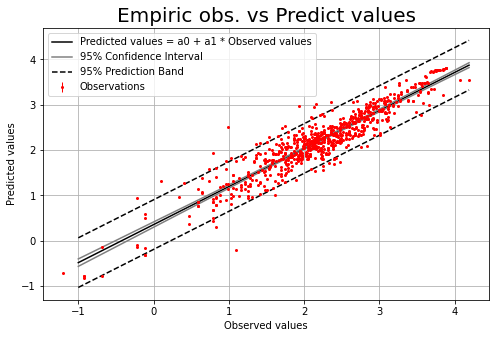

In [23]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [24]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [25]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.277, median - 0.276, CI - [0.265-0.29]

SHAP-values for: DBH_cm: mean - 0.031, median - 0.03, CI - [0.022-0.039]

SHAP-values for: H_m: mean - 0.265, median - 0.267, CI - [0.247-0.282]

SHAP-values for: Origin_ID: mean - 0.013, median - 0.012, CI - [0.009-0.016]

SHAP-values for: Species_ID: mean - 0.32, median - 0.32, CI - [0.312-0.329]



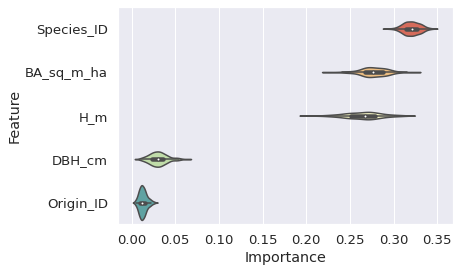

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Species_ID', 'BA_sq_m_ha', 'H_m', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)



In [28]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 86.92, median: 80.0,
 pred. interval (P(0.025)-P(0.975)): 37.0-183.1, 
 conf. interval (p-value=0.95): 56.698-116.136 
***
Aggregate bias statistic: 
 mean: 0.001, median: 0.002,
 pred. interval (P(0.025)-P(0.975)): -0.05-0.052, 
 conf. interval (p-value=0.95): -0.024-0.023 
***
Aggregate RMSE statistic: 
 mean: 0.307, median: 0.305, pred. interval (P(0.025)-P(0.975)): 0.264-0.361, 
 conf. interval (p-value=0.95): 0.285-0.328 
***
Aggregate MSE statistic: 
 mean: 0.095, median: 0.093, pred. interval (P(0.025)-P(0.975)): 0.07-0.131, 
 conf. interval (p-value=0.95): 0.082-0.108 
***
Aggregate R^2 statistic: 
 mean: 0.852, median: 0.855, pred. interval (P(0.025)-P(0.975)): 0.787-0.895, 
 conf. interval (p-value=0.95): 0.826-0.875 
***
Aggregate bias(%) statistic: 
 mean: 0.061, median: 0.002, pred. interval (P(0.025)-P(0.975)): -2.197-2.56, 
 conf. interval (p-value=0.95): -1.086-1.053 
***
Aggregate RMSE(%) statistic: 
 mean: 13.9

# ***Creating final XGBoost model using all obs. for its training***

In [29]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [30]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [31]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.67509
[1]	validation_0-rmse:1.49177
[2]	validation_0-rmse:1.33156
[3]	validation_0-rmse:1.18787
[4]	validation_0-rmse:1.06277
[5]	validation_0-rmse:0.95527
[6]	validation_0-rmse:0.86096
[7]	validation_0-rmse:0.77472
[8]	validation_0-rmse:0.69958
[9]	validation_0-rmse:0.63491
[10]	validation_0-rmse:0.58200
[11]	validation_0-rmse:0.53591


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.49489
[13]	validation_0-rmse:0.45972
[14]	validation_0-rmse:0.43051
[15]	validation_0-rmse:0.40471
[16]	validation_0-rmse:0.38243
[17]	validation_0-rmse:0.36457
[18]	validation_0-rmse:0.35087
[19]	validation_0-rmse:0.33768
[20]	validation_0-rmse:0.32635
[21]	validation_0-rmse:0.31655
[22]	validation_0-rmse:0.30920
[23]	validation_0-rmse:0.30371
[24]	validation_0-rmse:0.29835
[25]	validation_0-rmse:0.29369
[26]	validation_0-rmse:0.28936
[27]	validation_0-rmse:0.28662
[28]	validation_0-rmse:0.28386
[29]	validation_0-rmse:0.28132
[30]	validation_0-rmse:0.28003
[31]	validation_0-rmse:0.27834
[32]	validation_0-rmse:0.27650
[33]	validation_0-rmse:0.27373
[34]	validation_0-rmse:0.27158
[35]	validation_0-rmse:0.27091
[36]	validation_0-rmse:0.26927
[37]	validation_0-rmse:0.26704
[38]	validation_0-rmse:0.26645
[39]	validation_0-rmse:0.26529
[40]	validation_0-rmse:0.26396
[41]	validation_0-rmse:0.26176
[42]	validation_0-rmse:0.26050
[43]	validation_0-rmse:0.25921
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [32]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 195


In [33]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

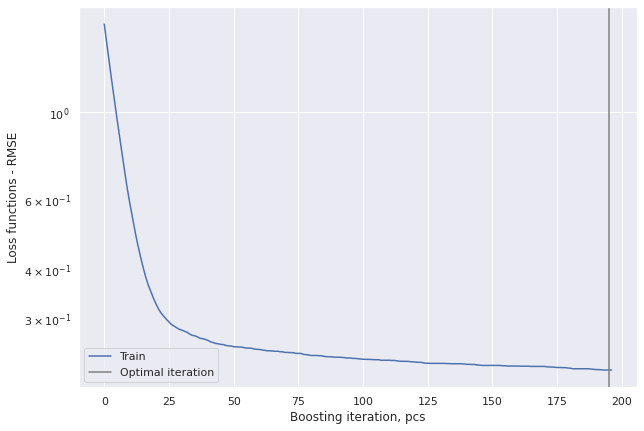

In [34]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [35]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.00
RMSE: 0.2
Relative RMSE(%):  10.078
MSE: 0.0
R square: 92.4%


In [36]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.925
Uncertainty
a0: 0.213+/-0.022
a1: 0.903+/-0.009


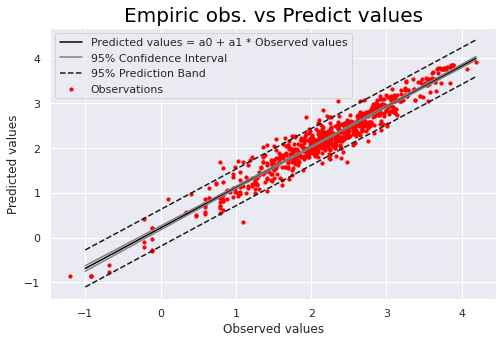

In [38]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

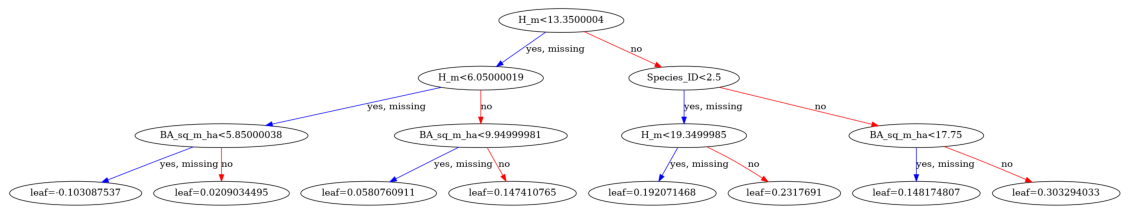

In [42]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

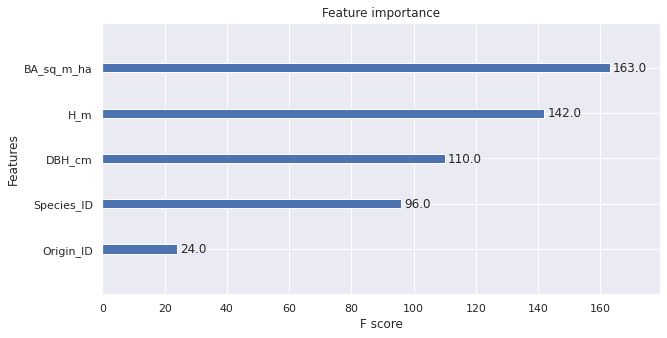

In [44]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

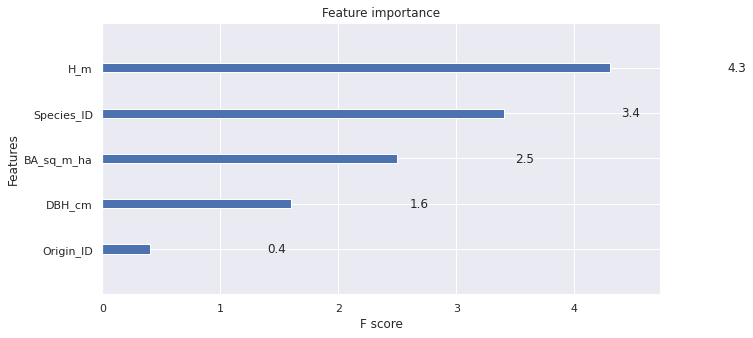

In [45]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

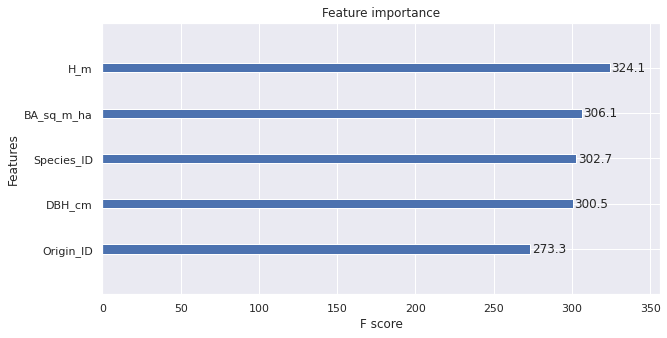

In [46]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [47]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


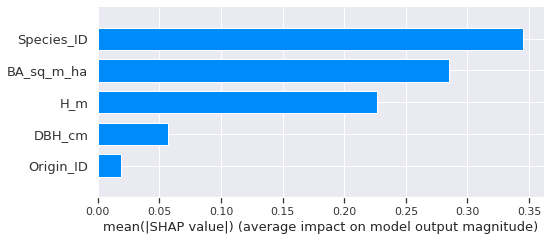

In [48]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

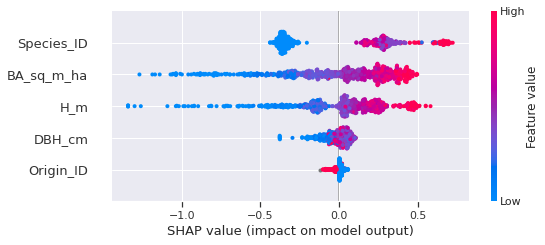

In [49]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

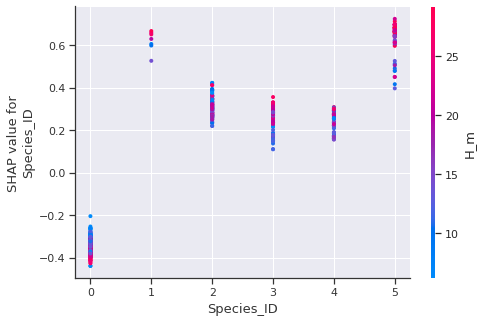

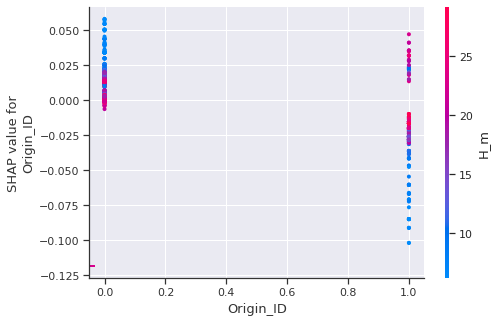

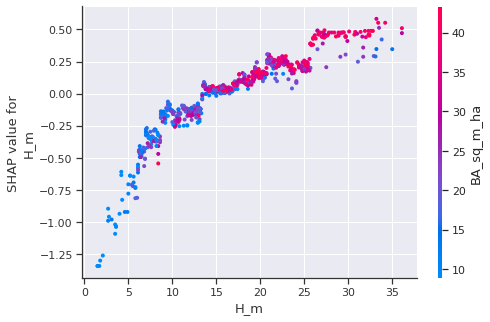

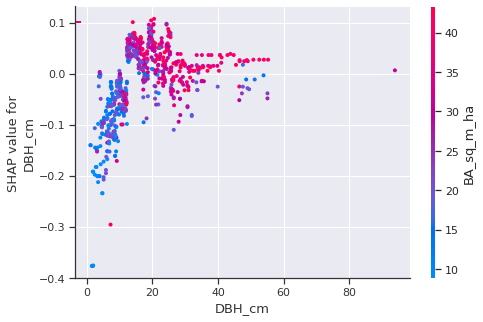

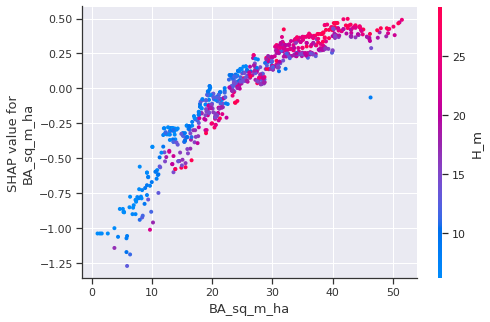

In [50]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [51]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_LN_M_stem_bark_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/03_LN_M_stem_bark_other_authors_XGB_model.txt")